# Problem Statement: LR, RF and LDA

### Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

### Data Dictionary

In [2]:
data_dict = pd.read_excel('E:\GL\Course Content\FRA\ML 2\Data Dictionary-4.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
data_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(difference between the value of total assets and total liabilities),Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company through the issue of shares to the shareholders,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
5,6,Capital Employed,Total amount of capital used for the acquisition of profits by a company,Capital_Employed
6,7,Total Debt,The sum of money borrowed by the company and is due to be paid,Total_Debt
7,8,Gross Block,Total value of all of the assets that a company owns,Gross_Block
8,9,Net Working Capital,"The difference between a company's current assets (cash, accounts receivable, inventories of raw materials and finished goods) and its current liabilities (accounts payable).",Net_Working_Capital
9,10,Current Assets,All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year.,Curr_Assets


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.formula.api as SM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics,model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_excel('E:\GL\Course Content\FRA\ML 2\Company_Data2015.xlsx')
pd.set_option("display.max_columns", None)
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,6043.94,2892.73,2892.73,46.27,2900.71,2572.46,40.51,646.46,-4.32,35.53,-615.25,-615.25,-617.14,-4.32,6.35,143.42,141.17,-15.18,-15.18,1544.39,-0.02,635.91,-785.00,176.93,-26.15,6.30,3.17,5.92,5.92,13.16,6.66,5.24,-108.77,614.89,-9.85,-9.85,-108.77,1.93,34.00,6.61,0.08,0.25,804.44,10.35,0.30,-0.84,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,12316.07,392.13,392.13,9.55,301.16,408.51,54.83,-281.92,-1086.71,-381.10,-1185.89,-897.70,-873.39,-798.52,0.00,86.36,2.27,94.14,94.14,1220.81,-148.31,-873.40,-458.27,1187.51,-61.86,15.66,-2.07,-75.87,-75.87,-69.93,-0.78,-169.69,-431.68,-221.85,-300.41,-350.43,-642.67,-100.00,-81.21,-6.31,1.06,0.03,0.01,0.42,0.00,-2.21,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,6000.42,1354.39,1354.39,223.85,1350.14,1326.99,3.34,-213.01,-677.57,-336.73,-801.29,-801.29,-770.18,-677.57,0.89,28.88,0.00,-39.64,-39.64,194.27,-43.08,324.47,17.31,-412.55,-450.67,-40.84,-1.80,8.33,8.33,16.59,-10.12,-203.84,-102.72,-455.28,-80.23,-70.57,-88.52,-52.91,-33.85,-13.94,0.09,5.08,411.15,9.26,0.00,-0.16,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,7524.91,38.72,38.72,9.82,38.72,186.29,1.97,-647.86,-944.42,-710.13,-1006.69,-864.58,-327.77,-802.31,0.00,15.62,0.00,-212.89,-212.89,113.68,-159.50,-191.54,61.34,143.65,-559.83,-11.76,0.34,-80.61,-80.61,-48.80,-5.81,-40.07,3.28,-38.72,1.87,-2.59,-1.13,-100.00,-91.17,-12.91,0.50,0.05,0.02,1.28,0.01,-0.73,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
df.tail()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,Current Liabilities and Provisions,Total Assets/Liabilities,Gross Sales,Net Sales,Other Income,Value Of Output,Cost of Production,Selling Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted PAT,CP,Revenue earnings in forex,Revenue expenses in forex,Capital expenses in forex,Book Value (Unit Curr),Book Value (Adj.) (Unit Curr),Market Capitalisation,CEPS (annualised) (Unit Curr),Cash Flow From Operating Activities,Cash Flow From Investing Activities,Cash Flow From Financing Activities,ROG-Net Worth (%),ROG-Capital Employed (%),ROG-Gross Block (%),ROG-Gross Sales (%),ROG-Net Sales (%),ROG-Cost of Production (%),ROG-Total Assets (%),ROG-PBIDT (%),ROG-PBDT (%),ROG-PBIT (%),ROG-PBT (%),ROG-PAT (%),ROG-CP (%),ROG-Revenue earnings in forex (%),ROG-Revenue expenses in forex (%),ROG-Market Capitalisation (%),Current Ratio[Latest],Fixed Assets Ratio[Latest],Inventory Ratio[Latest],Debtors Ratio[Latest],Total Asset Turnover Ratio[Latest],Interest Cover Ratio[Latest],PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
3581,4987,HDFC Bank,72677.77,501.30,62009.42,590576.00,496009.19,8463.30,0.00,444633.50,32557.39,94566.81,48469.90,48469.90,8996.35,48469.90,6705.18,187.47,42059.26,15985.02,41402.96,15328.72,10215.92,10208.55,10872.22,0.00,0.00,0.00,247.39,247.39,256376.88,41.75,-15862.27,-1933.36,14543.44,42.62,20.12,9.83,17.83,17.83,12.11,11.41,16.52,18.90,16.88,20.02,20.49,18.82,0.00,0.00,42.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,NaN,0.60,7.76
3582,502,Vedanta,79162.19,296.50,34057.87,71906.06,37643.79,29848.44,2503.86,11554.45,9050.59,80956.65,34312.88,32502.41,2008.86,32238.61,27433.63,249.20,6635.07,2979.14,5623.40,1967.47,1927.20,1887.20,2938.87,14429.18,19525.06,11.30,114.87,114.87,56166.13,9.90,4240.44,1877.78,-6193.95,1.13,-1.52,1.92,14.05,13.90,3.07,-6.36,65.96,587.80,125.54,283.59,79.09,13.87,13.66,-0.17,0.80,0.40,0.88,7.16,22.31,0.30,3.18,39.92,32.17,29.81,30.52,22.77,13,53,77.0,0.29,1.00
3583,12002,I O C L,88134.31,2427.95,67969.97,140686.75,55245.01,121643.45,6376.84,89609.82,83232.98,223919.73,474182.94,443775.16,5815.66,435559.09,419913.50,686.53,15982.42,12523.95,11453.76,7995.29,5273.03,4169.62,9801.69,16009.99,193979.73,294.88,279.95,69.99,89421.40,39.03,44529.40,-8648.27,-38374.04,3.00,-15.25,8.02,-5.76,-7.41,-8.28,-12.52,-23.19,-20.16,-23.88,-19.45,-24.88,-23.30,-25.91,-15.55,32.01,0.76,4.15,8.78,55.49,2.62,8.60,8.09,6.69,7.31,5.69,4.29,7,30,48.0,1.42,3.24
3584,12001,NTPC,91293.70,8245.46,81657.35,173099.14,85995.34,128477.59,11449.79,42353.59,30903.80,204002.94,73906.58,73236.94,2399.39,73236.94,61621.38,71.22,18300.03,15458.30,13388.38,10546.65,10290.86,10140.74,15202.51,3.41,962.27,2788.44,99.03,99.03,121496.92,17.93,14234.70,-14562.58,-1878.08,-4.85,9.57,9.82,1.74,1.69,6.43,10.10,-10.79,-14.34,-18.22,-24.15,-6.23,0.57,8.95,-0.92,22.84,0.85,0.75,11.42,9.86,0.39,4.35,28.12,20.55,23.39,19.55,11.99,32,69,42.0,0.36,0.68
3585,15542,Bharti Airtel,111729.10,1998.70,78270.80,104241.00,21569.70,100084.90,-12145.30,11947.10,24092.40,128333.40,55496.40,55496.40,5193.00,55560.20,31470.00,1555.50,24624.10,23215.00,17064.40,15655.30,13200.50,10491.07,20760.20,3727.40,3017.20,3722.10,195.80,195.80,157457.59,51.79,17939.80,-12801.20,-5195.70,17.30,28.31,25.78,11.17,11.17,7.56,28.55,45.32,48.73,75.67,86.88,100.00,50.09,4.40,3.10,23.52,0.60,0.39,13538.33,19.51,0.38,2.71,42.47,22.88,34.04,25.97,6.37,18,74,0.0,0.42,0.49


In [5]:
df.columns = data_dict['New Field Name'].to_list()
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Curr_Assets', 'Curr_Liab_and_Prov',
       'Total_Assets_to_Liab', 'Gross_Sales', 'Net_Sales', 'Other_Income',
       'Value_Of_Output', 'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT',
       'PBIT', 'PBT', 'PAT', 'Adjusted_PAT', 'CP', 'Rev_earn_in_forex',
       'Rev_exp_in_forex', 'Capital_exp_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv',
       'Cash_Flow_From_Fin', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
  

In [6]:
df.head(1)

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.6,419.36,-7027.48,-1007.24,5936.03,474.3,-1076.34,40.5,1116.85,109.6,0.0,0.0,7.6,-0.07,137.67,0.0,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.0,0.0,0.0,-167.58,-167.58,0.0,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.0,0.0,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0,0,45.0,0.0,0.0


In [7]:
df.shape

(3586, 67)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [9]:
pd.options.display.float_format = '{:.2f}'.format 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,3586.00,16065.39,19776.82,4.00,3029.25,6077.50,24269.50,72493.00
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.61,714001.25
Total_Debt,3586.00,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81
Gross_Block,3586.00,594.18,4871.55,-41.19,0.57,15.87,131.90,128477.59
Net_Working_Capital,3586.00,410.81,6301.22,-13162.42,0.94,10.14,61.17,223257.56
Curr_Assets,3586.00,1960.35,22577.57,-0.91,4.00,24.54,135.28,721166.00
Curr_Liab_and_Prov,3586.00,391.99,2675.00,-0.23,0.73,9.23,65.65,83232.98


### Check Missing Values in dataset

In [10]:
df.isnull().sum().sort_values(ascending=False)

Inventory_Vel_Days                   103
Book_Value_Adj_Unit_Curr               4
Inventory_Ratio_Latest                 1
Interest_Cover_Ratio_Latest            1
Curr_Ratio_Latest                      1
Fixed_Assets_Ratio_Latest              1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
PBIDTM_perc_Latest                     1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
PBIT                                   0
Cost_of_Prod                           0
Value_Of_Output                        0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
Value_of_Output_to_Gross_Block         0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
Net_Sales                              0
CP              

There are 13 variables having missing values with 'Inventory_Velocity_Days' having the highest count of 103 missing values followed by 'Book_Value_Adj._Unit_Curr' with 4 missing values. Each of the variables 'Debtors_Ratio_Latest', 'PBIDTM_perc_Latest', 'Current_Ratio_Latest', 'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest', 'Interest_Cover_Ratio_Latest', 'PBITM_perc_Latest', 'PBDTM_perc_Latest', 'CPM_perc_Latest' and 'APATM_perc_Latest' having 1 missing value respectively. We do not choose to drop any of these variables as the count of missing values is very minimal and we can instead impute these values further during our analysis.

In [11]:
df.isnull().sum().sum()

118

In [12]:
df.size

240262

In [13]:
(118/240262)*100

0.04911305158535265

### Checking Duplicates

In [14]:
df.duplicated().sum()

0

We have only approx 0.49 percent of missing values. Also, there are no duplicate records in the dataset. Hence, the data can be said to be relatively good and we shall impute the missing data appropriately as part of our preprocessing further during our analysis. 

## Univariate Analysis

In [15]:
cont = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(cont.columns.values)
len(lstnumericcolumns)

66

Co_Code
Skew: 1.6


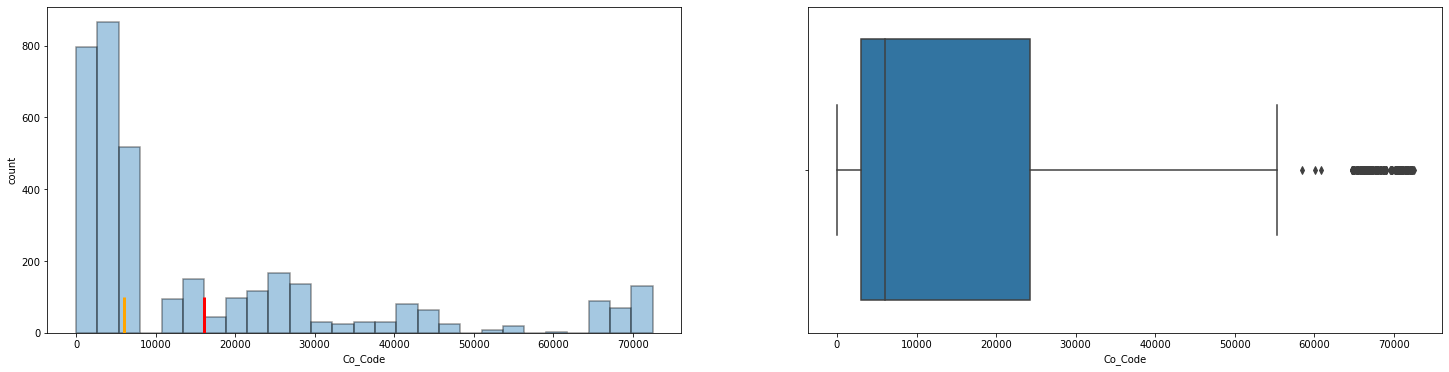

Networth_Next_Year
Skew: 13.04


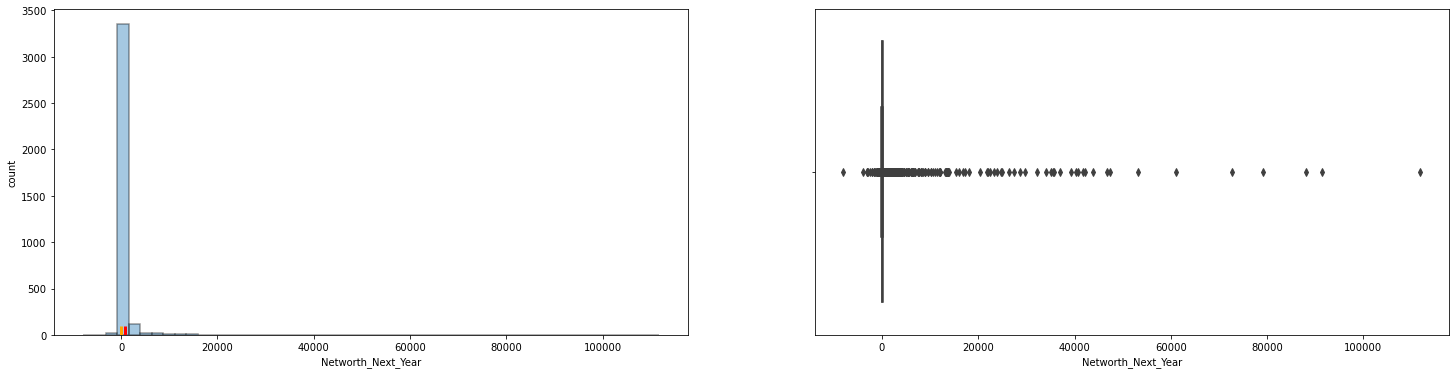

Equity_Paid_Up
Skew: 45.93


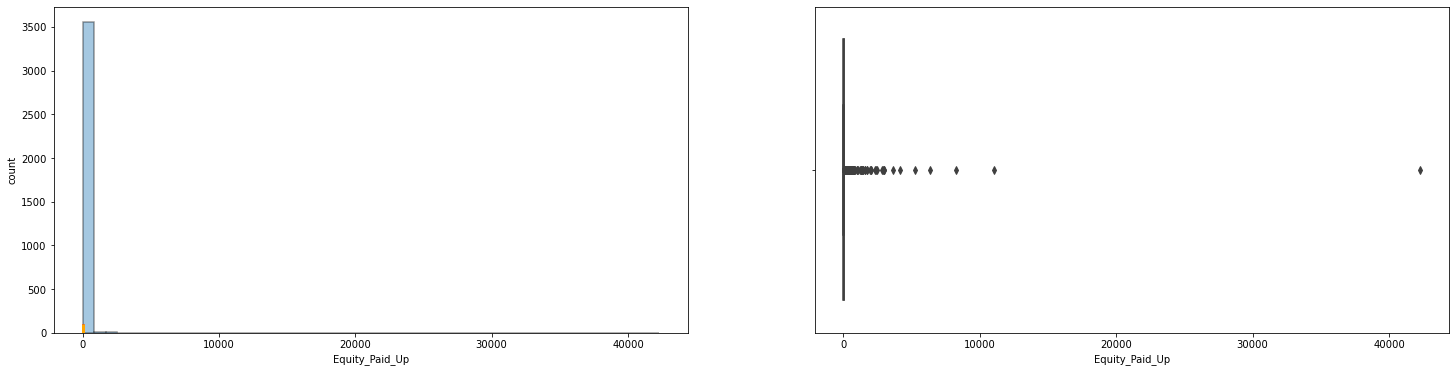

Networth
Skew: 11.74


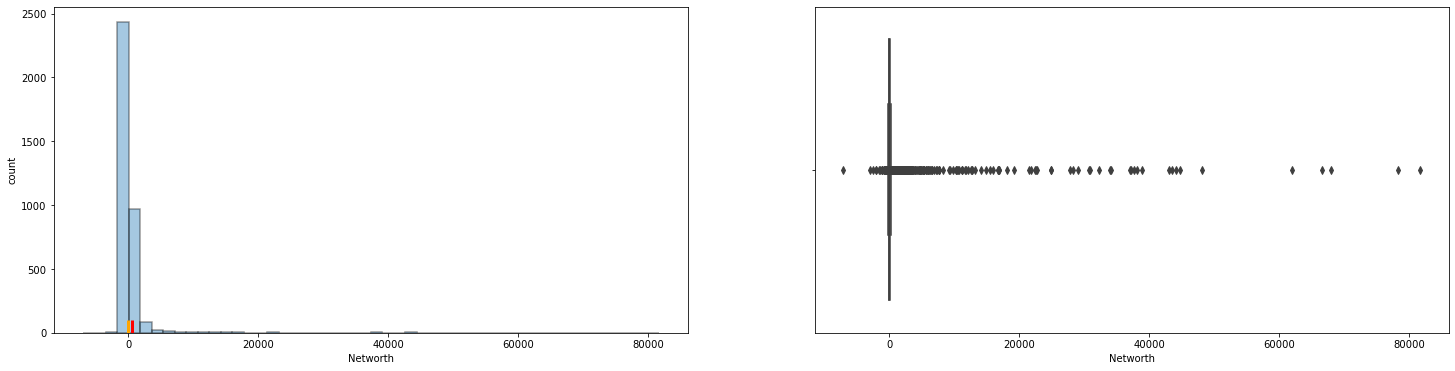

Capital_Employed
Skew: 18.07


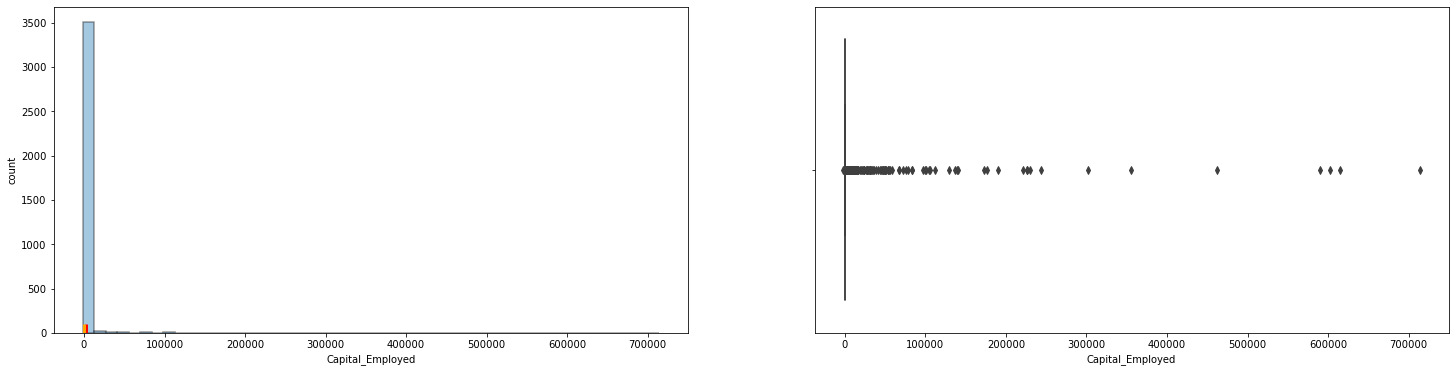

Total_Debt
Skew: 19.42


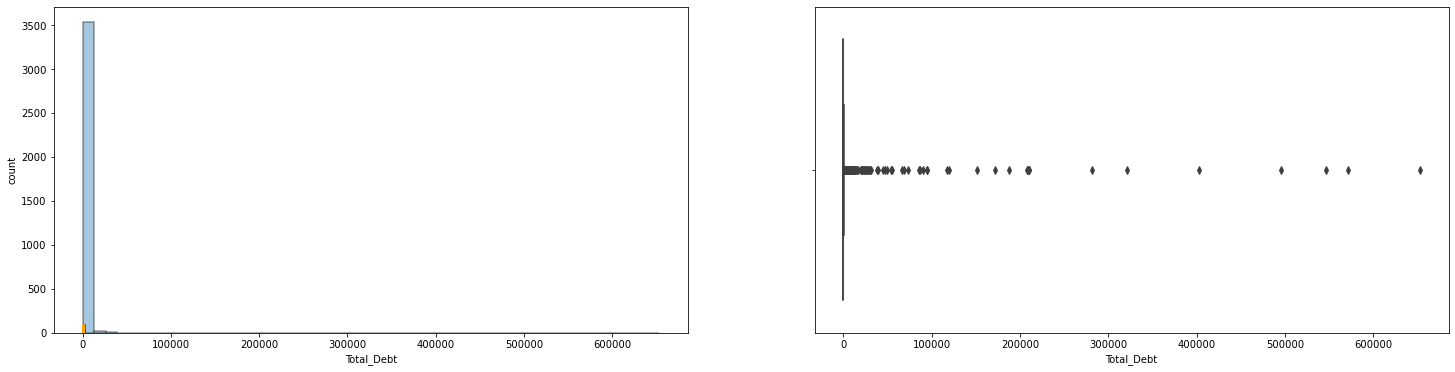

Gross_Block
Skew: 18.53


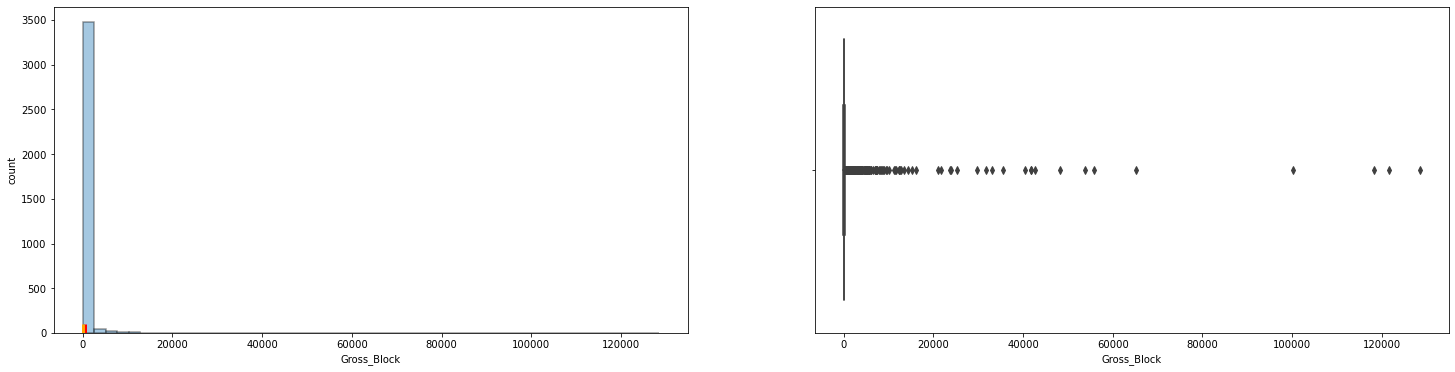

Net_Working_Capital
Skew: 30.58


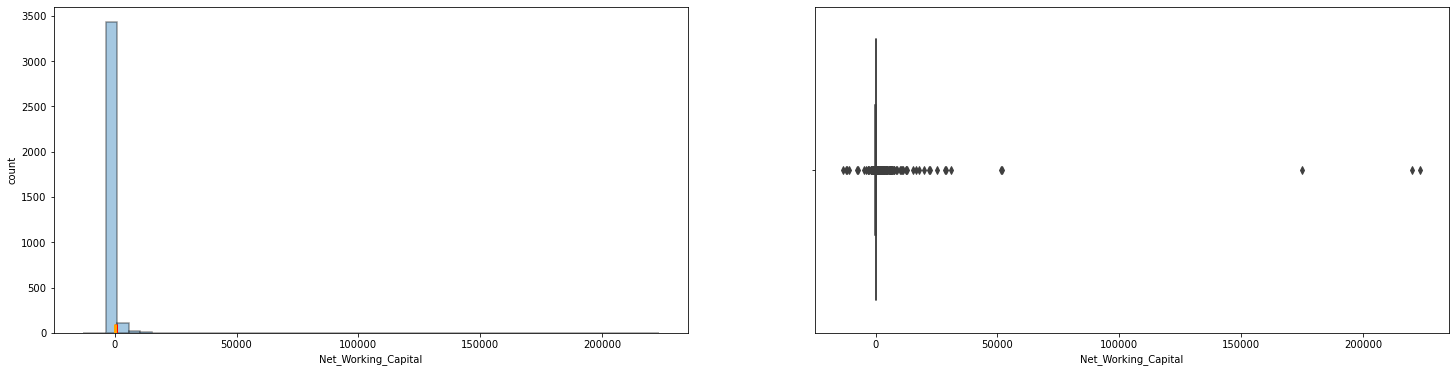

Curr_Assets
Skew: 20.78


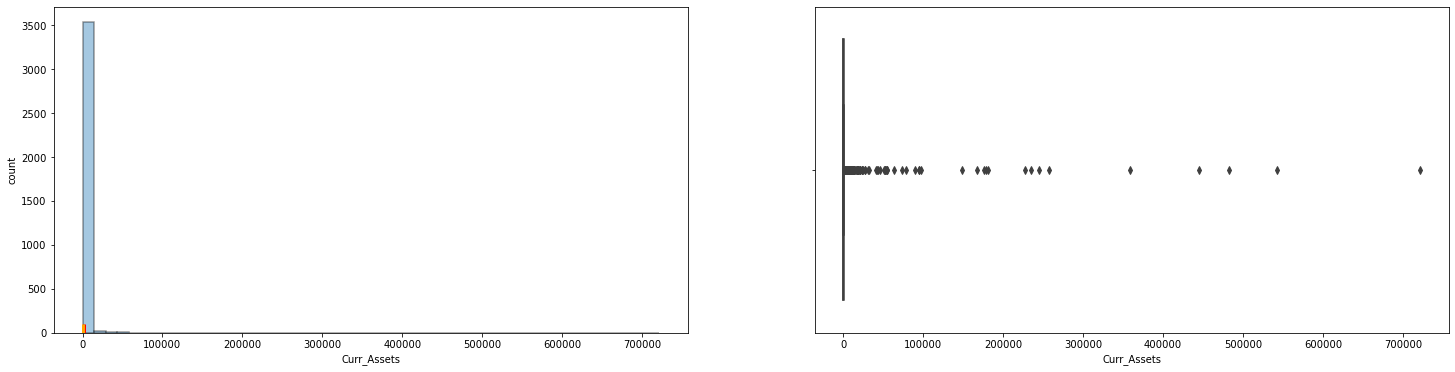

Curr_Liab_and_Prov
Skew: 15.29


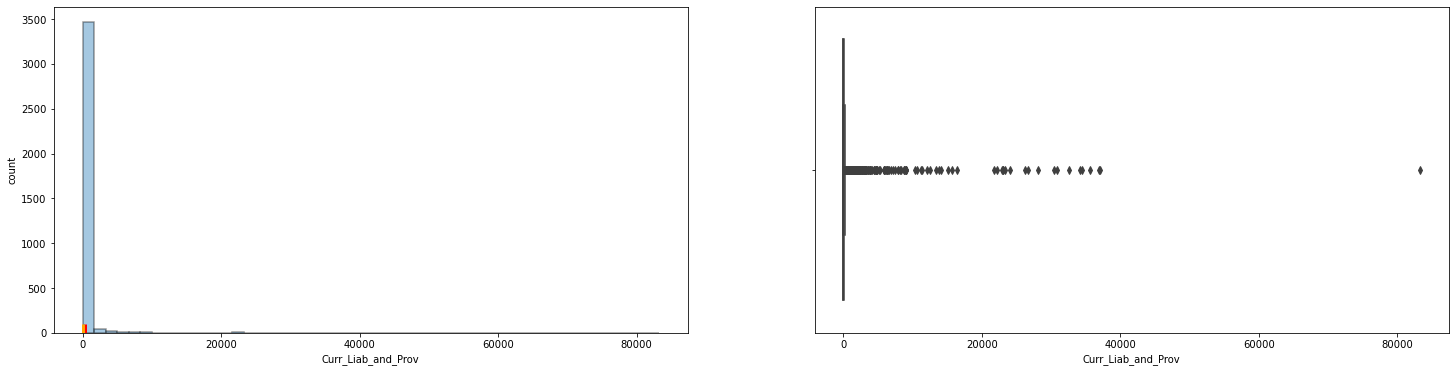

Total_Assets_to_Liab
Skew: 13.37


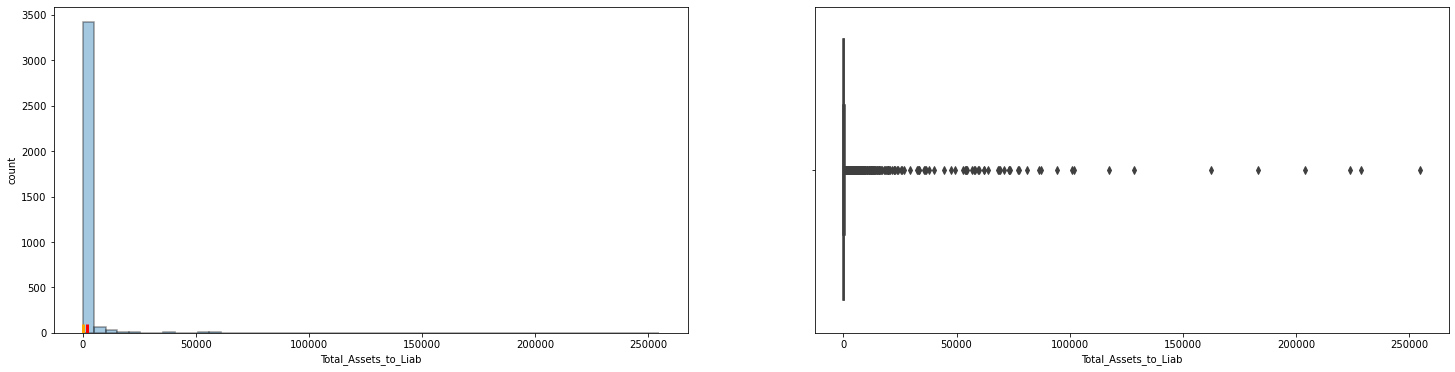

Gross_Sales
Skew: 31.56


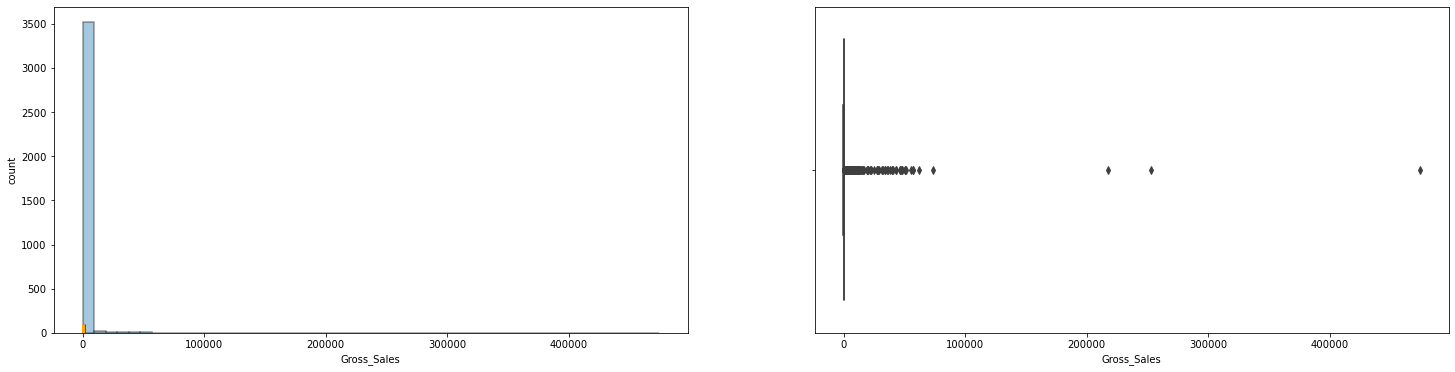

Net_Sales
Skew: 31.09


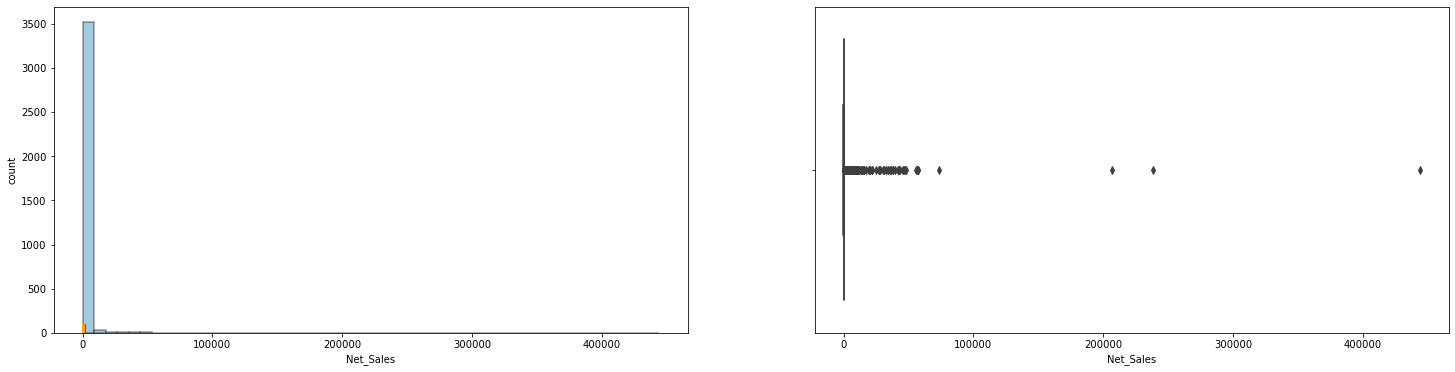

Other_Income
Skew: 18.81


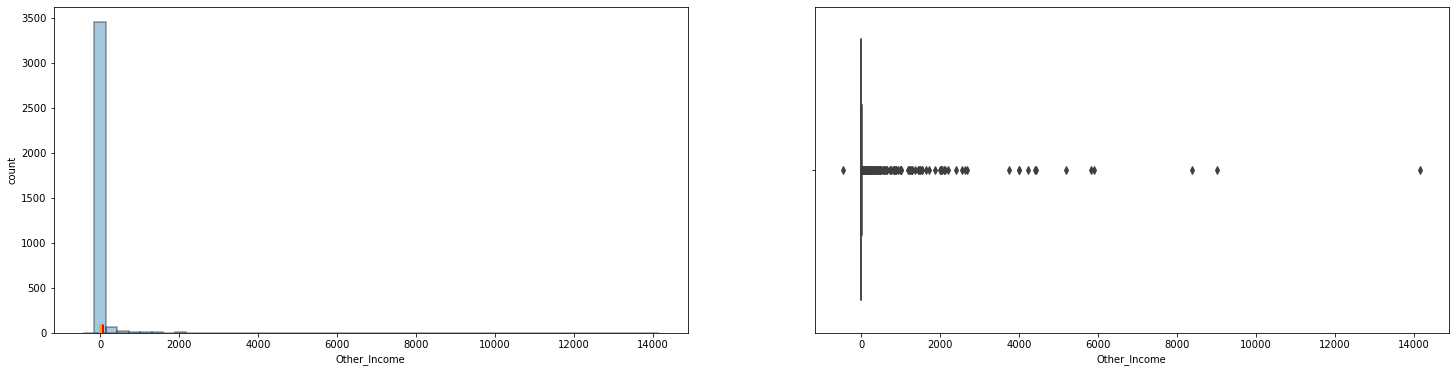

Value_Of_Output
Skew: 30.81


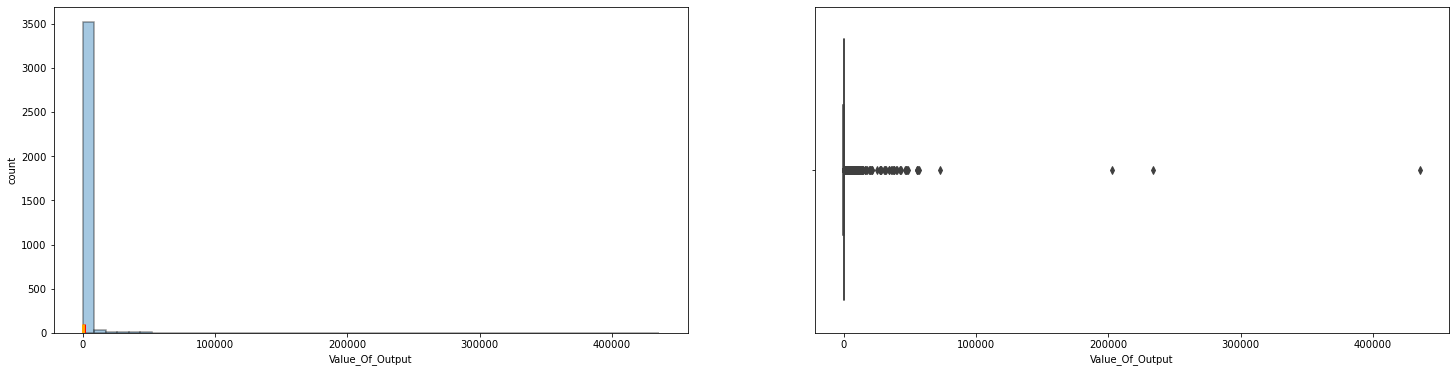

Cost_of_Prod
Skew: 34.59


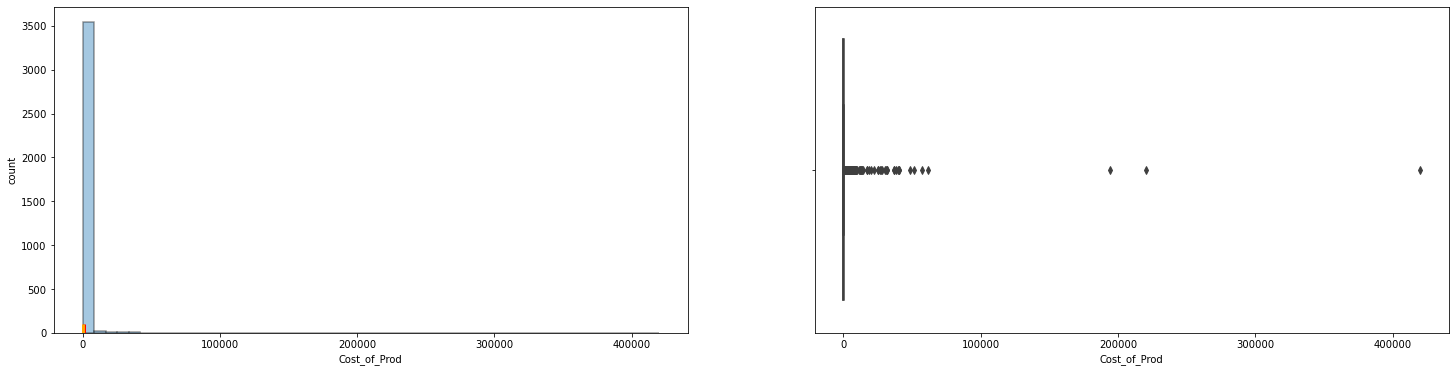

Selling_Cost
Skew: 18.88


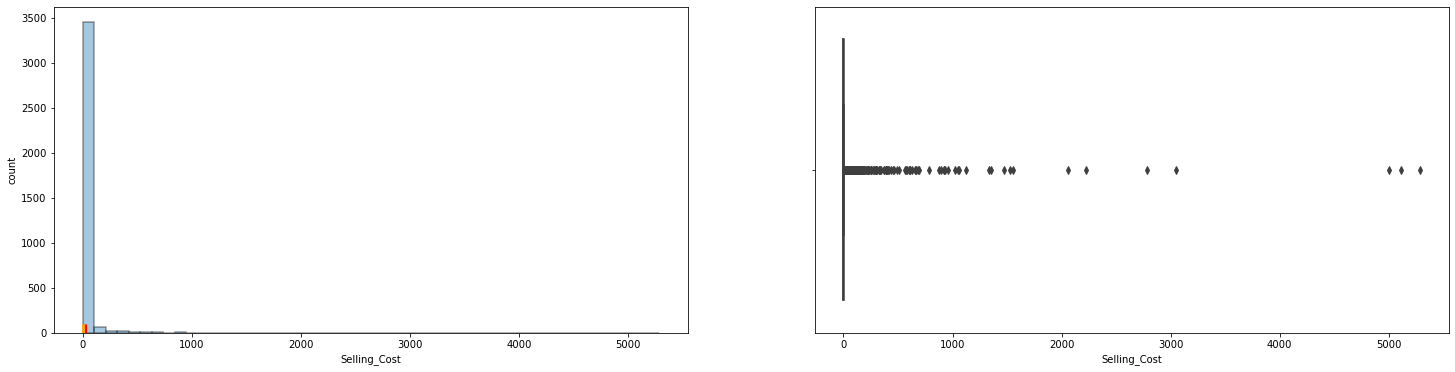

PBIDT
Skew: 13.18


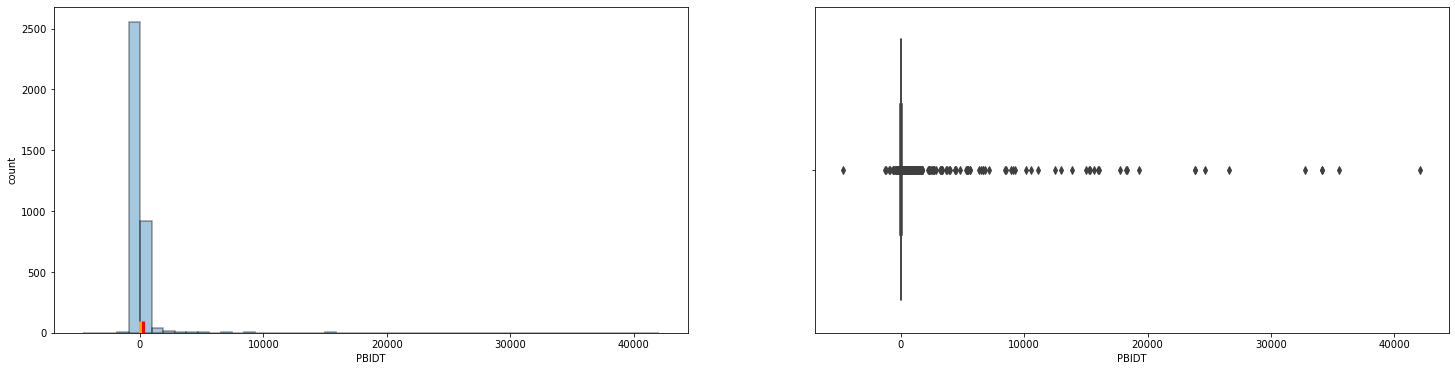

PBDT
Skew: 13.56


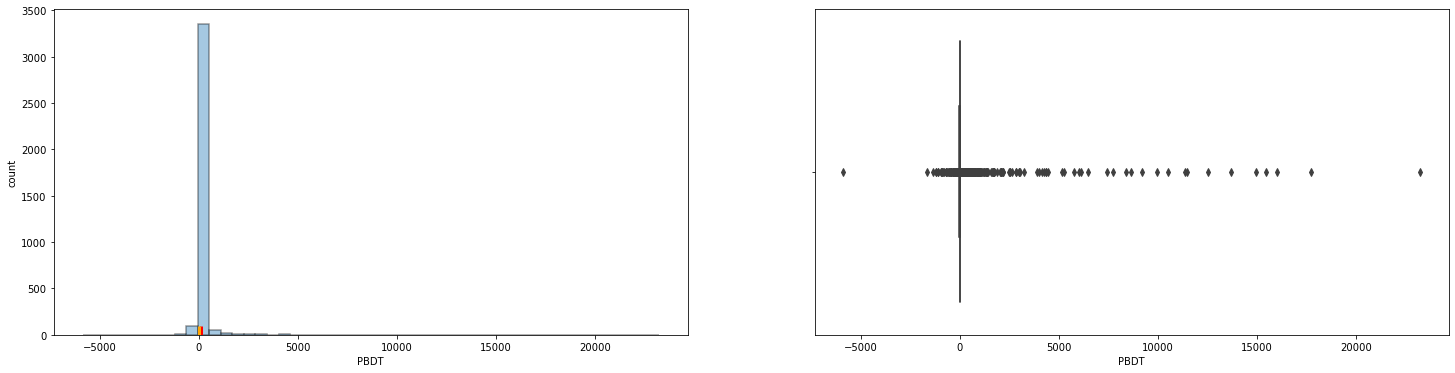

PBIT
Skew: 14.01


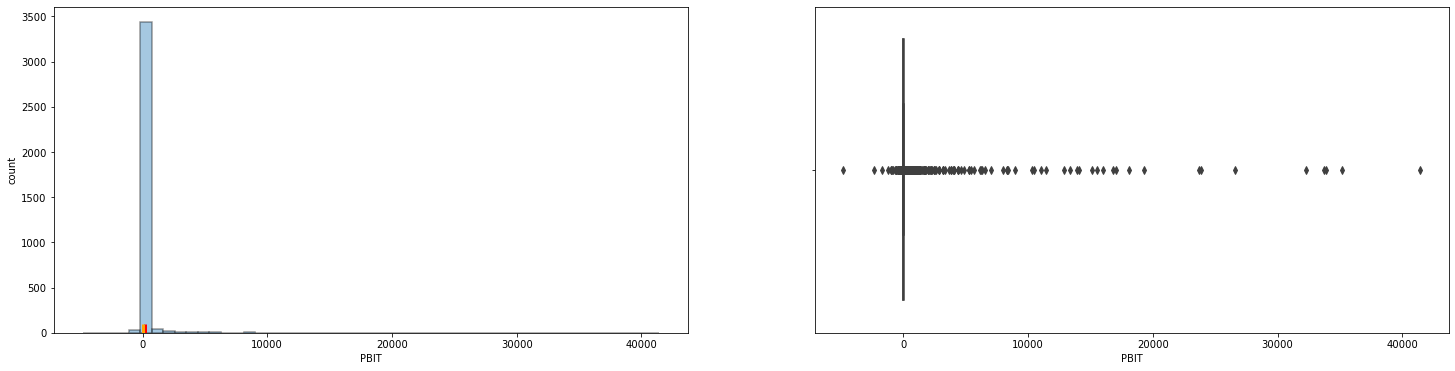

PBT
Skew: 13.13


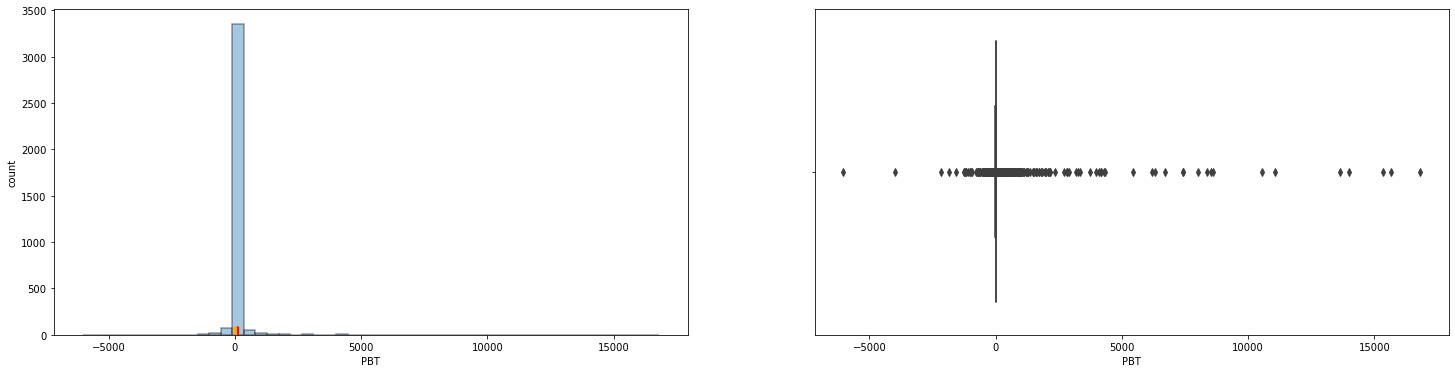

PAT
Skew: 13.07


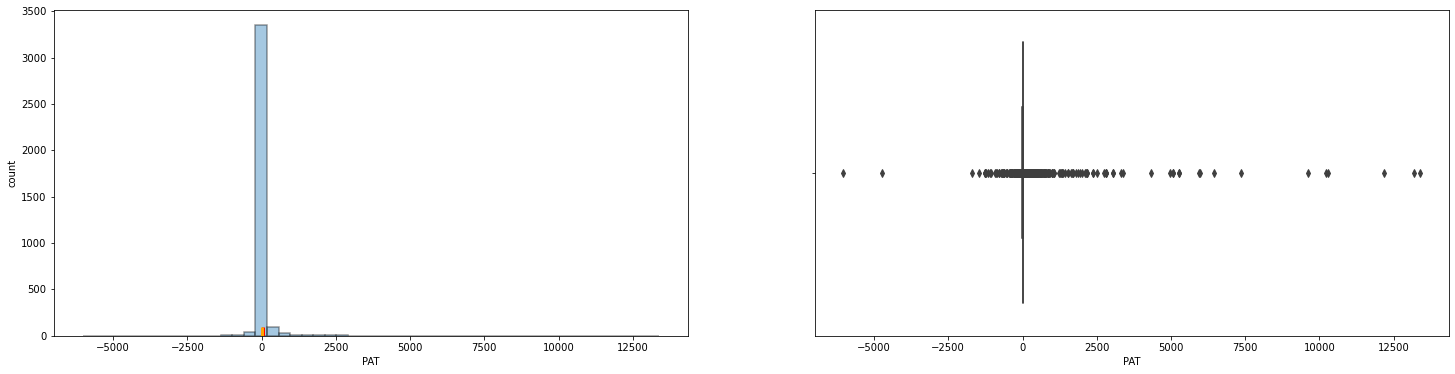

Adjusted_PAT
Skew: 13.88


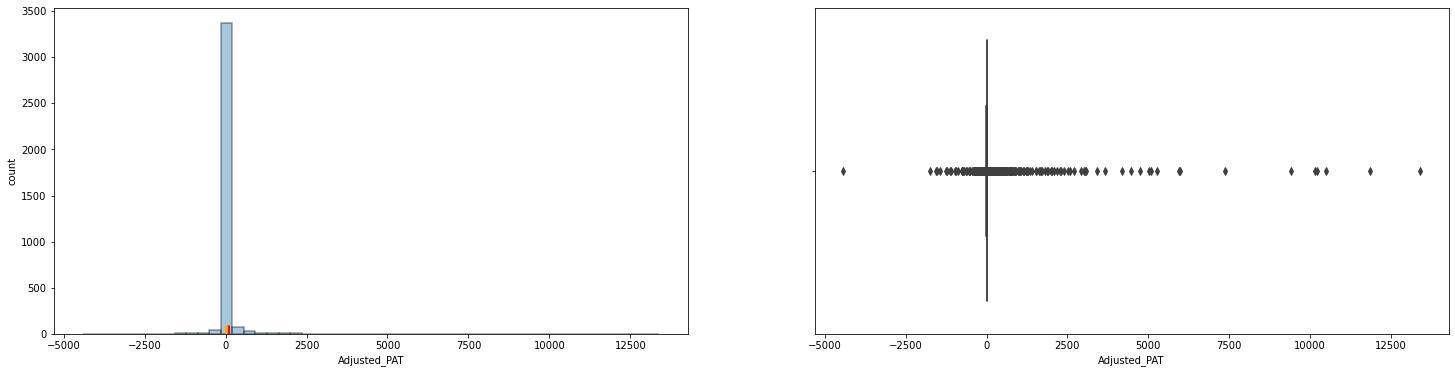

CP
Skew: 14.35


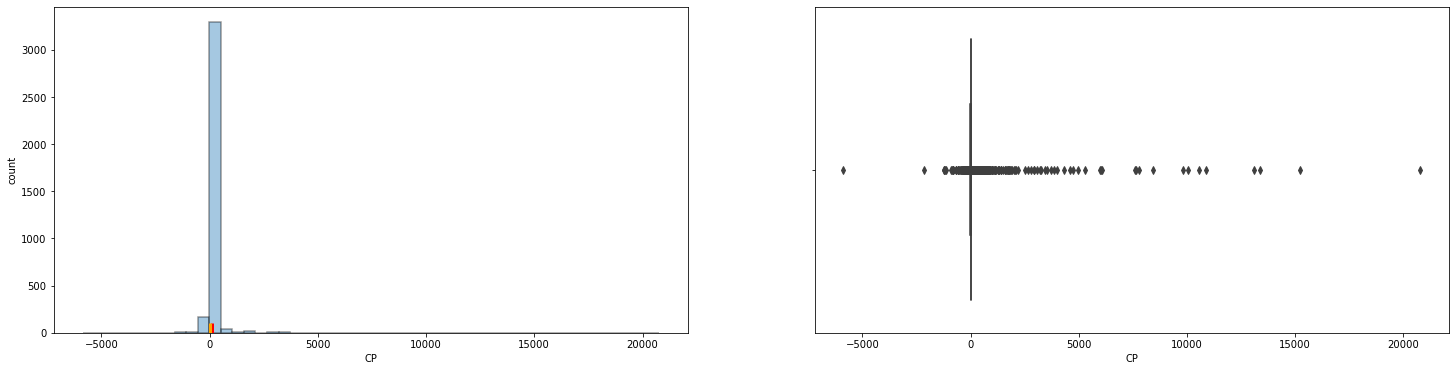

Rev_earn_in_forex
Skew: 24.18


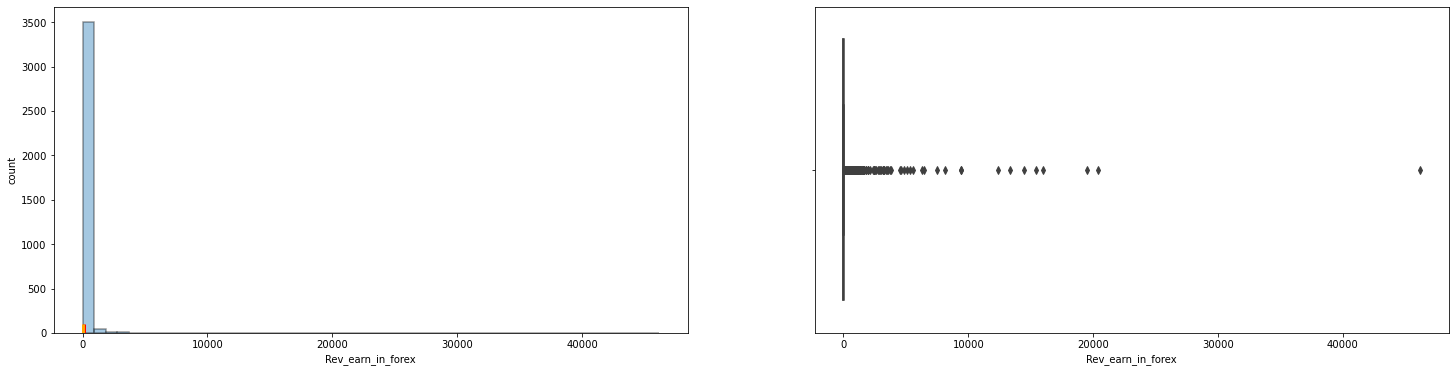

Rev_exp_in_forex
Skew: 34.84


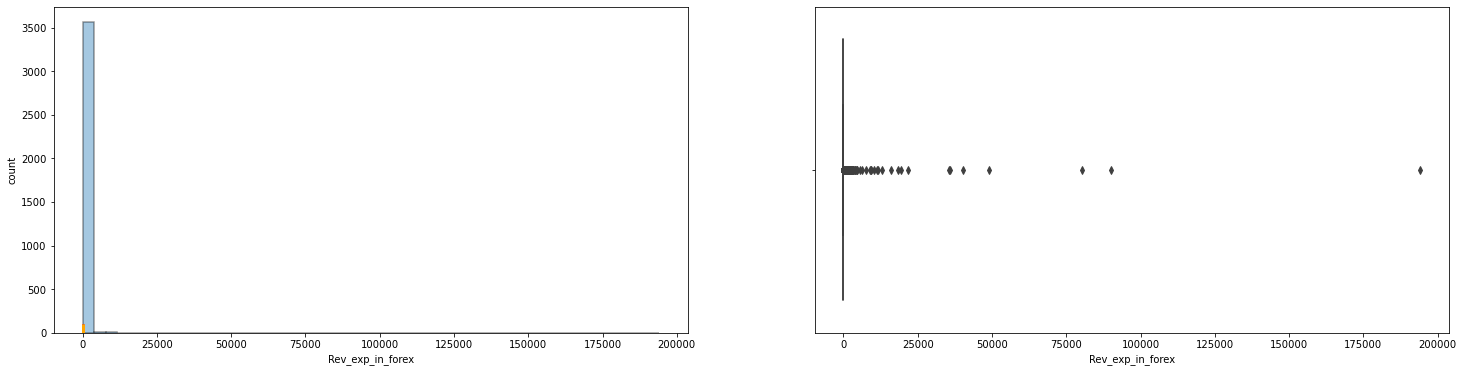

Capital_exp_in_forex
Skew: 27.61


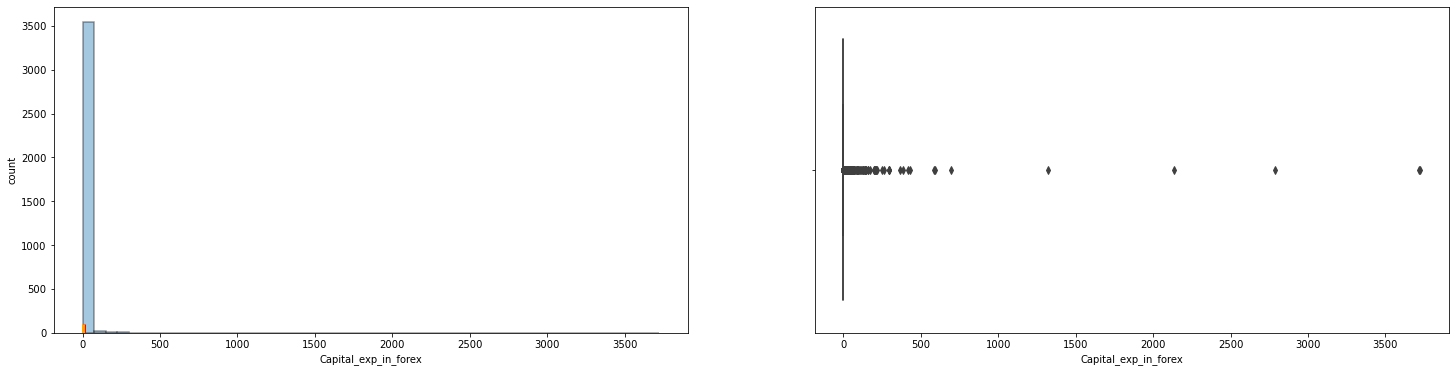

Book_Value_Unit_Curr
Skew: 32.98


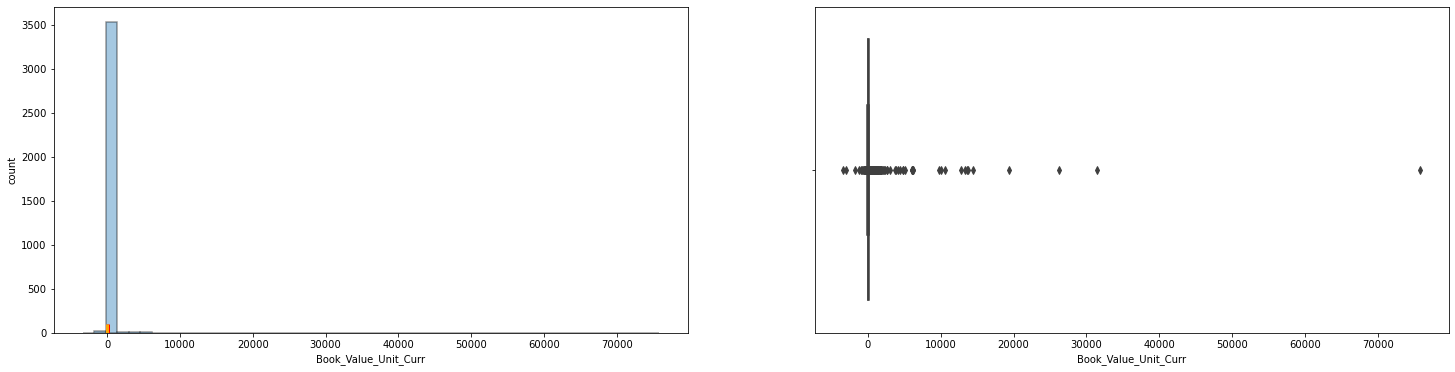

Book_Value_Adj_Unit_Curr
Skew: 59.84


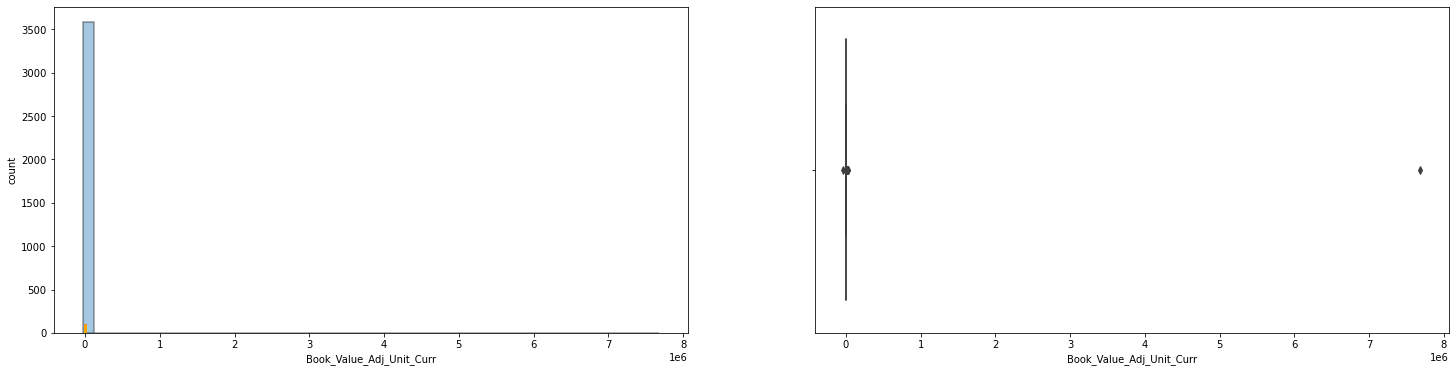

Market_Capitalisation
Skew: 14.39


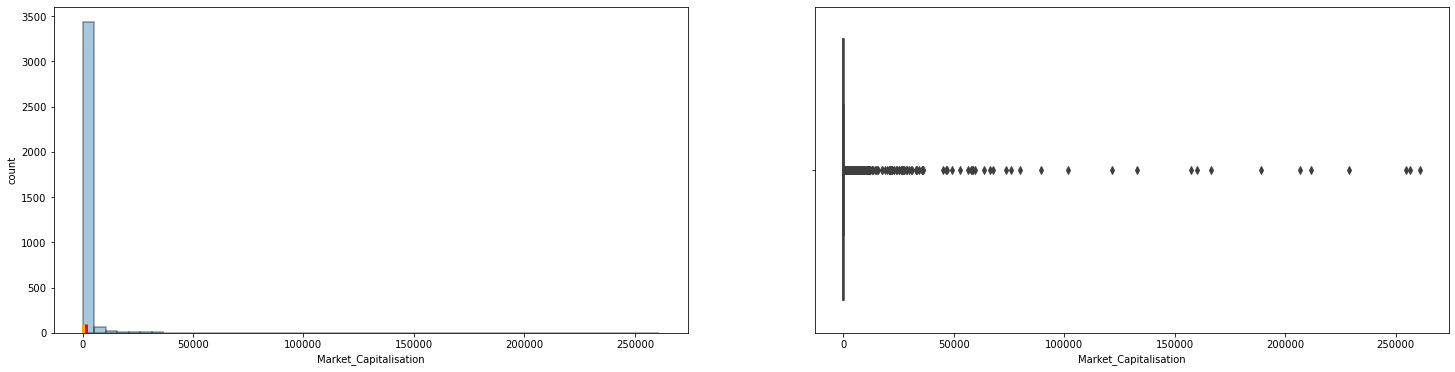

CEPS_annualised_Unit_Curr
Skew: 48.53


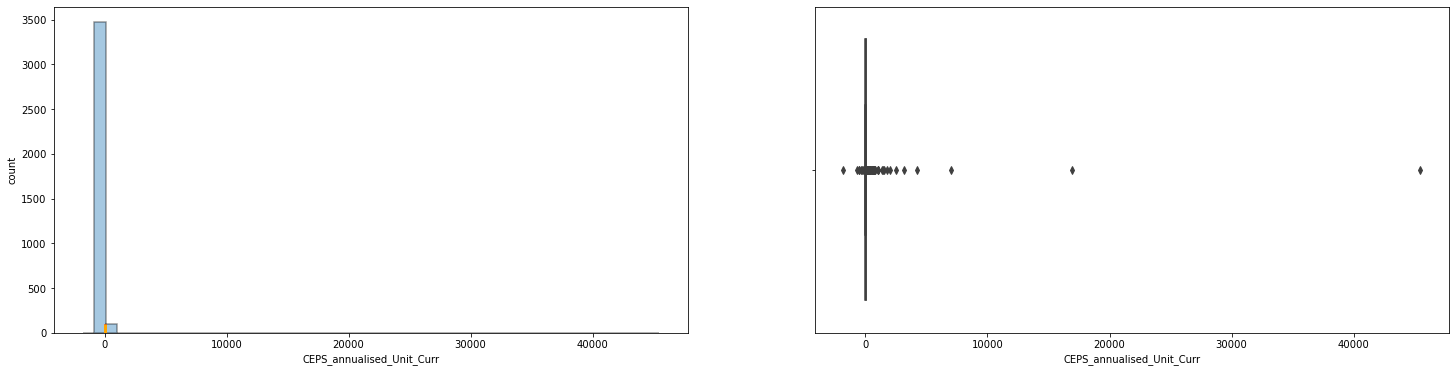

Cash_Flow_From_Opr
Skew: 6.63


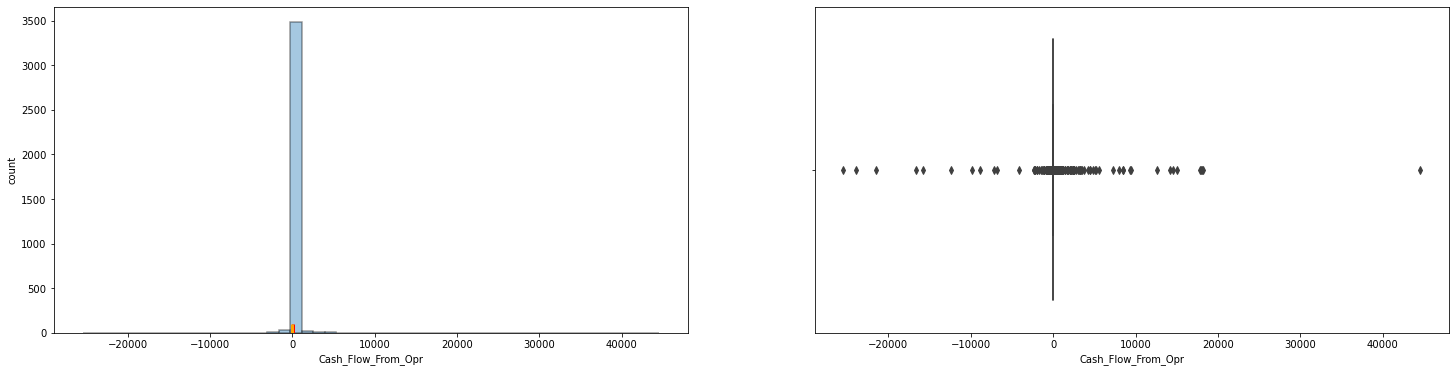

Cash_Flow_From_Inv
Skew: -21.57


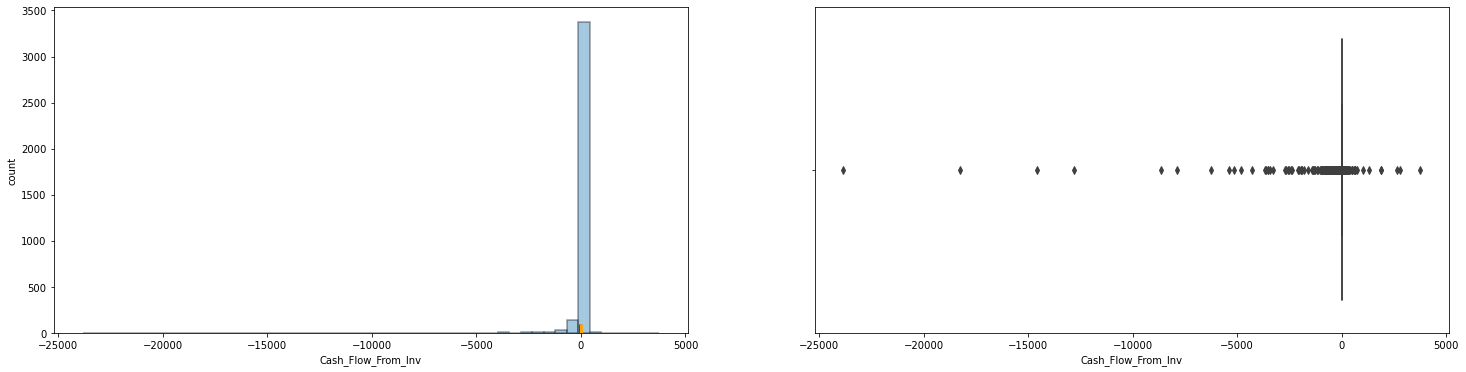

Cash_Flow_From_Fin
Skew: 1.7


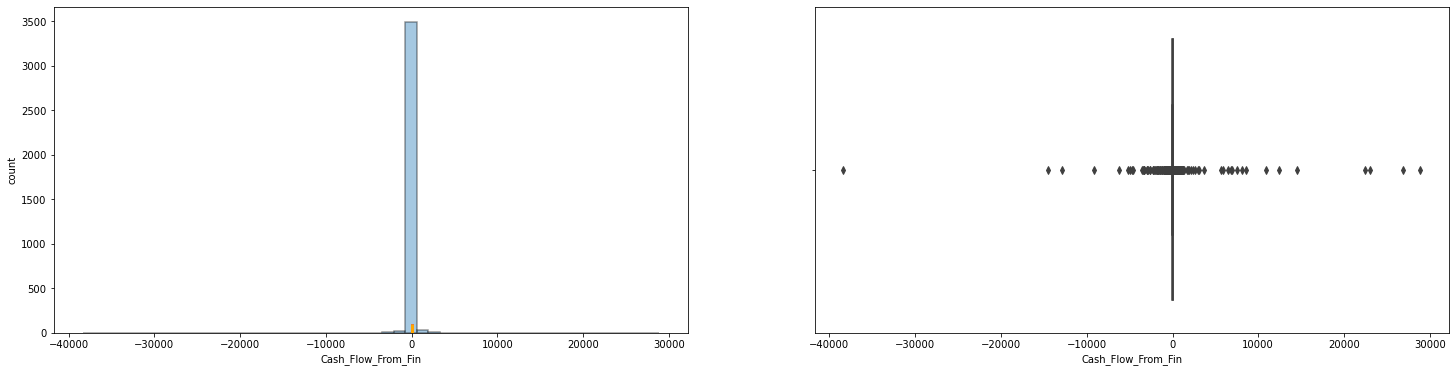

ROG_Net_Worth_perc
Skew: 44.83


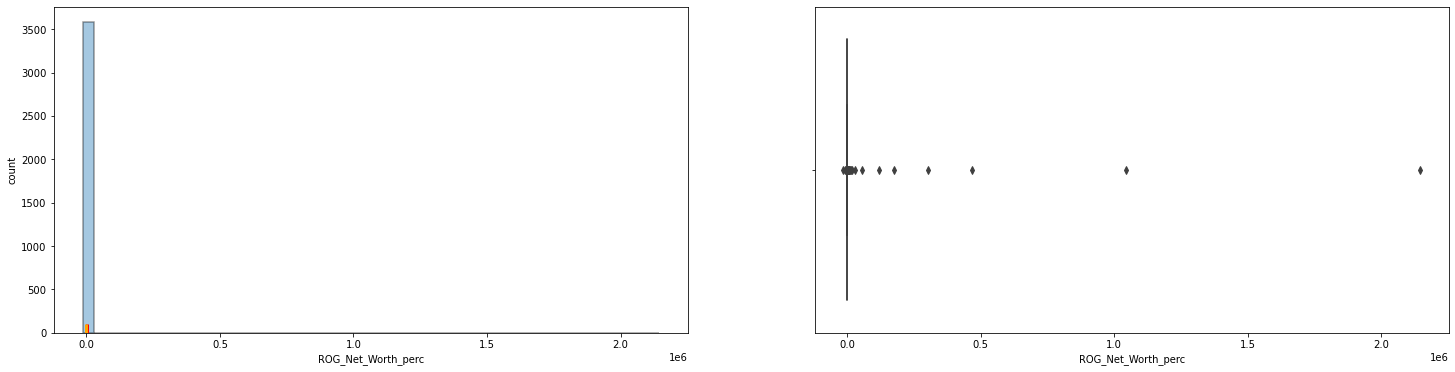

ROG_Capital_Employed_perc
Skew: 56.44


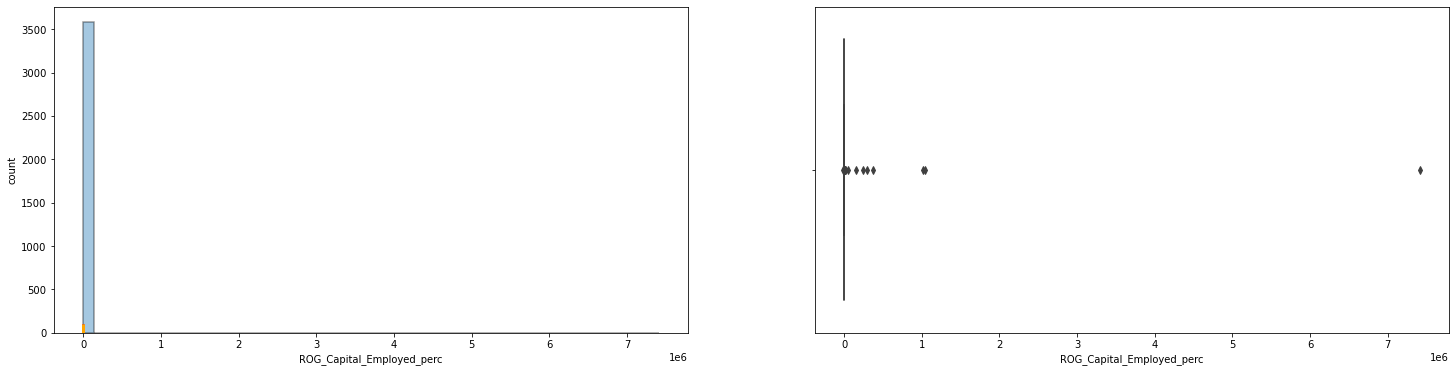

ROG_Gross_Block_perc
Skew: 44.87


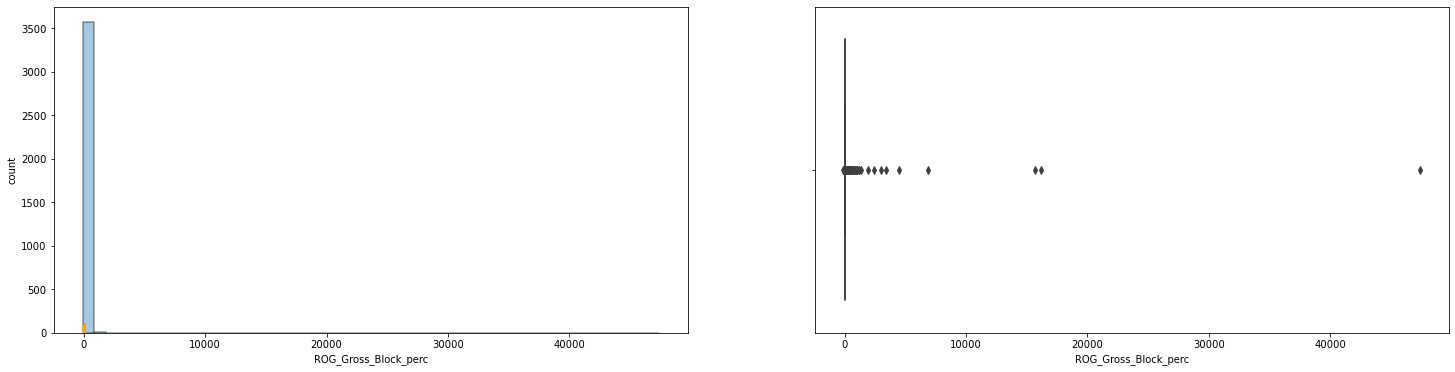

ROG_Gross_Sales_perc
Skew: 45.4


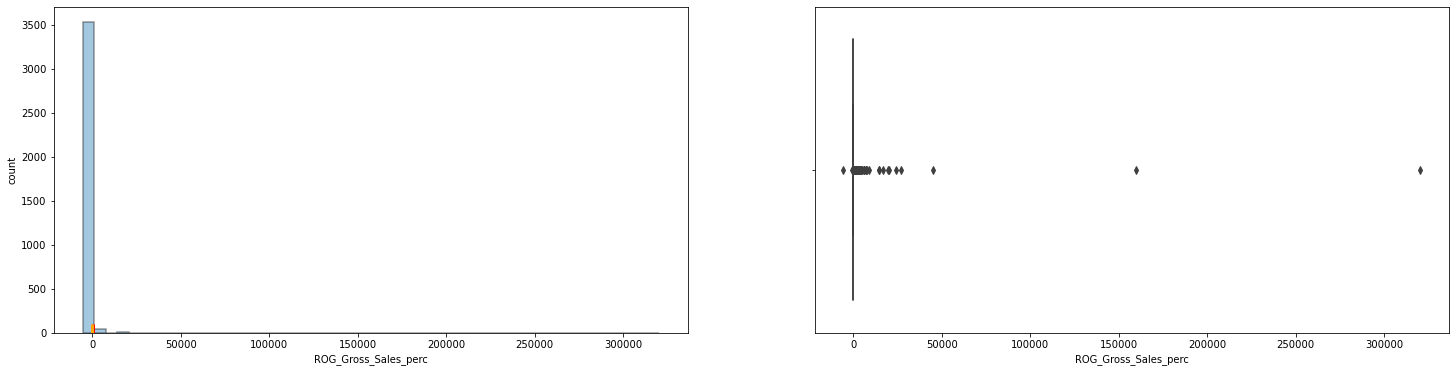

ROG_Net_Sales_perc
Skew: 45.41


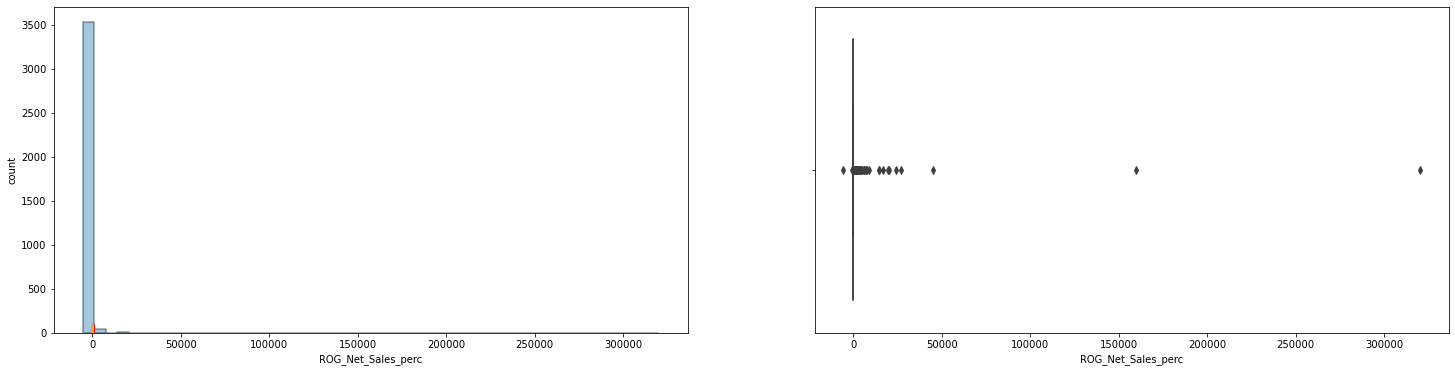

ROG_Cost_of_Prod_perc
Skew: 37.27


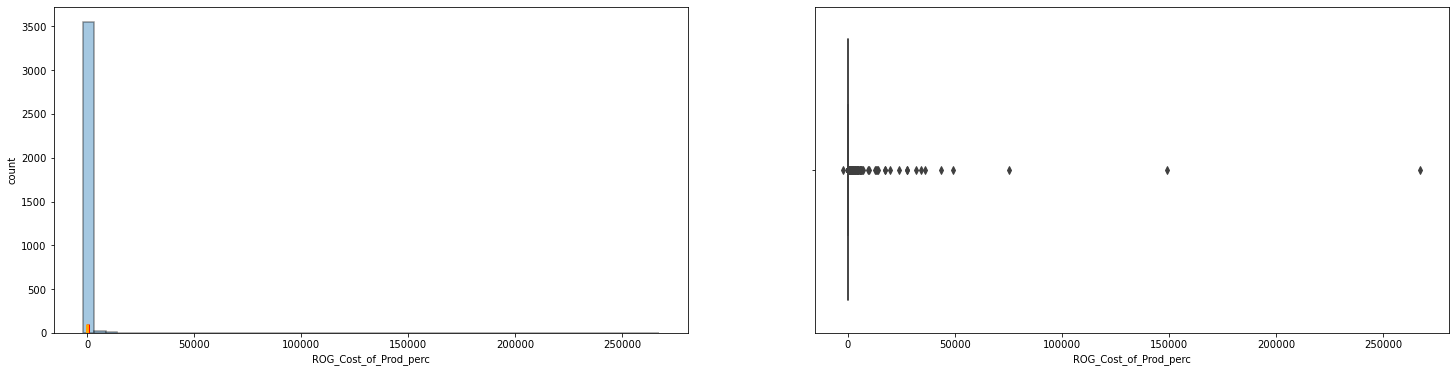

ROG_Total_Assets_perc
Skew: 57.3


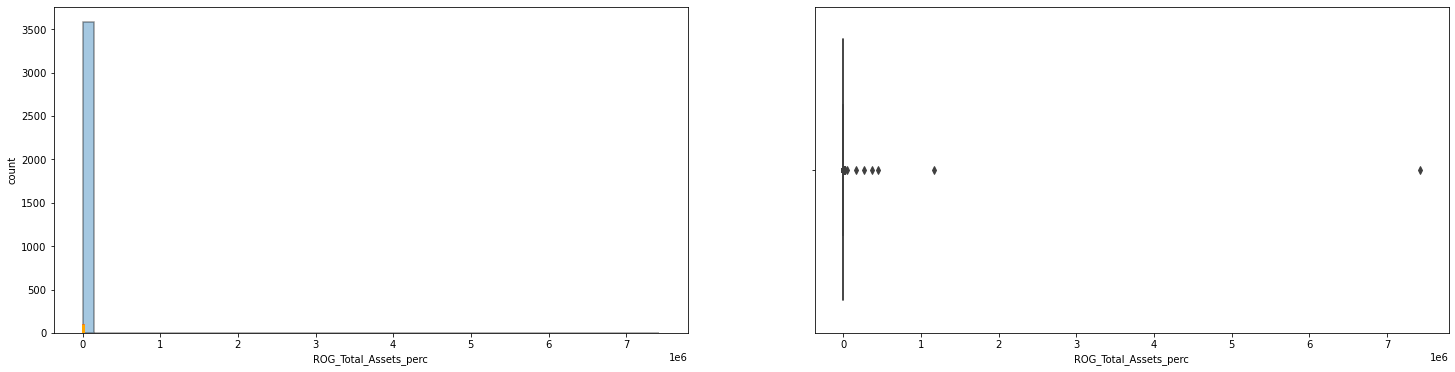

ROG_PBIDT_perc
Skew: 58.88


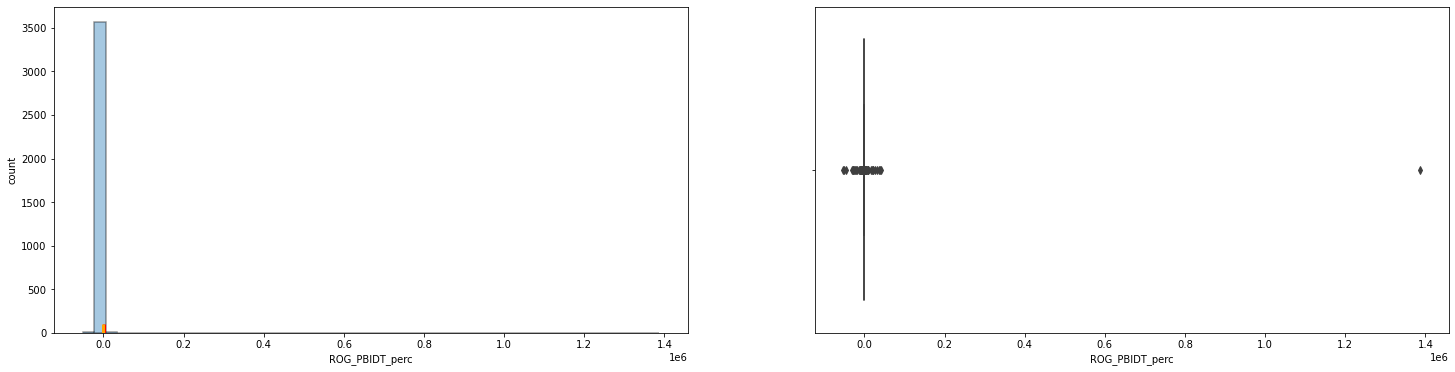

ROG_PBDT_perc
Skew: 58.41


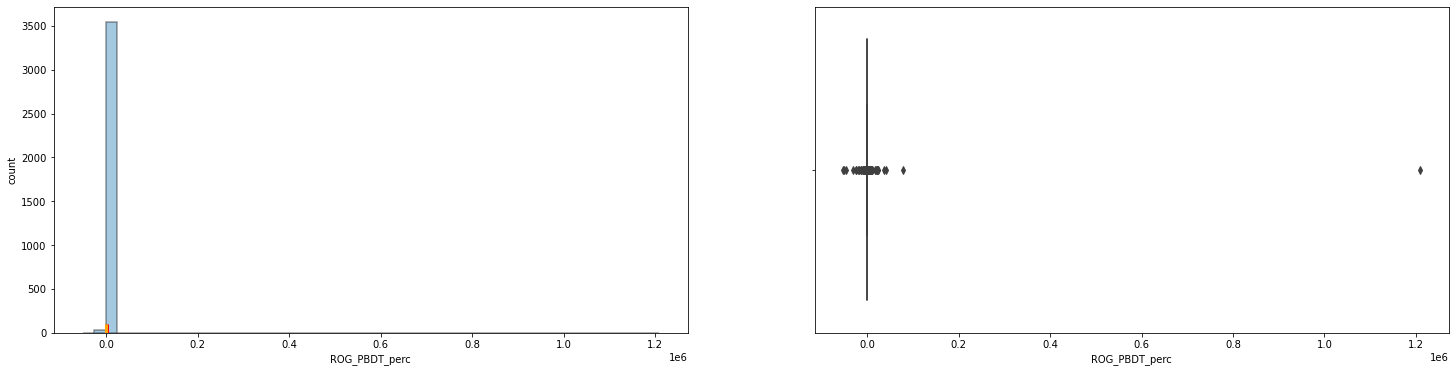

ROG_PBIT_perc
Skew: 58.93


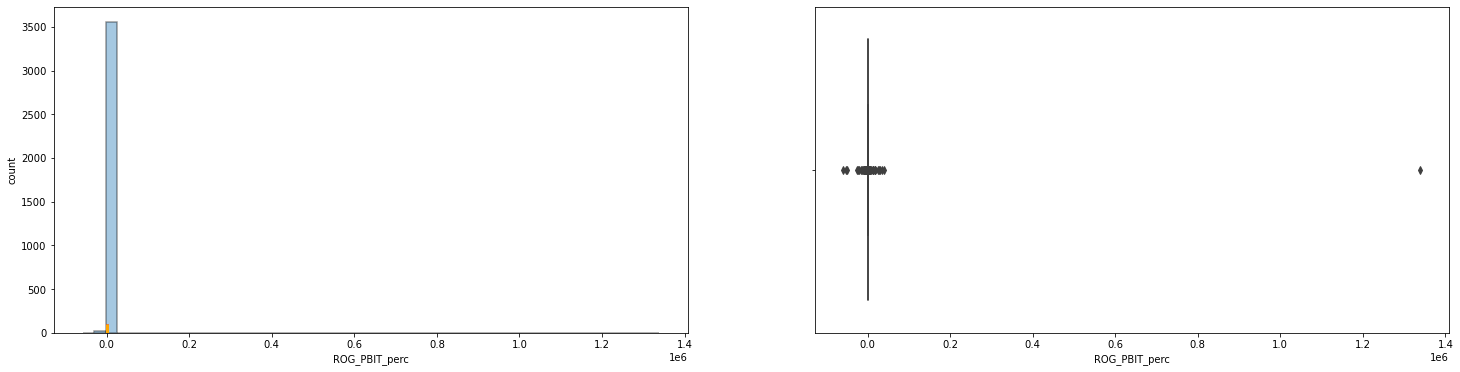

ROG_PBT_perc
Skew: 57.33


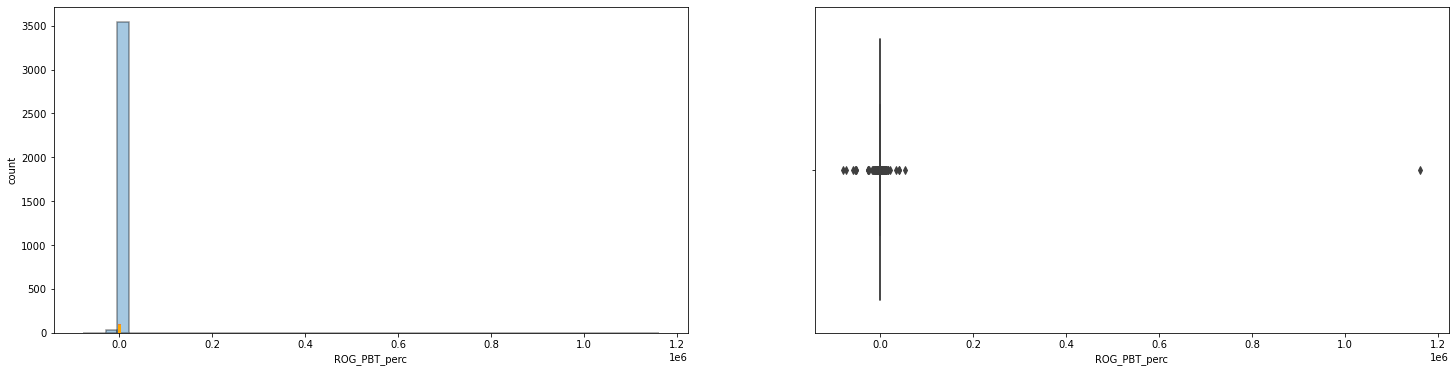

ROG_PAT_perc
Skew: 52.64


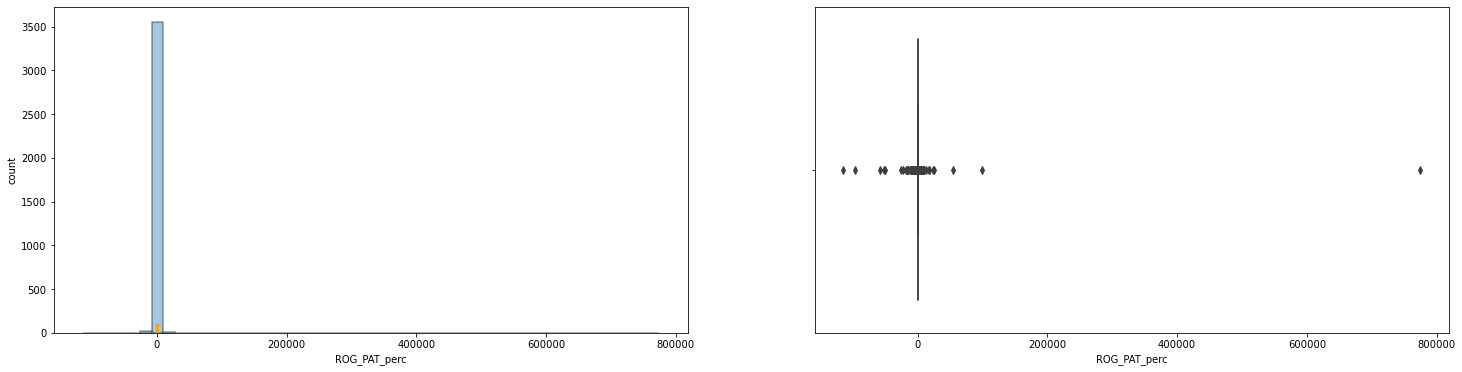

ROG_CP_perc
Skew: 56.79


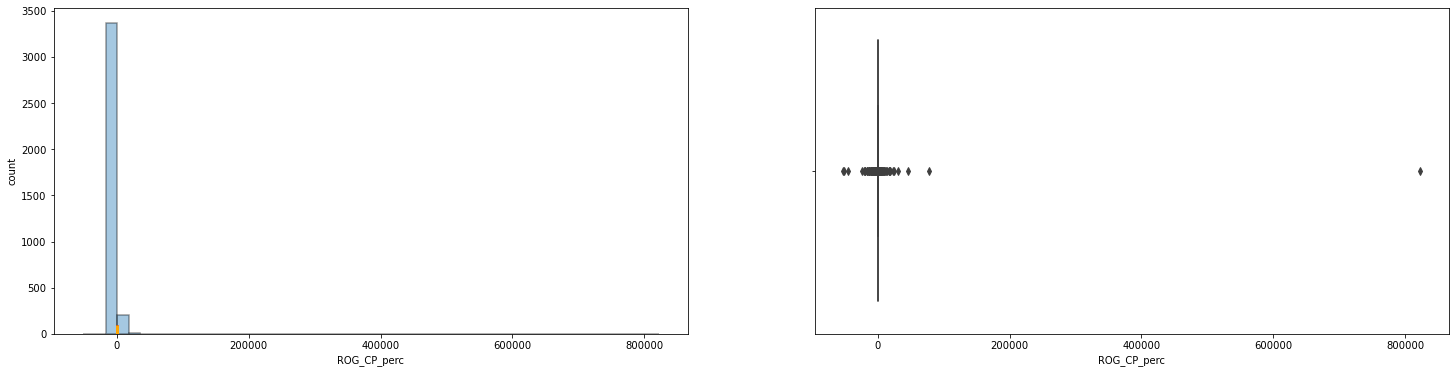

ROG_Rev_earn_in_forex_perc
Skew: 31.05


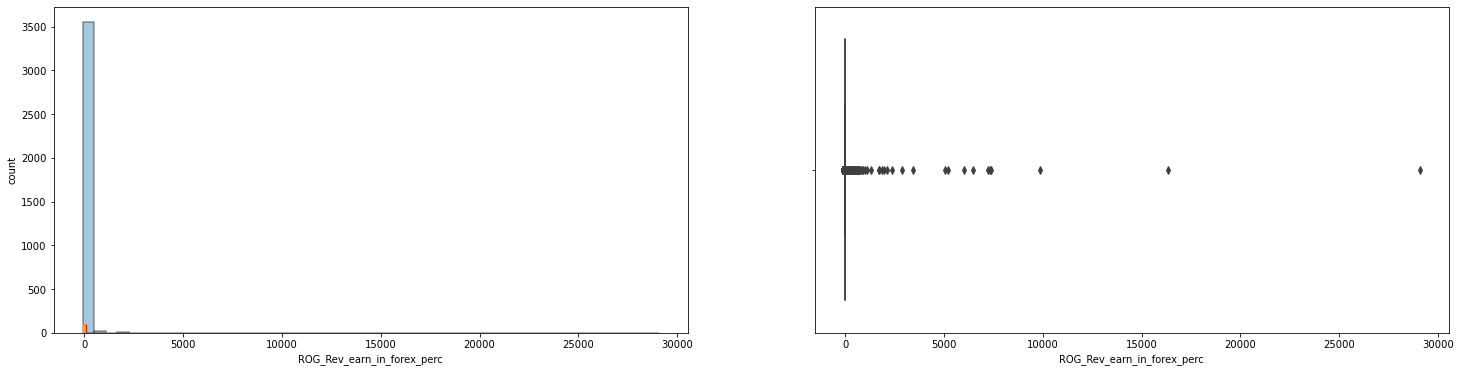

ROG_Rev_exp_in_forex_perc
Skew: 56.81


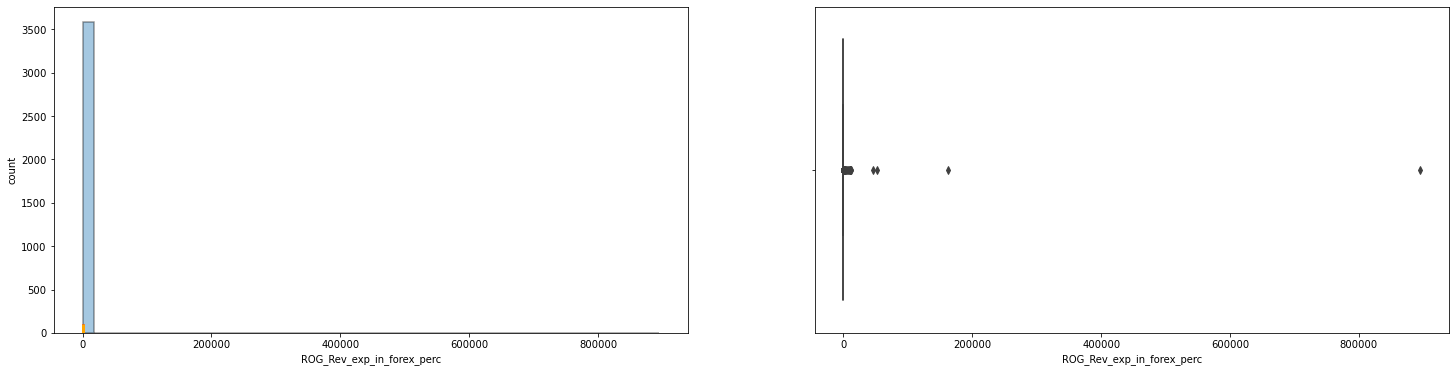

ROG_Market_Capitalisation_perc
Skew: 57.33


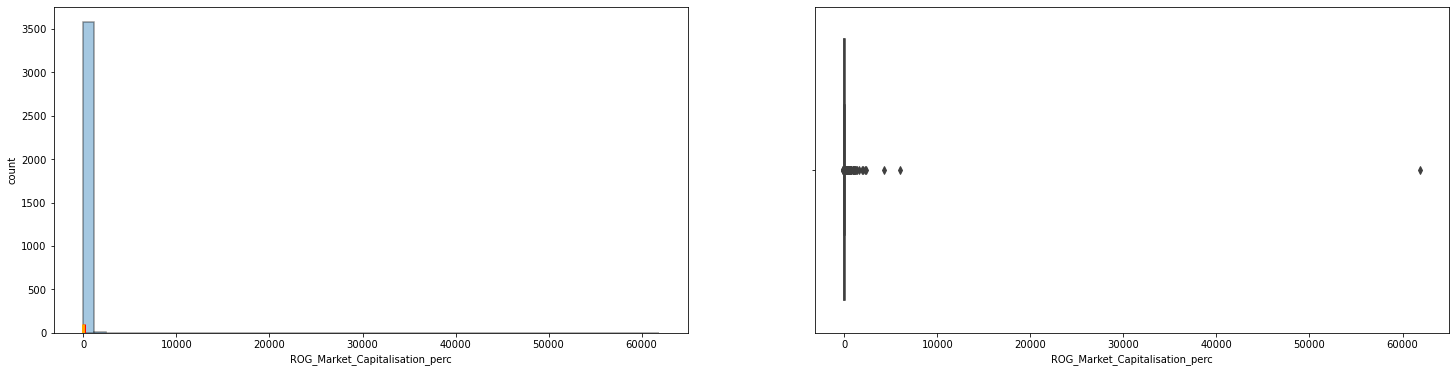

Curr_Ratio_Latest
Skew: 31.25


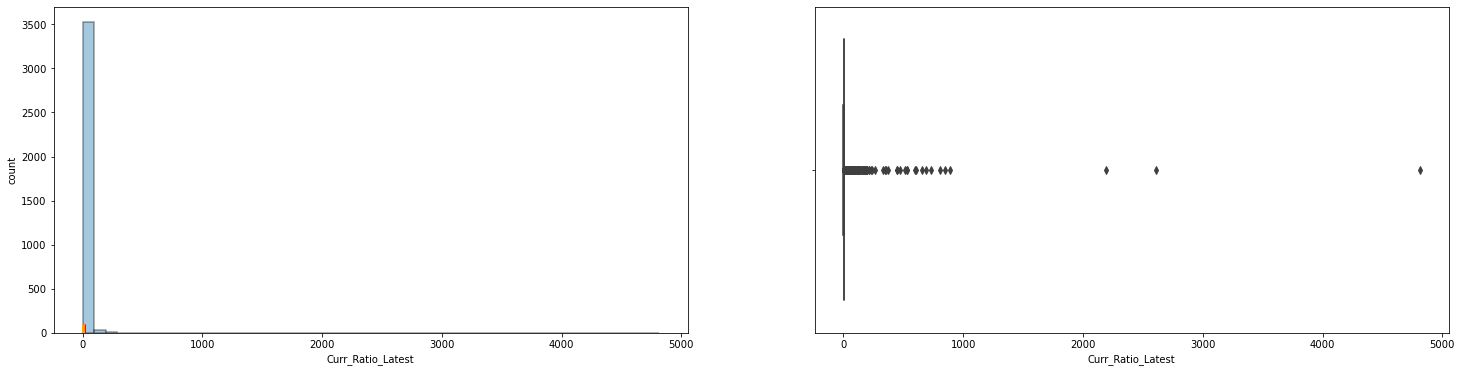

Fixed_Assets_Ratio_Latest
Skew: 24.12


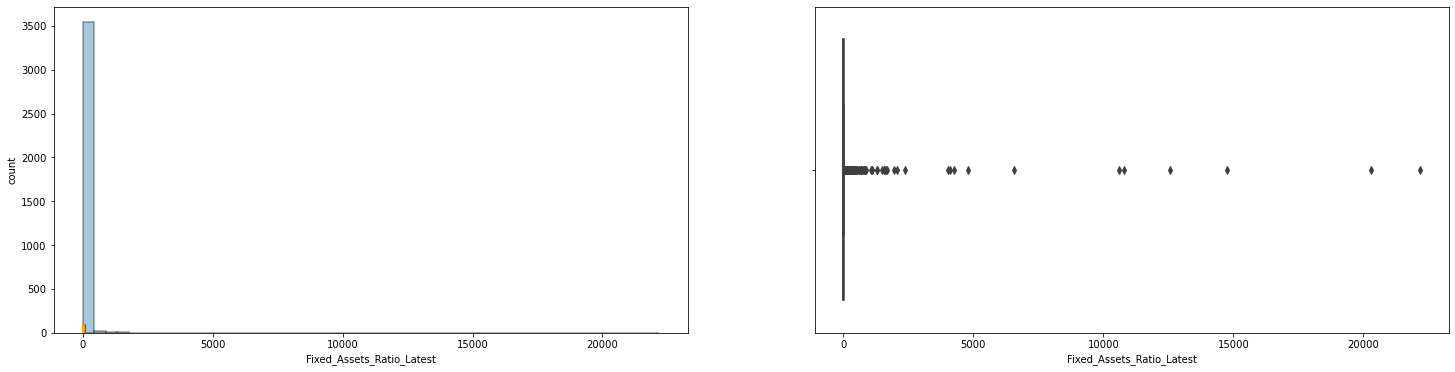

Inventory_Ratio_Latest
Skew: 27.0


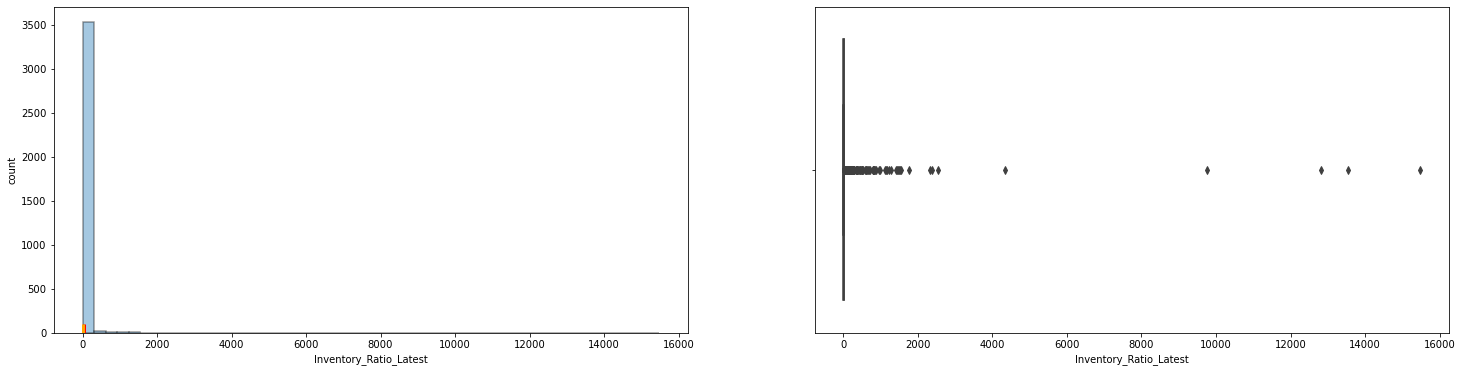

Debtors_Ratio_Latest
Skew: 35.26


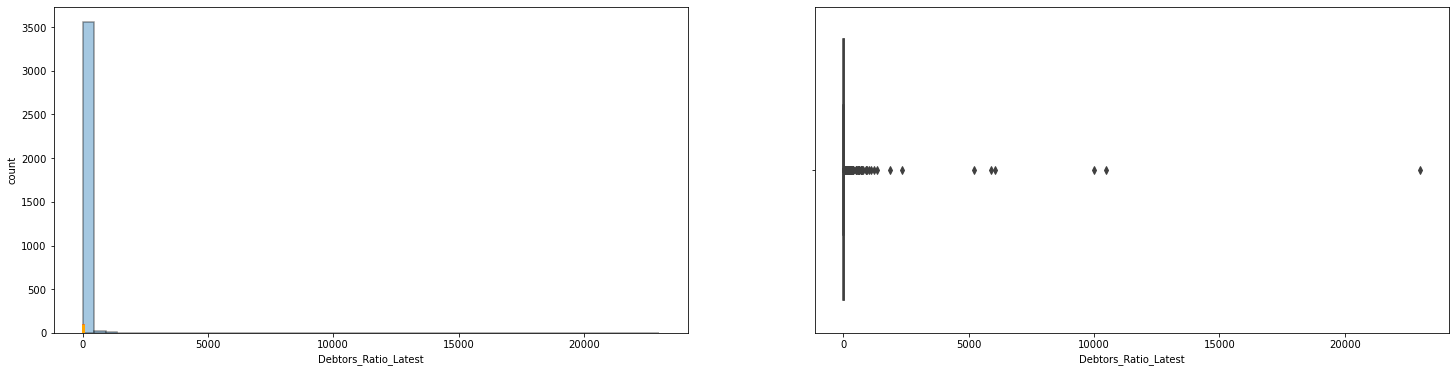

Total_Asset_Turnover_Ratio_Latest
Skew: 10.36


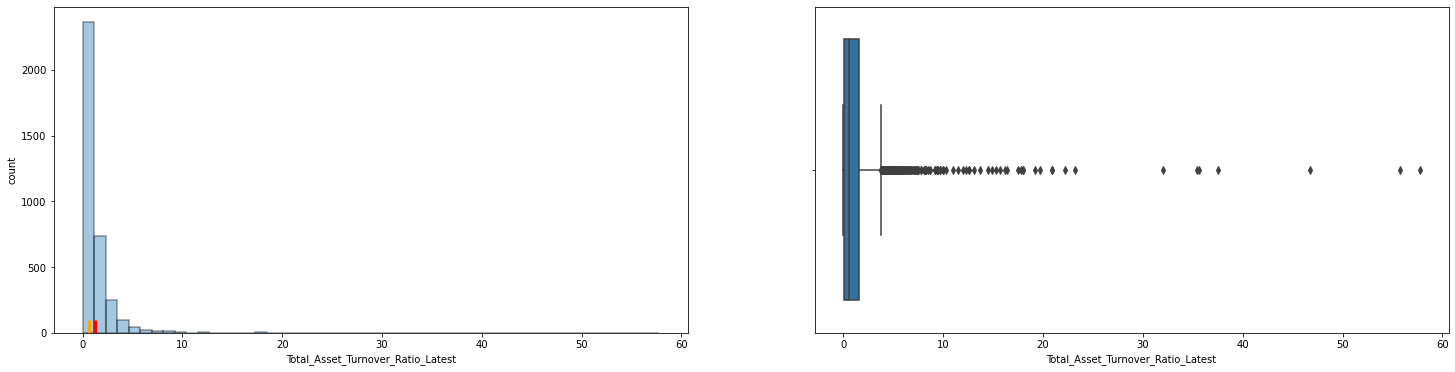

Interest_Cover_Ratio_Latest
Skew: 40.82


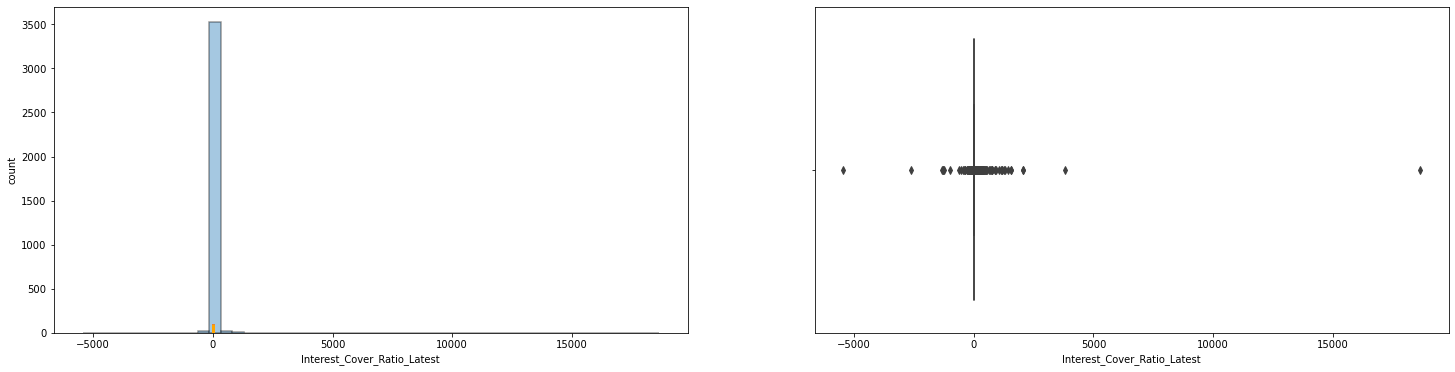

PBIDTM_perc_Latest
Skew: -30.93


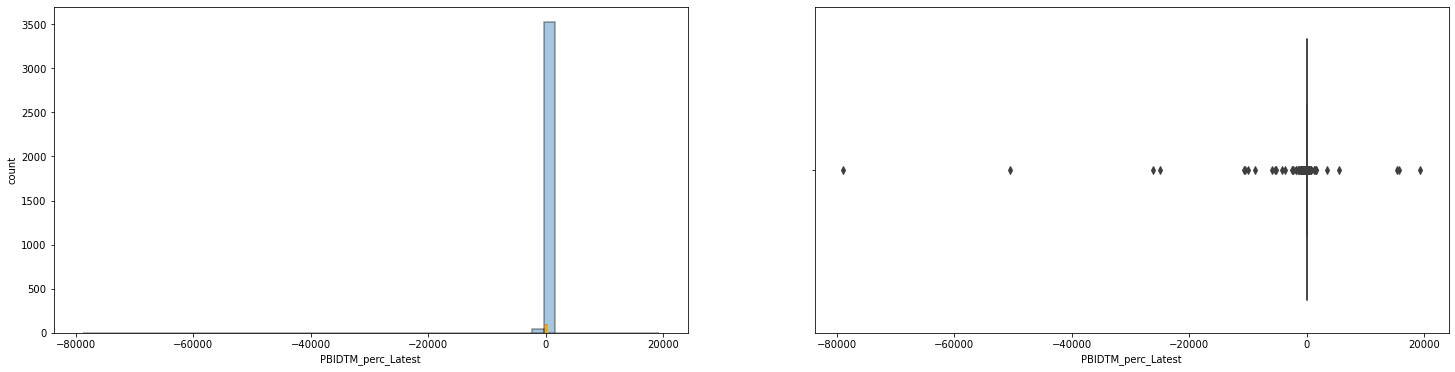

PBITM_perc_Latest
Skew: -36.0


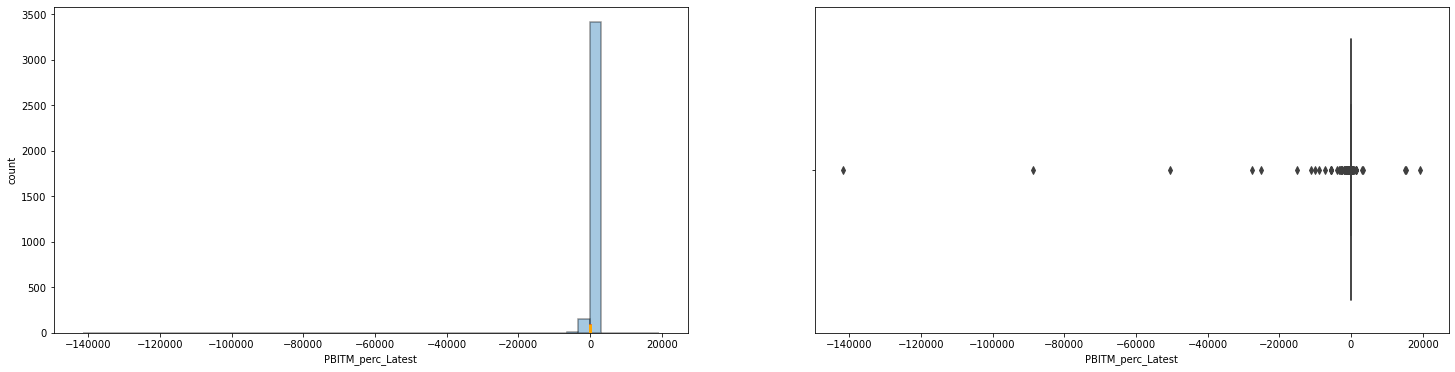

PBDTM_perc_Latest
Skew: -47.75


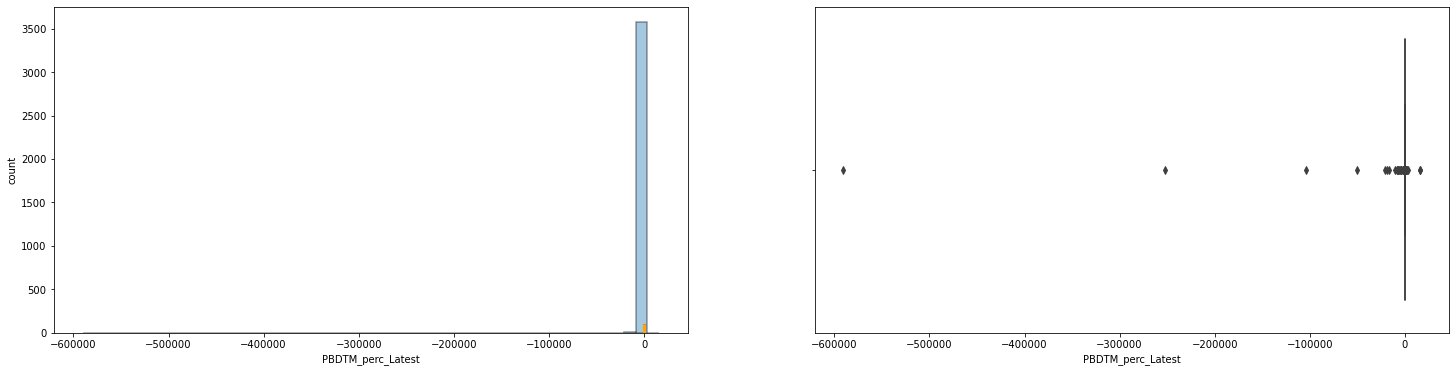

CPM_perc_Latest
Skew: -47.01


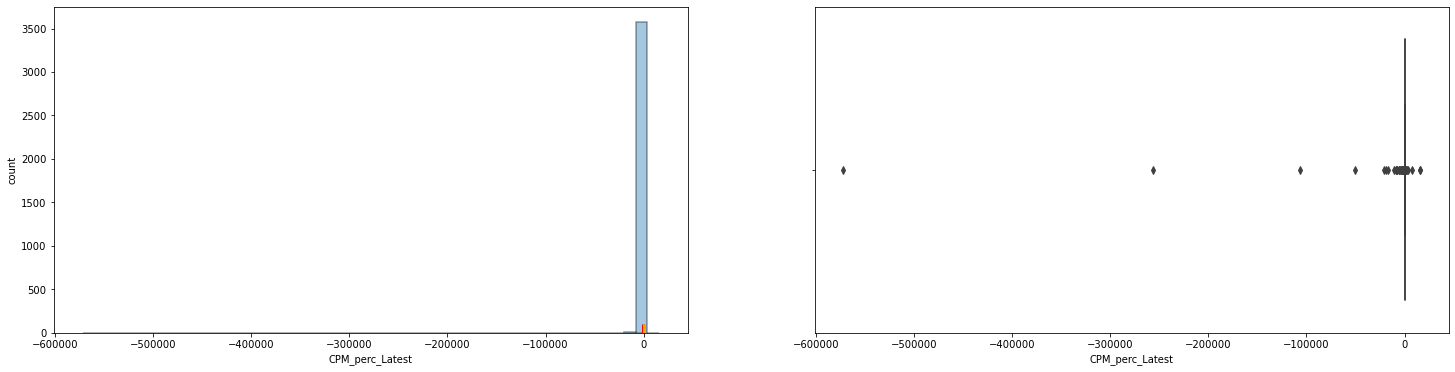

APATM_perc_Latest
Skew: -49.28


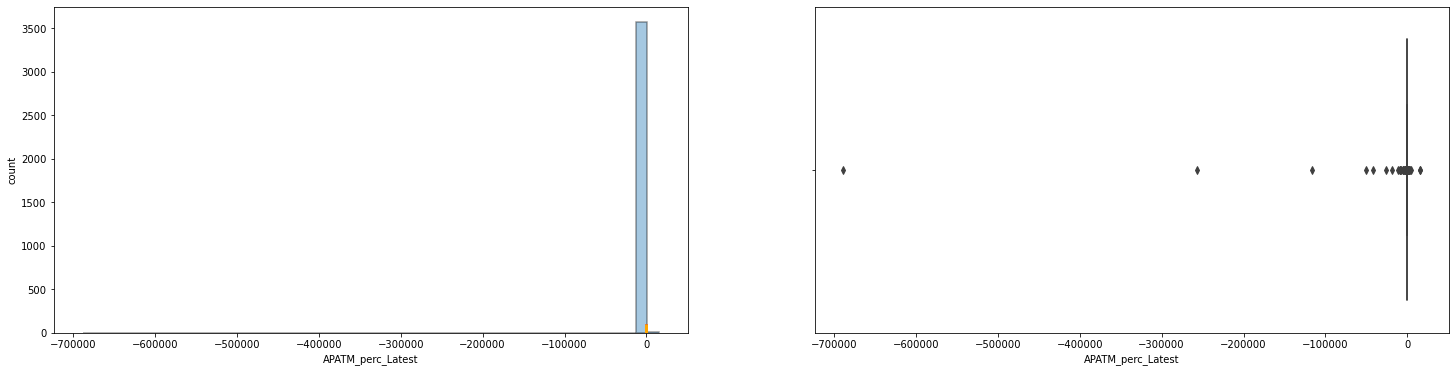

Debtors_Vel_Days
Skew: 38.66


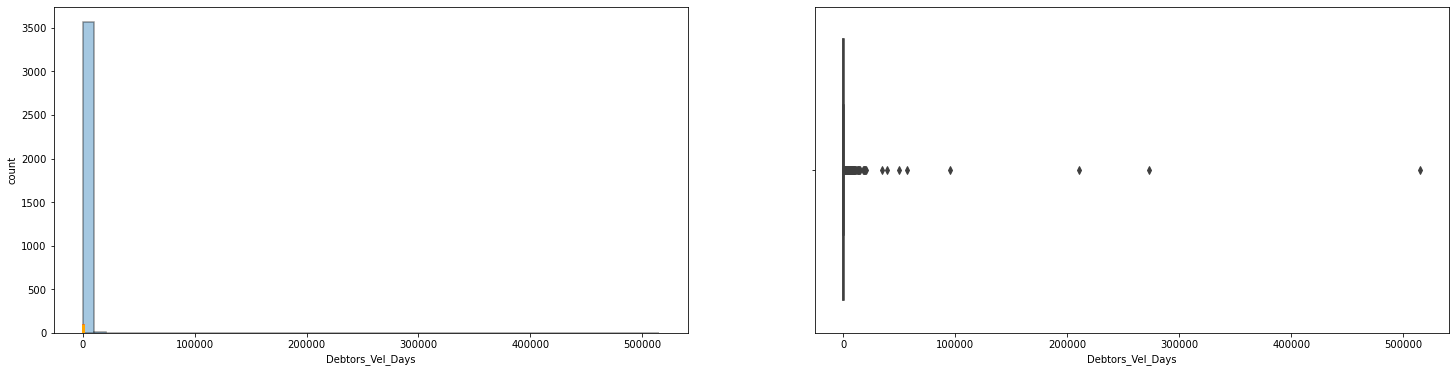

Creditors_Vel_Days
Skew: 34.12


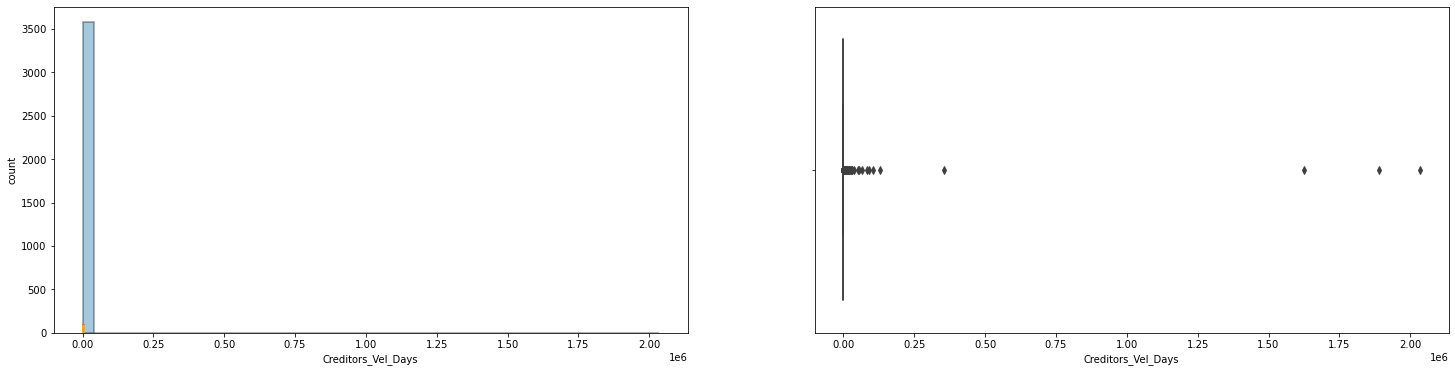

Inventory_Vel_Days
Skew: 3.49


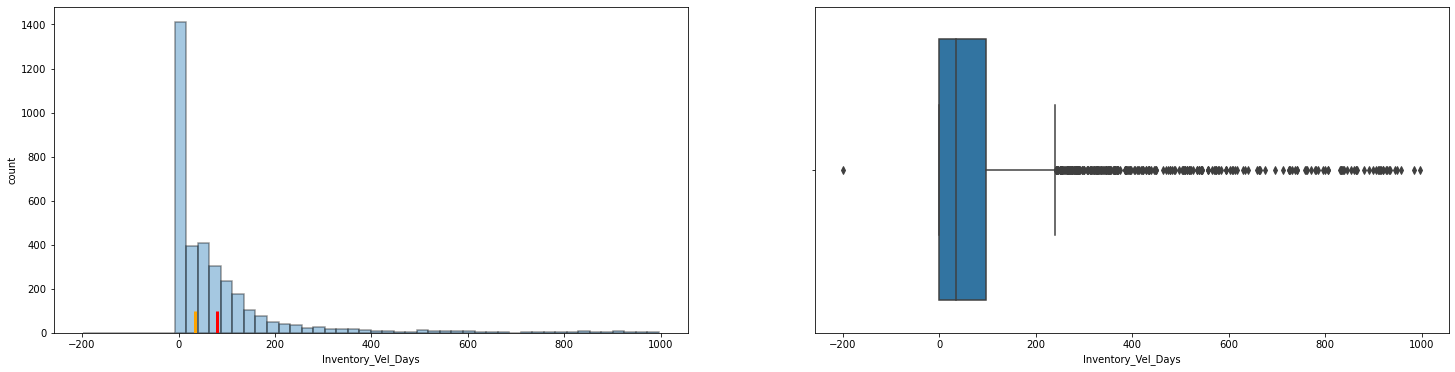

Value_of_Output_to_Total_Assets
Skew: 4.7


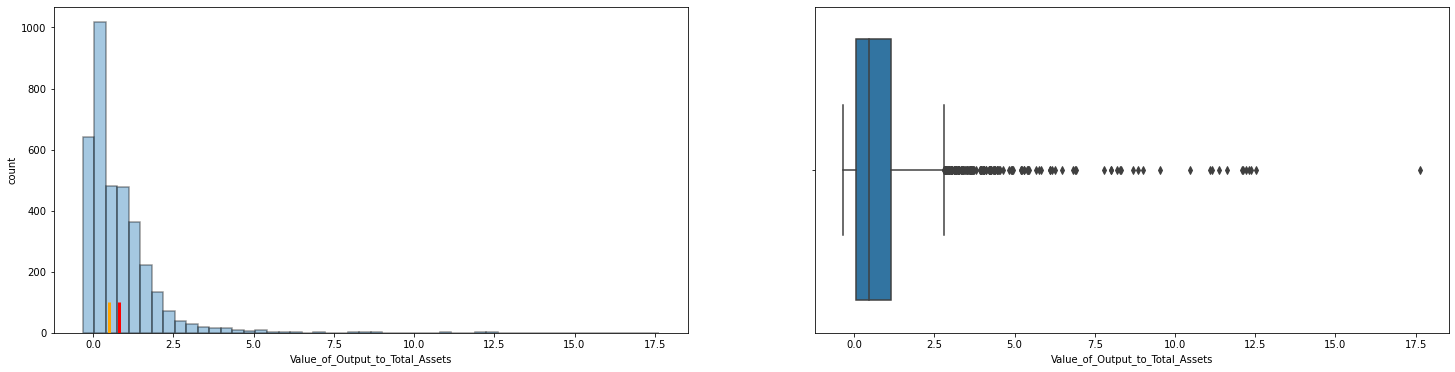

Value_of_Output_to_Gross_Block
Skew: 32.0


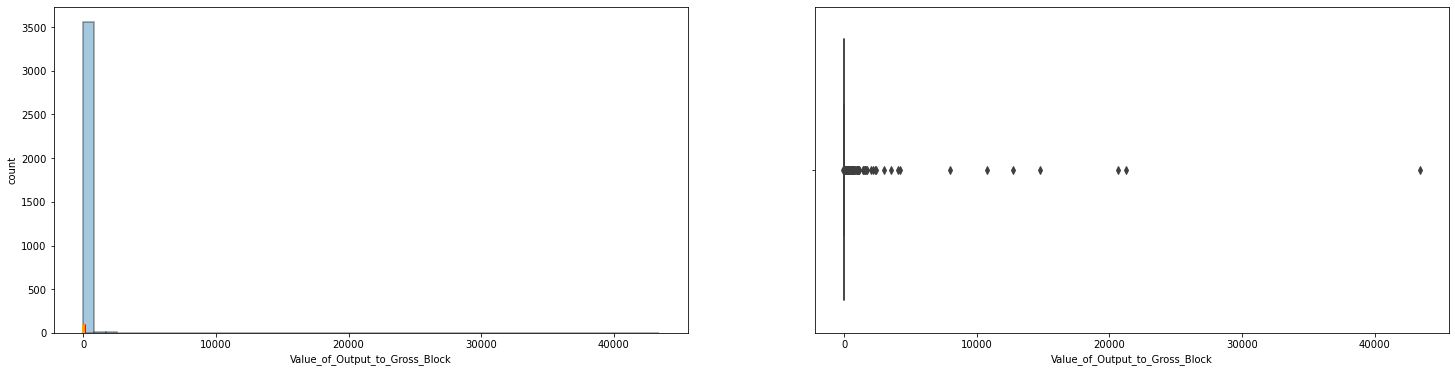

In [16]:
cont = df.select_dtypes(include = ['float64', 'int64'])
cols = list(cont.columns)
for col in cols:
    print(col)
    print('Skew:', np.round(df[col].skew(),2)) 
    plt.figure(figsize=(25,6))
    plt.subplot(1,2,1)
    sns.distplot(df[col],norm_hist=False,kde=False,hist_kws=dict(edgecolor='black',linewidth=1.5))
    plt.vlines(df[col].mean(),ymin=0, ymax=100, color = 'red', linewidth=3)
    plt.vlines(df[col].median(),ymin=0, ymax=100, color = 'orange', linewidth=3)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

There are outliers present in all the variables. There is presence of high skewness and excess kurtosis in the data as well.

## Bivariate Analysis

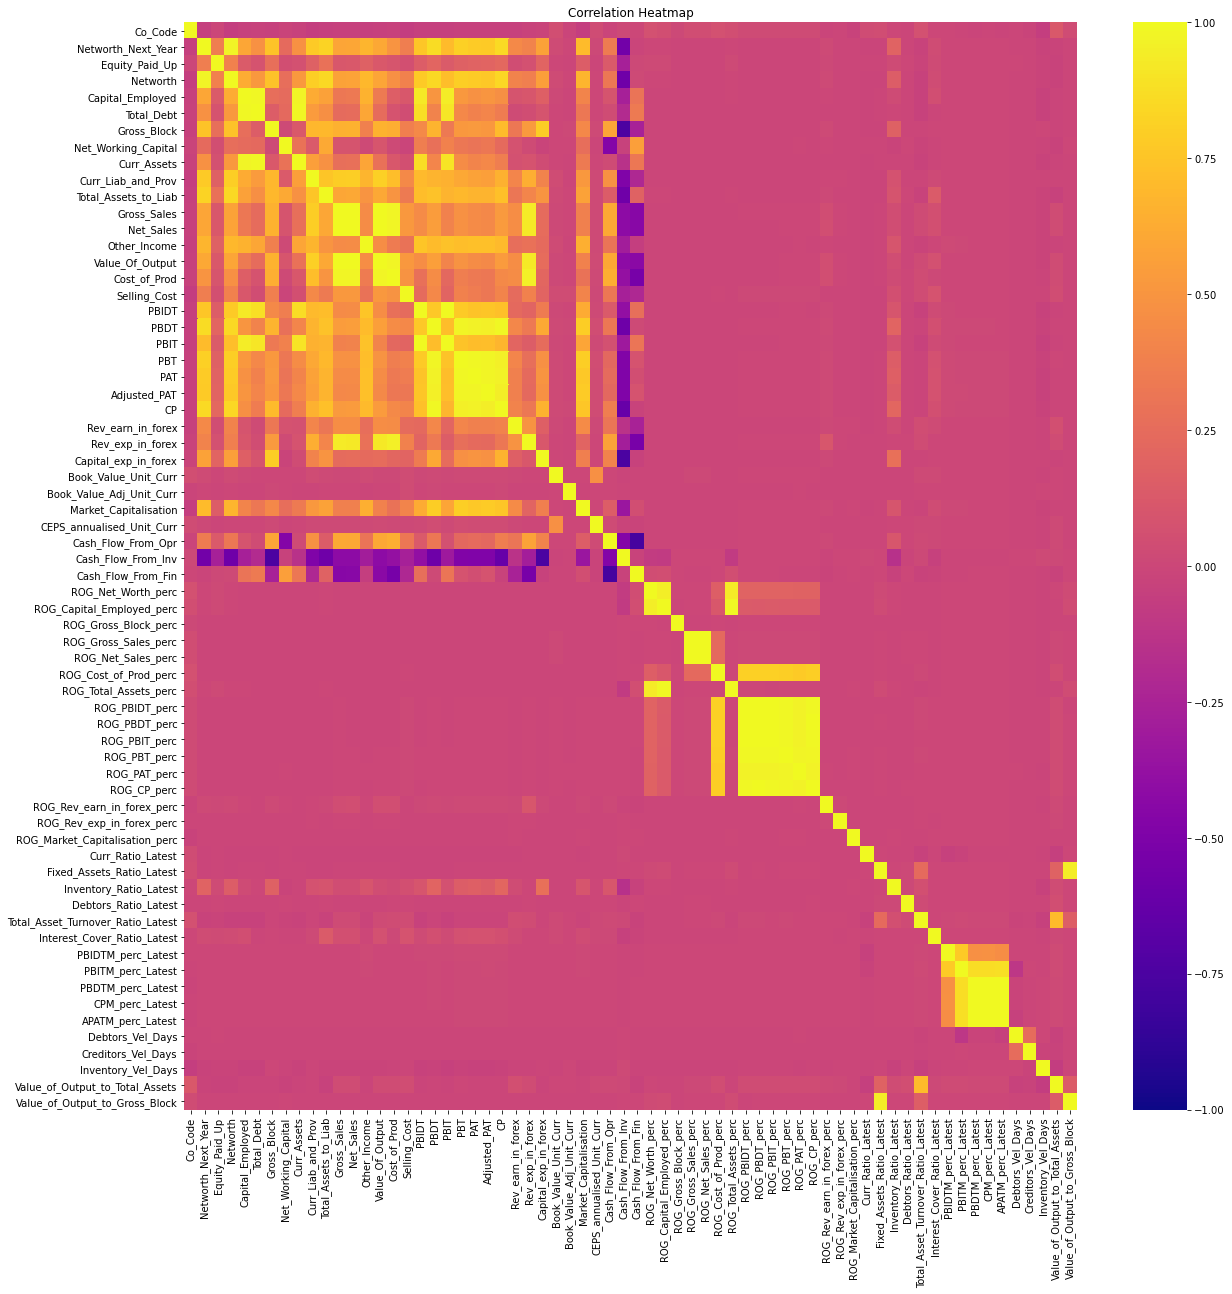

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap = 'plasma', vmin = -1, vmax= 1)
plt.title("Correlation Heatmap")
plt.show()

#### Create binary target variable using 'Networth_Next_Year' 

In [18]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)

In [19]:
df[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,1,-8021.60
1,1,-3986.19
2,1,-3192.58
3,1,-3054.51
4,1,-2967.36
5,1,-2519.40
6,1,-2125.05
7,1,-2100.56
8,1,-1695.75
9,1,-1677.18


In [20]:
df['default'].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [21]:
df['default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: default, dtype: float64

In [22]:
df['default'].describe()

count   3586.00
mean       0.11
std        0.31
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        1.00
Name: default, dtype: float64

11% companies are possible defaulters. Average default rate matches with overall default rate of 11%

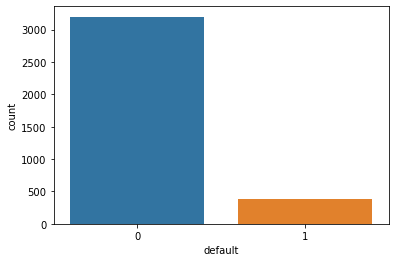

In [23]:
default_plot = sns.countplot(x=df["default"])
plt.show()

### Split Data to seperate Target Variable

In [24]:
df_X = df.drop('default', axis = 1)
df_Y = df['default']

In [25]:
df_X.head(1)

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,Gross_Sales,Net_Sales,Other_Income,Value_Of_Output,Cost_of_Prod,Selling_Cost,PBIDT,PBDT,PBIT,PBT,PAT,Adjusted_PAT,CP,Rev_earn_in_forex,Rev_exp_in_forex,Capital_exp_in_forex,Book_Value_Unit_Curr,Book_Value_Adj_Unit_Curr,Market_Capitalisation,CEPS_annualised_Unit_Curr,Cash_Flow_From_Opr,Cash_Flow_From_Inv,Cash_Flow_From_Fin,ROG_Net_Worth_perc,ROG_Capital_Employed_perc,ROG_Gross_Block_perc,ROG_Gross_Sales_perc,ROG_Net_Sales_perc,ROG_Cost_of_Prod_perc,ROG_Total_Assets_perc,ROG_PBIDT_perc,ROG_PBDT_perc,ROG_PBIT_perc,ROG_PBT_perc,ROG_PAT_perc,ROG_CP_perc,ROG_Rev_earn_in_forex_perc,ROG_Rev_exp_in_forex_perc,ROG_Market_Capitalisation_perc,Curr_Ratio_Latest,Fixed_Assets_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Total_Asset_Turnover_Ratio_Latest,Interest_Cover_Ratio_Latest,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,109.60,0.00,0.00,7.60,-0.07,137.67,0.00,-179.06,-926.52,-185.53,-932.99,-932.99,-937.85,-926.52,0.00,0.00,0.00,-167.58,-167.58,0.00,-22.09,-102.47,1.46,92.58,-15.31,-20.76,-9.75,0.00,0.00,1.38,-25.75,5.23,-19.29,4.43,-19.33,-19.33,-19.29,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,-0.20,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00


#### Drop variables which are not not useful for analysis

In [26]:
df_X = df_X.drop(['Co_Code', 'Co_Name', 'Networth_Next_Year'], axis=1)

In [27]:
df_X.shape

(3586, 64)

#### Let's check the number of outliers per column

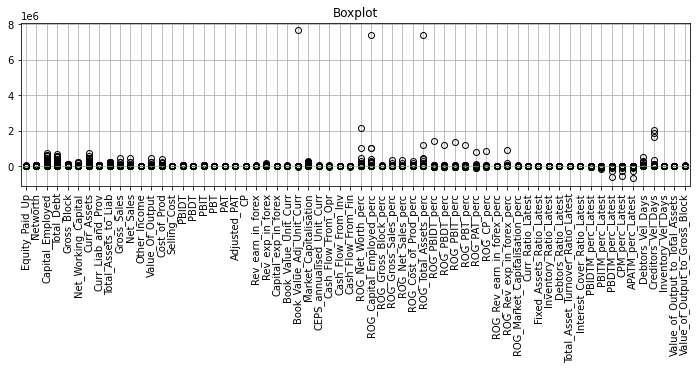

In [28]:
df_X.boxplot(figsize=(12,3))
plt.title("Boxplot")
plt.xticks(rotation=90)
plt.show()

In [29]:
def check_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [30]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    print(q5,q25,q75,dt,min,max)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [31]:
for i in df_X:
    df_X[i]=treat_outlier(df_X[i])

0.5 3.75 19.517500000000002 131.24 <built-in function min> <built-in function max>
-11.697499999999998 3.8925 117.2975 1829.0825 <built-in function min> <built-in function max>
0.4225 7.602499999999999 226.60500000000002 3634.915 <built-in function min> <built-in function max>
0.0 0.03 72.35000000000001 1572.61 <built-in function min> <built-in function max>
0.0 0.57 131.895 1409.325 <built-in function min> <built-in function max>
-11.944999999999999 0.9424999999999999 61.175 827.735 <built-in function min> <built-in function max>
0.14 4.0 135.2775 2014.74 <built-in function min> <built-in function max>
0.02 0.7324999999999999 65.65 1021.03 <built-in function min> <built-in function max>
1.22 10.555 310.54 4568.7300000000005 <built-in function min> <built-in function max>
0.0 1.4425000000000001 242.25 2845.3725 <built-in function min> <built-in function max>
0.0 1.44 234.44000000000003 2780.1400000000003 <built-in function min> <built-in function max>
0.0 0.02 3.635 78.80250000000001 <

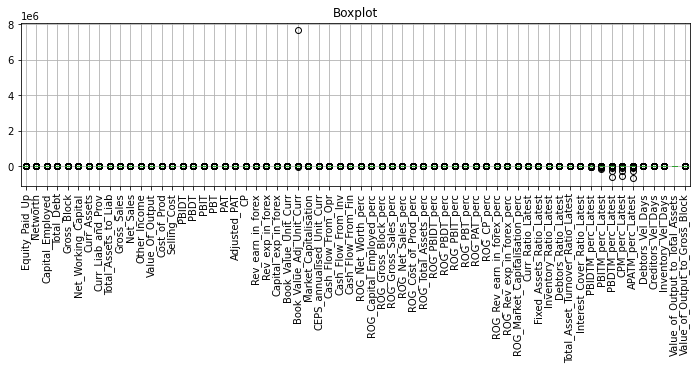

In [32]:
df_X.boxplot(figsize=(12,3))
plt.title("Boxplot")
plt.xticks(rotation=90)
plt.show()

#### Check Missing Values

In [33]:
df_X.isnull().sum().sort_values(ascending=False)

Inventory_Vel_Days                   103
Book_Value_Adj_Unit_Curr               4
PBIDTM_perc_Latest                     1
Curr_Ratio_Latest                      1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Total_Asset_Turnover_Ratio_Latest      1
Interest_Cover_Ratio_Latest            1
Debtors_Ratio_Latest                   1
PBITM_perc_Latest                      1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
Value_Of_Output                        0
Rev_earn_in_forex                      0
Rev_exp_in_forex                       0
CP                                     0
Adjusted_PAT                           0
PAT                                    0
PBT                                    0
PBIT                                   0
PBDT                                   0
PBIDT                                  0
Selling_Cost                           0
Cost_of_Prod    

In [34]:
df_X.isnull().sum().sum()

118

In [35]:
df_X.size

229504

In [36]:
(118/229504)*100

0.05141522587841606

In [37]:
df_sub1 = pd.concat([df_X, df_Y], axis =1 )

### Impute Missing Values

In [38]:
from sklearn.impute import KNNImputer

In [39]:
imputer = KNNImputer(n_neighbors=5)

In [40]:
df_imputed = pd.DataFrame(imputer.fit_transform(df_sub1), columns = df_sub1.columns)

In [41]:
df_imputed.isnull().sum()

Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
Gross_Block                          0
Net_Working_Capital                  0
Curr_Assets                          0
Curr_Liab_and_Prov                   0
Total_Assets_to_Liab                 0
Gross_Sales                          0
Net_Sales                            0
Other_Income                         0
Value_Of_Output                      0
Cost_of_Prod                         0
Selling_Cost                         0
PBIDT                                0
PBDT                                 0
PBIT                                 0
PBT                                  0
PAT                                  0
Adjusted_PAT                         0
CP                                   0
Rev_earn_in_forex                    0
Rev_exp_in_forex                     0
Capital_exp_in_forex                 0
Book_Value_Unit_Curr     

In [42]:
df_imputed.isnull().sum().sum()

0

#### Inspect possible correlations between independent variables

#### Now, Importing statsmodels modules

In [43]:
import statsmodels.formula.api as SM

In [44]:
df_1 = df_imputed.drop('default', axis=1)
df_2 = df_imputed['default']

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [46]:
calc_vif(df_1).sort_values(by = 'VIF', ascending = False)

,variables,VIF
58,APATM_perc_Latest,6691827083760.02
57,CPM_perc_Latest,4881950815577.77
55,PBITM_perc_Latest,400658300553.40
54,PBIDTM_perc_Latest,138039252344.65
56,PBDTM_perc_Latest,4667.25
10,Net_Sales,236.60
12,Value_Of_Output,183.04
35,ROG_Gross_Sales_perc,133.57
36,ROG_Net_Sales_perc,133.12
9,Gross_Sales,60.38


In [47]:
X = df_1.drop('APATM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
56,PBDTM_perc_Latest,4666.94
57,CPM_perc_Latest,4396.19
10,Net_Sales,236.60
12,Value_Of_Output,182.99
35,ROG_Gross_Sales_perc,133.55
36,ROG_Net_Sales_perc,133.10
9,Gross_Sales,60.33
19,PAT,29.54
16,PBDT,27.94
55,PBITM_perc_Latest,27.43


In [48]:
X = X.drop('PBDTM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
10,Net_Sales,236.60
12,Value_Of_Output,182.98
35,ROG_Gross_Sales_perc,133.55
36,ROG_Net_Sales_perc,133.10
9,Gross_Sales,60.33
19,PAT,29.53
16,PBDT,27.94
21,CP,26.19
8,Total_Assets_to_Liab,23.72
20,Adjusted_PAT,19.98


In [49]:
X = X.drop('Net_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False) 

,variables,VIF
34,ROG_Gross_Sales_perc,133.54
35,ROG_Net_Sales_perc,133.10
11,Value_Of_Output,49.72
9,Gross_Sales,46.21
18,PAT,29.53
15,PBDT,27.85
20,CP,26.19
8,Total_Assets_to_Liab,23.70
19,Adjusted_PAT,19.98
2,Capital_Employed,19.86


In [50]:
X = X.drop('ROG_Gross_Sales_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,Value_Of_Output,49.71
9,Gross_Sales,46.21
18,PAT,29.53
15,PBDT,27.85
20,CP,26.19
8,Total_Assets_to_Liab,23.70
19,Adjusted_PAT,19.98
2,Capital_Employed,19.86
17,PBT,19.09
14,PBIDT,15.15


In [51]:
X = X.drop('Value_Of_Output', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
17,PAT,29.53
14,PBDT,27.79
19,CP,26.19
8,Total_Assets_to_Liab,23.68
18,Adjusted_PAT,19.96
2,Capital_Employed,19.78
16,PBT,19.09
13,PBIDT,15.04
15,PBIT,14.34
9,Gross_Sales,13.74


In [52]:
X = X.drop('PAT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
14,PBDT,27.79
18,CP,26.09
8,Total_Assets_to_Liab,23.68
2,Capital_Employed,19.78
13,PBIDT,15.03
15,PBIT,14.27
16,PBT,14.06
9,Gross_Sales,13.72
51,PBITM_perc_Latest,13.66
17,Adjusted_PAT,12.40


In [53]:
X = X.drop('PBDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Total_Assets_to_Liab,23.68
2,Capital_Employed,19.78
13,PBIDT,15.00
14,PBIT,14.14
9,Gross_Sales,13.71
50,PBITM_perc_Latest,13.66
15,PBT,13.52
16,Adjusted_PAT,12.39
35,ROG_PBDT_perc,12.03
17,CP,11.64


In [54]:
X = X.drop('Total_Assets_to_Liab', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,PBIDT,14.85
13,PBIT,14.13
8,Gross_Sales,13.71
49,PBITM_perc_Latest,13.66
14,PBT,13.52
15,Adjusted_PAT,12.36
34,ROG_PBDT_perc,12.03
16,CP,11.55
10,Cost_of_Prod,11.23
6,Curr_Assets,10.68


In [55]:
X = X.drop('PBIDT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
48,PBITM_perc_Latest,13.66
8,Gross_Sales,13.54
13,PBT,13.52
14,Adjusted_PAT,12.31
33,ROG_PBDT_perc,12.03
10,Cost_of_Prod,11.23
15,CP,10.87
6,Curr_Assets,10.67
37,ROG_CP_perc,9.67
2,Capital_Employed,9.47


In [56]:
X = X.drop('PBITM_perc_Latest', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
8,Gross_Sales,13.54
13,PBT,13.52
14,Adjusted_PAT,12.31
33,ROG_PBDT_perc,12.02
10,Cost_of_Prod,11.23
15,CP,10.87
6,Curr_Assets,10.65
37,ROG_CP_perc,9.67
2,Capital_Employed,9.47
12,PBIT,9.34


In [57]:
X = X.drop('Gross_Sales', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,PBT,13.48
13,Adjusted_PAT,12.27
32,ROG_PBDT_perc,12.02
14,CP,10.83
6,Curr_Assets,10.58
36,ROG_CP_perc,9.67
2,Capital_Employed,9.47
11,PBIT,9.23
34,ROG_PBT_perc,9.08
35,ROG_PAT_perc,8.23


In [58]:
X = X.drop('PBT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
31,ROG_PBDT_perc,12.02
6,Curr_Assets,10.56
13,CP,10.54
35,ROG_CP_perc,9.65
2,Capital_Employed,9.47
33,ROG_PBT_perc,9.04
11,PBIT,8.96
34,ROG_PAT_perc,8.23
1,Networth,6.93
30,ROG_PBIDT_perc,6.79


In [59]:
X = X.drop('ROG_PBDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,Curr_Assets,10.56
13,CP,10.52
2,Capital_Employed,9.47
11,PBIT,8.95
33,ROG_PAT_perc,7.48
1,Networth,6.93
32,ROG_PBT_perc,6.87
7,Curr_Liab_and_Prov,6.20
30,ROG_PBIDT_perc,6.19
31,ROG_PBIT_perc,5.92


In [60]:
X = X.drop('Curr_Assets', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
12,CP,10.51
10,PBIT,8.89
2,Capital_Employed,8.73
32,ROG_PAT_perc,7.47
1,Networth,6.93
31,ROG_PBT_perc,6.87
29,ROG_PBIDT_perc,6.18
30,ROG_PBIT_perc,5.92
11,Adjusted_PAT,5.58
4,Gross_Block,5.31


In [61]:
X = X.drop('CP', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Capital_Employed,8.71
31,ROG_PAT_perc,7.47
1,Networth,6.88
30,ROG_PBT_perc,6.87
10,PBIT,6.65
28,ROG_PBIDT_perc,6.18
29,ROG_PBIT_perc,5.92
8,Cost_of_Prod,5.27
4,Gross_Block,5.12
6,Curr_Liab_and_Prov,5.06


In [62]:
X = X.drop('Capital_Employed', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
30,ROG_PAT_perc,7.47
29,ROG_PBT_perc,6.87
9,PBIT,6.64
27,ROG_PBIDT_perc,6.18
28,ROG_PBIT_perc,5.92
7,Cost_of_Prod,5.27
1,Networth,5.15
31,ROG_CP_perc,5.05
3,Gross_Block,4.99
5,Curr_Liab_and_Prov,4.92


In [63]:
X = X.drop('ROG_PAT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,PBIT,6.62
27,ROG_PBIDT_perc,5.85
28,ROG_PBIT_perc,5.81
7,Cost_of_Prod,5.27
1,Networth,5.15
3,Gross_Block,4.99
5,Curr_Liab_and_Prov,4.92
10,Adjusted_PAT,4.64
30,ROG_CP_perc,4.14
18,Cash_Flow_From_Opr,4.02


In [64]:
X = X.drop('PBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
26,ROG_PBIDT_perc,5.84
27,ROG_PBIT_perc,5.79
7,Cost_of_Prod,5.25
1,Networth,5.00
3,Gross_Block,4.98
5,Curr_Liab_and_Prov,4.89
29,ROG_CP_perc,4.14
17,Cash_Flow_From_Opr,3.97
16,CEPS_annualised_Unit_Curr,3.82
21,ROG_Capital_Employed_perc,3.60


In [65]:
X = X.drop('ROG_PBIDT_perc', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
7,Cost_of_Prod,5.25
1,Networth,5.00
3,Gross_Block,4.98
5,Curr_Liab_and_Prov,4.89
17,Cash_Flow_From_Opr,3.97
16,CEPS_annualised_Unit_Curr,3.82
21,ROG_Capital_Employed_perc,3.60
13,Book_Value_Unit_Curr,3.40
2,Total_Debt,3.39
9,Adjusted_PAT,3.36


In [66]:
X = X.drop('Cost_of_Prod', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
1,Networth,5.00
3,Gross_Block,4.69
5,Curr_Liab_and_Prov,4.52
16,Cash_Flow_From_Opr,3.97
15,CEPS_annualised_Unit_Curr,3.82
20,ROG_Capital_Employed_perc,3.60
12,Book_Value_Unit_Curr,3.40
2,Total_Debt,3.39
24,ROG_Total_Assets_perc,3.35
8,Adjusted_PAT,3.35


In [67]:
X = X.drop('Networth', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,Gross_Block,4.65
4,Curr_Liab_and_Prov,4.39
15,Cash_Flow_From_Opr,3.96
14,CEPS_annualised_Unit_Curr,3.76
19,ROG_Capital_Employed_perc,3.59
1,Total_Debt,3.37
23,ROG_Total_Assets_perc,3.35
24,ROG_PBIT_perc,3.24
11,Book_Value_Unit_Curr,3.23
25,ROG_PBT_perc,3.19


In [68]:
X.columns.value_counts().sum()

43

In [69]:
X.shape

(3586, 43)

In [70]:
df_1.shape

(3586, 64)

VIF >= 5 was observed for 21 variables, which have been dropped out of the total 64 variables (This excludes our target variable of 'Default'). We will now check the significance of the balance variables based on the p value to determine the final set of predictors. 

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_1,df_2, test_size=0.33,random_state=42, stratify=df_imputed.default)
df_train = pd.concat([X_train,y_train], axis=1)
df_test = pd.concat([X_test,y_test], axis=1)

In [72]:
df_train.shape

(2402, 65)

In [73]:
df_test.shape

(1184, 65)

In [74]:
X_train.shape

(2402, 64)

In [75]:
df_train.default.value_counts()

0.00    2142
1.00     260
Name: default, dtype: int64

In [76]:
df_test.default.value_counts()

0.00    1056
1.00     128
Name: default, dtype: int64

### The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is
#### y =  11−e−z 
#### Note: z =  β0  + ∑ni=1(βiX1) 

#### Creating logistic regression equation & storing it in f_1
###### model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

In [77]:
X.columns

Index(['Equity_Paid_Up', 'Total_Debt', 'Gross_Block', 'Net_Working_Capital',
       'Curr_Liab_and_Prov', 'Other_Income', 'Selling_Cost', 'Adjusted_PAT',
       'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_CP_perc',
       'ROG_Rev_earn_in_forex_perc', 'ROG_Rev_exp_in_forex_perc',
       'ROG_Market_Capitalisation_perc', 'Curr_Ratio_Latest',
       'Fixed_Assets_Ratio_Latest', 'Inventory_Ratio_Latest',
       'Debtors_Ratio_Latest', 'Total_Asset_Turnover_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'PBIDTM_perc_Latest', 'CPM_perc_Latest',
       'Debtors_Vel_Days', '

In [78]:
f_1 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + Cash_Flow_From_Fin + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_earn_in_forex_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'


#### Fitting the logistic regression model

### Model 1

In [79]:
model_1 = SM.logit(formula = f_1, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130910
         Iterations 14


#### Studying whether this equation is significant or not

In [80]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2358
Method:                           MLE   Df Model:                           43
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6181
Time:                        14:04:41   Log-Likelihood:                -314.45
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.485e-185
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0259      0.194     -5.299      0.000      -1.405      -0.646
Equity_Paid_Up                       -0.0034      0.004     -0.843      0.399      -0.011       0.004
Total_Debt                            0.0012      0.001      1.990      0.047     1.8e-05       0.002
Gross_Block                          -0.0002      0.001     -0.300      0.764      -0.002       0.001
Net_Working_Capital                  -0.0008      0.001     -0.659      0.510      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.335      0.020       0.000       0.004
Other_Income                         -0.0045      0.008     -0.536      0.592      -0.021       0.012
Selling_Cost                         -0.0229      0.013     -1.781      0.075      -0.048       0.002
Adjusted_PAT                         -0.0067      0.010     -0.674      0.501      -0.026       0.013
Rev_earn_in_forex                     0.0012      0.002      0.707      0.480      -0.002       0.005
Rev_exp_in_forex                      0.0040      0.002      1.976      0.048    3.27e-05       0.008
Capital_exp_in_forex                 -0.0621      0.066     -0.944      0.345      -0.191       0.067
Book_Value_Unit_Curr                 -0.1494      0.012    -12.340      0.000      -0.173      -0.126
Book_Value_Adj_Unit_Curr          -5.588e-05      0.000     -0.207      0.836      -0.001       0.000
Market_Capitalisation                -0.0007      0.000     -2.868      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0803      0.040     -2.026      0.043      -0.158      -0.003
Cash_Flow_From_Opr                   -0.0010      0.005     -0.209      0.834      -0.010       0.008
Cash_Flow_From_Inv                   -0.0025      0.005     -0.479      0.632      -0.013       0.008
Cash_Flow_From_Fin                    0.0012      0.005      0.219      0.827      -0.010       0.012
ROG_Net_Worth_perc                   -0.0129      0.004     -2.978      0.003      -0.021      -0.004
ROG_Capital_Employed_perc             0.0126      0.006      1.977      0.048       0.000       0.025
ROG_Gross_Block_perc                 -0.0018      0.007     -0.271      0.786      -0.015       0.011
ROG_Net_Sales_perc                   -0.0026      0.002     -1.555      0.120      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.762      0.446      -0.004       0.002
ROG_Total_Assets_perc                -0.0163      0.008     -2.163      0.031      -0.031      -0.002
ROG_PBIT_perc                         0.0017      0.001      1.305      0.192      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.334      0.738      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.694      0.488      -0.003       0.001
ROG_Rev_earn_in_forex_perc           -0.0005      0.005     -0.113      0.910  

We can see that few variables are insignificant & may not be useful to discriminate cases of default.
Let us look at the adjusted pseudo R-square value

In [81]:
print('The adjusted pseudo R-square value is',1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.5659271265807367


Adjusted pseudo R-square seems to be lower than Pseudo R-square value which means there are insignificant variables present in the model. Lets try & remove variables whose p value is greater than 0.05 in descending order & rebuild our model.

In the above model we see that ROG_Rev_earn_in_forex_perc has the highest p value of 0.910 and hence, is an insignificant variable and we are dropping it. Similarly, we will drop all variables sequentially which are insignificant ie; for whom the p value is <0.05 until we get out main significant predictors.

### Model 2

In [82]:
f_2 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + Cash_Flow_From_Fin + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [83]:
model_2 = SM.logit(formula = f_2, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130913
         Iterations 14


In [84]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2359
Method:                           MLE   Df Model:                           42
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6181
Time:                        14:04:50   Log-Likelihood:                -314.45
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.042e-186
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0258      0.194     -5.298      0.000      -1.405      -0.646
Equity_Paid_Up                       -0.0033      0.004     -0.837      0.402      -0.011       0.004
Total_Debt                            0.0012      0.001      1.997      0.046    2.23e-05       0.002
Gross_Block                          -0.0002      0.001     -0.292      0.770      -0.002       0.001
Net_Working_Capital                  -0.0008      0.001     -0.650      0.516      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.341      0.019       0.000       0.004
Other_Income                         -0.0045      0.008     -0.536      0.592      -0.021       0.012
Selling_Cost                         -0.0229      0.013     -1.789      0.074      -0.048       0.002
Adjusted_PAT                         -0.0067      0.010     -0.674      0.500      -0.026       0.013
Rev_earn_in_forex                     0.0012      0.002      0.700      0.484      -0.002       0.005
Rev_exp_in_forex                      0.0040      0.002      1.996      0.046    7.13e-05       0.008
Capital_exp_in_forex                 -0.0618      0.066     -0.941      0.347      -0.191       0.067
Book_Value_Unit_Curr                 -0.1495      0.012    -12.354      0.000      -0.173      -0.126
Book_Value_Adj_Unit_Curr          -5.622e-05      0.000     -0.209      0.834      -0.001       0.000
Market_Capitalisation                -0.0007      0.000     -2.869      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0802      0.040     -2.025      0.043      -0.158      -0.003
Cash_Flow_From_Opr                   -0.0011      0.005     -0.236      0.814      -0.010       0.008
Cash_Flow_From_Inv                   -0.0025      0.005     -0.475      0.634      -0.013       0.008
Cash_Flow_From_Fin                    0.0011      0.005      0.205      0.837      -0.010       0.012
ROG_Net_Worth_perc                   -0.0129      0.004     -2.976      0.003      -0.021      -0.004
ROG_Capital_Employed_perc             0.0125      0.006      1.975      0.048    9.33e-05       0.025
ROG_Gross_Block_perc                 -0.0019      0.007     -0.282      0.778      -0.015       0.011
ROG_Net_Sales_perc                   -0.0026      0.002     -1.561      0.118      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.762      0.446      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.162      0.031      -0.031      -0.002
ROG_PBIT_perc                         0.0017      0.001      1.308      0.191      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.341      0.733      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.696      0.486      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0031      0.002     -1.310      0.190  

Cash_Flow_From_Fin is insignificant in model 2

### Model 3

In [85]:
f_3 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Book_Value_Adj_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [86]:
model_3 = SM.logit(formula = f_3, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130921
         Iterations 14


In [87]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2360
Method:                           MLE   Df Model:                           41
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6181
Time:                        14:04:54   Log-Likelihood:                -314.47
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.025e-186
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0266      0.194     -5.303      0.000      -1.406      -0.647
Equity_Paid_Up                       -0.0032      0.004     -0.816      0.415      -0.011       0.004
Total_Debt                            0.0012      0.001      1.992      0.046    1.92e-05       0.002
Gross_Block                          -0.0002      0.001     -0.278      0.781      -0.002       0.001
Net_Working_Capital                  -0.0008      0.001     -0.646      0.518      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.345      0.019       0.000       0.004
Other_Income                         -0.0050      0.008     -0.640      0.522      -0.020       0.010
Selling_Cost                         -0.0234      0.013     -1.847      0.065      -0.048       0.001
Adjusted_PAT                         -0.0064      0.010     -0.656      0.512      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.698      0.485      -0.002       0.005
Rev_exp_in_forex                      0.0040      0.002      1.987      0.047    5.35e-05       0.008
Capital_exp_in_forex                 -0.0617      0.066     -0.939      0.348      -0.190       0.067
Book_Value_Unit_Curr                 -0.1496      0.012    -12.367      0.000      -0.173      -0.126
Book_Value_Adj_Unit_Curr          -5.682e-05      0.000     -0.211      0.833      -0.001       0.000
Market_Capitalisation                -0.0007      0.000     -2.879      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0798      0.040     -2.016      0.044      -0.157      -0.002
Cash_Flow_From_Opr                   -0.0016      0.004     -0.460      0.646      -0.009       0.005
Cash_Flow_From_Inv                   -0.0029      0.005     -0.622      0.534      -0.012       0.006
ROG_Net_Worth_perc                   -0.0130      0.004     -3.019      0.003      -0.021      -0.005
ROG_Capital_Employed_perc             0.0127      0.006      2.020      0.043       0.000       0.025
ROG_Gross_Block_perc                 -0.0018      0.007     -0.280      0.780      -0.015       0.011
ROG_Net_Sales_perc                   -0.0026      0.002     -1.579      0.114      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.759      0.448      -0.004       0.002
ROG_Total_Assets_perc                -0.0161      0.007     -2.156      0.031      -0.031      -0.001
ROG_PBIT_perc                         0.0017      0.001      1.300      0.194      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.336      0.737      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.692      0.489      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0031      0.002     -1.301      0.193      -0.008       0.002
ROG_Market_Capitalisation_perc       -0.0006      0.002     -0.368      0.713  

Book_Value_Adj_Unit_Curr is insignificant

### Model 4

In [88]:
f_4 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [89]:
model_4 = SM.logit(formula = f_4, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130939
         Iterations 12


In [90]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           40
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6181
Time:                        14:05:00   Log-Likelihood:                -314.52
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.102e-187
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0255      0.194     -5.298      0.000      -1.405      -0.646
Equity_Paid_Up                       -0.0033      0.004     -0.827      0.408      -0.011       0.004
Total_Debt                            0.0012      0.001      2.093      0.036    7.77e-05       0.002
Gross_Block                          -0.0002      0.001     -0.293      0.770      -0.002       0.001
Net_Working_Capital                  -0.0008      0.001     -0.672      0.501      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.340      0.019       0.000       0.004
Other_Income                         -0.0050      0.008     -0.642      0.521      -0.020       0.010
Selling_Cost                         -0.0235      0.013     -1.855      0.064      -0.048       0.001
Adjusted_PAT                         -0.0062      0.010     -0.645      0.519      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.700      0.484      -0.002       0.005
Rev_exp_in_forex                      0.0040      0.002      1.997      0.046    7.31e-05       0.008
Capital_exp_in_forex                 -0.0619      0.066     -0.941      0.347      -0.191       0.067
Book_Value_Unit_Curr                 -0.1498      0.012    -12.429      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -2.886      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0804      0.040     -2.024      0.043      -0.158      -0.003
Cash_Flow_From_Opr                   -0.0016      0.004     -0.458      0.647      -0.009       0.005
Cash_Flow_From_Inv                   -0.0029      0.005     -0.617      0.538      -0.012       0.006
ROG_Net_Worth_perc                   -0.0130      0.004     -3.012      0.003      -0.021      -0.005
ROG_Capital_Employed_perc             0.0127      0.006      2.012      0.044       0.000       0.025
ROG_Gross_Block_perc                 -0.0018      0.007     -0.279      0.780      -0.015       0.011
ROG_Net_Sales_perc                   -0.0026      0.002     -1.575      0.115      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.758      0.448      -0.004       0.002
ROG_Total_Assets_perc                -0.0160      0.007     -2.147      0.032      -0.031      -0.001
ROG_PBIT_perc                         0.0017      0.001      1.298      0.194      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.335      0.737      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.690      0.490      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0031      0.002     -1.298      0.194      -0.008       0.002
ROG_Market_Capitalisation_perc       -0.0006      0.002     -0.371      0.711      -0.004       0.002
Curr_Ratio_Latest                    -0.0038      0.005     -0.747      0.455  

ROG_Gross_Block_perc is insignificant

### Model 5

In [91]:
f_5 = 'default ~ Equity_Paid_Up + Total_Debt + Gross_Block + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [92]:
model_5 = SM.logit(formula = f_5, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130955
         Iterations 12


In [93]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2362
Method:                           MLE   Df Model:                           39
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6180
Time:                        14:05:04   Log-Likelihood:                -314.55
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.241e-188
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0230      0.193     -5.292      0.000      -1.402      -0.644
Equity_Paid_Up                       -0.0033      0.004     -0.833      0.405      -0.011       0.004
Total_Debt                            0.0012      0.001      2.080      0.038    6.98e-05       0.002
Gross_Block                          -0.0002      0.001     -0.303      0.762      -0.002       0.001
Net_Working_Capital                  -0.0008      0.001     -0.647      0.518      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.339      0.019       0.000       0.004
Other_Income                         -0.0049      0.008     -0.627      0.531      -0.020       0.010
Selling_Cost                         -0.0233      0.013     -1.845      0.065      -0.048       0.001
Adjusted_PAT                         -0.0062      0.010     -0.646      0.518      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.684      0.494      -0.002       0.005
Rev_exp_in_forex                      0.0040      0.002      2.004      0.045    8.79e-05       0.008
Capital_exp_in_forex                 -0.0615      0.066     -0.935      0.350      -0.190       0.067
Book_Value_Unit_Curr                 -0.1500      0.012    -12.458      0.000      -0.174      -0.126
Market_Capitalisation                -0.0007      0.000     -2.888      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0799      0.040     -2.013      0.044      -0.158      -0.002
Cash_Flow_From_Opr                   -0.0017      0.004     -0.466      0.641      -0.009       0.005
Cash_Flow_From_Inv                   -0.0028      0.005     -0.595      0.552      -0.012       0.006
ROG_Net_Worth_perc                   -0.0130      0.004     -3.023      0.003      -0.021      -0.005
ROG_Capital_Employed_perc             0.0127      0.006      2.020      0.043       0.000       0.025
ROG_Net_Sales_perc                   -0.0026      0.002     -1.566      0.117      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.774      0.439      -0.004       0.002
ROG_Total_Assets_perc                -0.0164      0.007     -2.236      0.025      -0.031      -0.002
ROG_PBIT_perc                         0.0017      0.001      1.305      0.192      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.330      0.741      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.702      0.483      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.286      0.198      -0.008       0.002
ROG_Market_Capitalisation_perc       -0.0005      0.002     -0.348      0.728      -0.004       0.003
Curr_Ratio_Latest                    -0.0037      0.005     -0.742      0.458      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0007      0.001     -0.608      0.543  

Gross_Block is insignificant

### Model 6

In [94]:
f_6 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + ROG_Market_Capitalisation_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [95]:
model_6 = SM.logit(formula = f_6, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130974
         Iterations 12


In [96]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2363
Method:                           MLE   Df Model:                           38
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6180
Time:                        14:05:08   Log-Likelihood:                -314.60
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.500e-189
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0241      0.193     -5.299      0.000      -1.403      -0.645
Equity_Paid_Up                       -0.0033      0.004     -0.851      0.395      -0.011       0.004
Total_Debt                            0.0012      0.001      2.090      0.037    7.22e-05       0.002
Net_Working_Capital                  -0.0008      0.001     -0.693      0.489      -0.003       0.001
Curr_Liab_and_Prov                    0.0024      0.001      2.307      0.021       0.000       0.004
Other_Income                         -0.0052      0.008     -0.667      0.505      -0.020       0.010
Selling_Cost                         -0.0229      0.013     -1.833      0.067      -0.047       0.002
Adjusted_PAT                         -0.0061      0.010     -0.633      0.527      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.688      0.492      -0.002       0.005
Rev_exp_in_forex                      0.0039      0.002      1.981      0.048    4.09e-05       0.008
Capital_exp_in_forex                 -0.0648      0.065     -0.999      0.318      -0.192       0.062
Book_Value_Unit_Curr                 -0.1502      0.012    -12.482      0.000      -0.174      -0.127
Market_Capitalisation                -0.0007      0.000     -2.885      0.004      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0798      0.039     -2.027      0.043      -0.157      -0.003
Cash_Flow_From_Opr                   -0.0019      0.003     -0.560      0.575      -0.009       0.005
Cash_Flow_From_Inv                   -0.0027      0.005     -0.583      0.560      -0.012       0.006
ROG_Net_Worth_perc                   -0.0129      0.004     -3.012      0.003      -0.021      -0.005
ROG_Capital_Employed_perc             0.0127      0.006      2.018      0.044       0.000       0.025
ROG_Net_Sales_perc                   -0.0026      0.002     -1.575      0.115      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.774      0.439      -0.004       0.002
ROG_Total_Assets_perc                -0.0164      0.007     -2.230      0.026      -0.031      -0.002
ROG_PBIT_perc                         0.0017      0.001      1.303      0.192      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.346      0.730      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.698      0.485      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.269      0.205      -0.008       0.002
ROG_Market_Capitalisation_perc       -0.0005      0.002     -0.343      0.731      -0.004       0.003
Curr_Ratio_Latest                    -0.0037      0.005     -0.741      0.459      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0007      0.001     -0.604      0.546      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.506      0.132  

ROG_Market_Capitalisation_perc is insignificant

### Model 7

In [97]:
f_7 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_PBT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [98]:
model_7 = SM.logit(formula = f_7, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.130999
         Iterations 12


In [99]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2364
Method:                           MLE   Df Model:                           37
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6179
Time:                        14:05:12   Log-Likelihood:                -314.66
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.703e-189
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0291      0.193     -5.338      0.000      -1.407      -0.651
Equity_Paid_Up                       -0.0033      0.004     -0.840      0.401      -0.011       0.004
Total_Debt                            0.0012      0.001      2.092      0.036     7.3e-05       0.002
Net_Working_Capital                  -0.0008      0.001     -0.670      0.503      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.289      0.022       0.000       0.004
Other_Income                         -0.0052      0.008     -0.664      0.507      -0.020       0.010
Selling_Cost                         -0.0228      0.012     -1.826      0.068      -0.047       0.002
Adjusted_PAT                         -0.0061      0.010     -0.636      0.525      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.681      0.496      -0.002       0.005
Rev_exp_in_forex                      0.0039      0.002      1.962      0.050    4.66e-06       0.008
Capital_exp_in_forex                 -0.0661      0.065     -1.023      0.306      -0.193       0.061
Book_Value_Unit_Curr                 -0.1501      0.012    -12.485      0.000      -0.174      -0.127
Market_Capitalisation                -0.0007      0.000     -2.942      0.003      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0798      0.039     -2.024      0.043      -0.157      -0.003
Cash_Flow_From_Opr                   -0.0019      0.003     -0.554      0.580      -0.009       0.005
Cash_Flow_From_Inv                   -0.0028      0.005     -0.606      0.545      -0.012       0.006
ROG_Net_Worth_perc                   -0.0130      0.004     -3.037      0.002      -0.021      -0.005
ROG_Capital_Employed_perc             0.0125      0.006      1.998      0.046       0.000       0.025
ROG_Net_Sales_perc                   -0.0026      0.002     -1.570      0.116      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.775      0.438      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.211      0.027      -0.030      -0.002
ROG_PBIT_perc                         0.0017      0.001      1.304      0.192      -0.001       0.004
ROG_PBT_perc                         -0.0003      0.001     -0.336      0.737      -0.002       0.001
ROG_CP_perc                          -0.0008      0.001     -0.703      0.482      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.270      0.204      -0.008       0.002
Curr_Ratio_Latest                    -0.0037      0.005     -0.745      0.456      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0007      0.001     -0.595      0.552      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.506      0.132      -0.008       0.001
Debtors_Ratio_Latest                 -0.0016      0.003     -0.514      0.607  

ROG_PBT_perc is insignificant

### Model 8

In [100]:
f_8 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Total_Assets + Value_of_Output_to_Gross_Block'

In [101]:
model_8 = SM.logit(formula = f_8, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131023
         Iterations 12


In [102]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2365
Method:                           MLE   Df Model:                           36
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6178
Time:                        14:05:17   Log-Likelihood:                -314.72
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.356e-190
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0212      0.191     -5.339      0.000      -1.396      -0.646
Equity_Paid_Up                       -0.0033      0.004     -0.850      0.395      -0.011       0.004
Total_Debt                            0.0011      0.001      2.084      0.037    6.81e-05       0.002
Net_Working_Capital                  -0.0008      0.001     -0.678      0.498      -0.003       0.001
Curr_Liab_and_Prov                    0.0023      0.001      2.273      0.023       0.000       0.004
Other_Income                         -0.0048      0.008     -0.625      0.532      -0.020       0.010
Selling_Cost                         -0.0227      0.012     -1.817      0.069      -0.047       0.002
Adjusted_PAT                         -0.0062      0.010     -0.644      0.520      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.699      0.484      -0.002       0.005
Rev_exp_in_forex                      0.0038      0.002      1.948      0.051    -2.4e-05       0.008
Capital_exp_in_forex                 -0.0664      0.065     -1.028      0.304      -0.193       0.060
Book_Value_Unit_Curr                 -0.1497      0.012    -12.547      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -2.937      0.003      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0802      0.040     -2.028      0.043      -0.158      -0.003
Cash_Flow_From_Opr                   -0.0019      0.003     -0.537      0.591      -0.009       0.005
Cash_Flow_From_Inv                   -0.0029      0.005     -0.629      0.529      -0.012       0.006
ROG_Net_Worth_perc                   -0.0132      0.004     -3.106      0.002      -0.022      -0.005
ROG_Capital_Employed_perc             0.0127      0.006      2.041      0.041       0.001       0.025
ROG_Net_Sales_perc                   -0.0026      0.002     -1.552      0.121      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.785      0.433      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.220      0.026      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.286      0.199      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.914      0.361      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.262      0.207      -0.008       0.002
Curr_Ratio_Latest                    -0.0038      0.005     -0.754      0.451      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0007      0.001     -0.591      0.554      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.505      0.132      -0.008       0.001
Debtors_Ratio_Latest                 -0.0015      0.003     -0.489      0.625      -0.007       0.004
Total_Asset_Turnover_Ratio_Latest     0.0266      0.037      0.712      0.476  

Value_of_Output_to_Total_Assets is insignificant

### Model 9

In [103]:
f_9 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + PBIDTM_perc_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [104]:
model_9 = SM.logit(formula = f_9, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131064
         Iterations 12


In [105]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2366
Method:                           MLE   Df Model:                           35
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6177
Time:                        14:05:21   Log-Likelihood:                -314.82
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                6.800e-191
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9878      0.176     -5.623      0.000      -1.332      -0.644
Equity_Paid_Up                       -0.0035      0.004     -0.885      0.376      -0.011       0.004
Total_Debt                            0.0011      0.001      2.078      0.038    6.47e-05       0.002
Net_Working_Capital                  -0.0008      0.001     -0.683      0.494      -0.003       0.001
Curr_Liab_and_Prov                    0.0023      0.001      2.284      0.022       0.000       0.004
Other_Income                         -0.0048      0.008     -0.617      0.537      -0.020       0.010
Selling_Cost                         -0.0224      0.012     -1.798      0.072      -0.047       0.002
Adjusted_PAT                         -0.0062      0.010     -0.646      0.518      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.718      0.473      -0.002       0.005
Rev_exp_in_forex                      0.0039      0.002      1.992      0.046    6.19e-05       0.008
Capital_exp_in_forex                 -0.0655      0.065     -1.014      0.311      -0.192       0.061
Book_Value_Unit_Curr                 -0.1495      0.012    -12.532      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -2.960      0.003      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0782      0.039     -2.007      0.045      -0.154      -0.002
Cash_Flow_From_Opr                   -0.0018      0.003     -0.530      0.596      -0.009       0.005
Cash_Flow_From_Inv                   -0.0030      0.005     -0.638      0.523      -0.012       0.006
ROG_Net_Worth_perc                   -0.0132      0.004     -3.104      0.002      -0.022      -0.005
ROG_Capital_Employed_perc             0.0128      0.006      2.062      0.039       0.001       0.025
ROG_Net_Sales_perc                   -0.0026      0.002     -1.538      0.124      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0013      0.002     -0.789      0.430      -0.004       0.002
ROG_Total_Assets_perc                -0.0161      0.007     -2.204      0.028      -0.030      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.291      0.197      -0.001       0.004
ROG_CP_perc                          -0.0010      0.001     -0.944      0.345      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.259      0.208      -0.008       0.002
Curr_Ratio_Latest                    -0.0040      0.005     -0.791      0.429      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.631      0.528      -0.003       0.002
Inventory_Ratio_Latest               -0.0035      0.002     -1.461      0.144      -0.008       0.001
Debtors_Ratio_Latest                 -0.0014      0.003     -0.457      0.647      -0.007       0.004
Total_Asset_Turnover_Ratio_Latest     0.0331      0.034      0.963      0.336  

PBIDTM_perc_Latest is insignificant

### Model 10

In [106]:
f_10 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [107]:
model_10 = SM.logit(formula = f_10, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131100
         Iterations 12


In [108]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           34
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6176
Time:                        14:05:25   Log-Likelihood:                -314.90
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.339e-191
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9877      0.176     -5.628      0.000      -1.332      -0.644
Equity_Paid_Up                       -0.0034      0.004     -0.864      0.388      -0.011       0.004
Total_Debt                            0.0011      0.001      2.039      0.041    4.21e-05       0.002
Net_Working_Capital                  -0.0007      0.001     -0.621      0.535      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.330      0.020       0.000       0.004
Other_Income                         -0.0048      0.008     -0.623      0.534      -0.020       0.010
Selling_Cost                         -0.0226      0.012     -1.810      0.070      -0.047       0.002
Adjusted_PAT                         -0.0064      0.010     -0.661      0.509      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.711      0.477      -0.002       0.005
Rev_exp_in_forex                      0.0039      0.002      1.970      0.049    1.99e-05       0.008
Capital_exp_in_forex                 -0.0636      0.064     -0.991      0.322      -0.189       0.062
Book_Value_Unit_Curr                 -0.1494      0.012    -12.528      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -2.969      0.003      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0782      0.039     -2.017      0.044      -0.154      -0.002
Cash_Flow_From_Opr                   -0.0018      0.003     -0.528      0.597      -0.009       0.005
Cash_Flow_From_Inv                   -0.0029      0.005     -0.636      0.525      -0.012       0.006
ROG_Net_Worth_perc                   -0.0132      0.004     -3.113      0.002      -0.022      -0.005
ROG_Capital_Employed_perc             0.0129      0.006      2.067      0.039       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.505      0.132      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.785      0.433      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.212      0.027      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.282      0.200      -0.001       0.004
ROG_CP_perc                          -0.0010      0.001     -0.939      0.348      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.261      0.207      -0.008       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.810      0.418      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.628      0.530      -0.003       0.002
Inventory_Ratio_Latest               -0.0035      0.002     -1.466      0.143      -0.008       0.001
Debtors_Ratio_Latest                 -0.0013      0.003     -0.451      0.652      -0.007       0.004
Total_Asset_Turnover_Ratio_Latest     0.0328      0.034      0.958      0.338  

Debtors_Ratio_Latest is insignificant

### Model 11

In [109]:
f_11 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Opr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [110]:
model_11 = SM.logit(formula = f_11, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131151
         Iterations 12


In [111]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2368
Method:                           MLE   Df Model:                           33
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6174
Time:                        14:05:29   Log-Likelihood:                -315.02
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.694e-192
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9954      0.175     -5.693      0.000      -1.338      -0.653
Equity_Paid_Up                       -0.0035      0.004     -0.892      0.372      -0.011       0.004
Total_Debt                            0.0011      0.001      1.990      0.047    1.61e-05       0.002
Net_Working_Capital                  -0.0006      0.001     -0.567      0.571      -0.003       0.002
Curr_Liab_and_Prov                    0.0024      0.001      2.335      0.020       0.000       0.004
Other_Income                         -0.0048      0.008     -0.615      0.539      -0.020       0.010
Selling_Cost                         -0.0224      0.012     -1.802      0.072      -0.047       0.002
Adjusted_PAT                         -0.0062      0.010     -0.645      0.519      -0.025       0.013
Rev_earn_in_forex                     0.0012      0.002      0.664      0.507      -0.002       0.005
Rev_exp_in_forex                      0.0039      0.002      1.991      0.046    6.08e-05       0.008
Capital_exp_in_forex                 -0.0627      0.064     -0.978      0.328      -0.188       0.063
Book_Value_Unit_Curr                 -0.1496      0.012    -12.528      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -2.989      0.003      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0788      0.039     -2.025      0.043      -0.155      -0.003
Cash_Flow_From_Opr                   -0.0018      0.003     -0.509      0.611      -0.009       0.005
Cash_Flow_From_Inv                   -0.0030      0.005     -0.641      0.522      -0.012       0.006
ROG_Net_Worth_perc                   -0.0132      0.004     -3.113      0.002      -0.022      -0.005
ROG_Capital_Employed_perc             0.0129      0.006      2.076      0.038       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.535      0.125      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.786      0.432      -0.004       0.002
ROG_Total_Assets_perc                -0.0163      0.007     -2.229      0.026      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.279      0.201      -0.001       0.004
ROG_CP_perc                          -0.0010      0.001     -0.929      0.353      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.284      0.199      -0.008       0.002
Curr_Ratio_Latest                    -0.0040      0.005     -0.802      0.423      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0007      0.001     -0.622      0.534      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.513      0.130      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0315      0.034      0.935      0.350      -0.035       0.098
Interest_Cover_Ratio_Latest          -0.0019      0.001     -2.095      0.036  

Cash_Flow_From_Opr is insignificant

### Model 12

In [112]:
f_12 = 'default ~ Equity_Paid_Up + Total_Debt + Net_Working_Capital + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [113]:
model_12 = SM.logit(formula = f_12, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131205
         Iterations 12


In [114]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2369
Method:                           MLE   Df Model:                           32
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6173
Time:                        14:05:33   Log-Likelihood:                -315.16
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.380e-193
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9964      0.175     -5.703      0.000      -1.339      -0.654
Equity_Paid_Up                       -0.0034      0.004     -0.880      0.379      -0.011       0.004
Total_Debt                            0.0010      0.001      2.002      0.045    2.19e-05       0.002
Net_Working_Capital                  -0.0006      0.001     -0.532      0.595      -0.003       0.002
Curr_Liab_and_Prov                    0.0023      0.001      2.318      0.020       0.000       0.004
Other_Income                         -0.0047      0.008     -0.611      0.541      -0.020       0.010
Selling_Cost                         -0.0230      0.012     -1.868      0.062      -0.047       0.001
Adjusted_PAT                         -0.0068      0.010     -0.710      0.478      -0.025       0.012
Rev_earn_in_forex                     0.0011      0.002      0.615      0.539      -0.002       0.004
Rev_exp_in_forex                      0.0038      0.002      1.947      0.052   -2.49e-05       0.008
Capital_exp_in_forex                 -0.0661      0.064     -1.034      0.301      -0.191       0.059
Book_Value_Unit_Curr                 -0.1498      0.012    -12.549      0.000      -0.173      -0.126
Market_Capitalisation                -0.0007      0.000     -3.043      0.002      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0810      0.039     -2.092      0.036      -0.157      -0.005
Cash_Flow_From_Inv                   -0.0028      0.005     -0.603      0.547      -0.012       0.006
ROG_Net_Worth_perc                   -0.0132      0.004     -3.114      0.002      -0.022      -0.005
ROG_Capital_Employed_perc             0.0132      0.006      2.139      0.032       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.526      0.127      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.784      0.433      -0.004       0.002
ROG_Total_Assets_perc                -0.0164      0.007     -2.238      0.025      -0.031      -0.002
ROG_PBIT_perc                         0.0014      0.001      1.221      0.222      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.883      0.377      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0031      0.002     -1.315      0.189      -0.008       0.002
Curr_Ratio_Latest                    -0.0040      0.005     -0.800      0.424      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.623      0.533      -0.003       0.002
Inventory_Ratio_Latest               -0.0035      0.002     -1.498      0.134      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0309      0.034      0.919      0.358      -0.035       0.097
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.906      0.057      -0.004    5.24e-05
CPM_perc_Latest                    -6.99e-05      0.000     -0.658      0.511  

Net_Working_Capitalis insignificant

### Model 13

In [115]:
f_13 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_earn_in_forex + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [116]:
model_13 = SM.logit(formula = f_13, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131266
         Iterations 12


In [117]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2370
Method:                           MLE   Df Model:                           31
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6171
Time:                        14:05:36   Log-Likelihood:                -315.30
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.071e-193
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9951      0.175     -5.694      0.000      -1.338      -0.653
Equity_Paid_Up                       -0.0034      0.004     -0.878      0.380      -0.011       0.004
Total_Debt                            0.0009      0.000      2.034      0.042    3.36e-05       0.002
Curr_Liab_and_Prov                    0.0022      0.001      2.277      0.023       0.000       0.004
Other_Income                         -0.0049      0.008     -0.641      0.522      -0.020       0.010
Selling_Cost                         -0.0231      0.012     -1.888      0.059      -0.047       0.001
Adjusted_PAT                         -0.0068      0.010     -0.714      0.475      -0.026       0.012
Rev_earn_in_forex                     0.0010      0.002      0.600      0.548      -0.002       0.004
Rev_exp_in_forex                      0.0036      0.002      1.873      0.061      -0.000       0.007
Capital_exp_in_forex                 -0.0596      0.062     -0.956      0.339      -0.182       0.063
Book_Value_Unit_Curr                 -0.1509      0.012    -12.757      0.000      -0.174      -0.128
Market_Capitalisation                -0.0007      0.000     -3.079      0.002      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0805      0.038     -2.104      0.035      -0.155      -0.006
Cash_Flow_From_Inv                   -0.0028      0.005     -0.614      0.539      -0.012       0.006
ROG_Net_Worth_perc                   -0.0131      0.004     -3.103      0.002      -0.021      -0.005
ROG_Capital_Employed_perc             0.0131      0.006      2.115      0.034       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.531      0.126      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.781      0.435      -0.004       0.002
ROG_Total_Assets_perc                -0.0164      0.007     -2.236      0.025      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.242      0.214      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.922      0.357      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0031      0.002     -1.303      0.193      -0.008       0.002
Curr_Ratio_Latest                    -0.0040      0.005     -0.796      0.426      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.634      0.526      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.533      0.125      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0324      0.033      0.971      0.332      -0.033       0.098
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.888      0.059      -0.004    7.03e-05
CPM_perc_Latest                   -6.397e-05      0.000     -0.618      0.537      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.741      0.006  

Rev_earn_in_forex is insignificant

### Model 14

In [118]:
f_14 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + Cash_Flow_From_Inv + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [119]:
model_14 = SM.logit(formula = f_14, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131338
         Iterations 12


In [120]:
model_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2371
Method:                           MLE   Df Model:                           30
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6169
Time:                        14:05:40   Log-Likelihood:                -315.47
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.161e-194
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9876      0.174     -5.673      0.000      -1.329      -0.646
Equity_Paid_Up                       -0.0030      0.004     -0.804      0.421      -0.010       0.004
Total_Debt                            0.0009      0.000      2.070      0.038    4.99e-05       0.002
Curr_Liab_and_Prov                    0.0022      0.001      2.296      0.022       0.000       0.004
Other_Income                         -0.0053      0.008     -0.685      0.493      -0.020       0.010
Selling_Cost                         -0.0216      0.012     -1.808      0.071      -0.045       0.002
Adjusted_PAT                         -0.0063      0.009     -0.661      0.508      -0.025       0.012
Rev_exp_in_forex                      0.0040      0.002      2.222      0.026       0.000       0.008
Capital_exp_in_forex                 -0.0559      0.062     -0.905      0.365      -0.177       0.065
Book_Value_Unit_Curr                 -0.1504      0.012    -12.733      0.000      -0.174      -0.127
Market_Capitalisation                -0.0007      0.000     -3.086      0.002      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0786      0.038     -2.055      0.040      -0.154      -0.004
Cash_Flow_From_Inv                   -0.0024      0.005     -0.521      0.602      -0.011       0.007
ROG_Net_Worth_perc                   -0.0130      0.004     -3.078      0.002      -0.021      -0.005
ROG_Capital_Employed_perc             0.0129      0.006      2.091      0.036       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.533      0.125      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.787      0.431      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.213      0.027      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.235      0.217      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.921      0.357      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0030      0.002     -1.259      0.208      -0.008       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.809      0.419      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.633      0.527      -0.003       0.002
Inventory_Ratio_Latest               -0.0037      0.002     -1.557      0.119      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0330      0.033      0.986      0.324      -0.033       0.099
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.887      0.059      -0.004    7.08e-05
CPM_perc_Latest                    -6.32e-05      0.000     -0.612      0.541      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.747      0.006      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.056      0.291  

Cash_Flow_From_Inv is insignificant

### Model 15

In [121]:
f_15 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [122]:
model_15 = SM.logit(formula = f_15, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131393
         Iterations 12


In [123]:
model_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6167
Time:                        14:05:44   Log-Likelihood:                -315.61
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.112e-195
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9911      0.174     -5.695      0.000      -1.332      -0.650
Equity_Paid_Up                       -0.0028      0.004     -0.752      0.452      -0.010       0.005
Total_Debt                            0.0010      0.000      2.121      0.034    7.22e-05       0.002
Curr_Liab_and_Prov                    0.0022      0.001      2.327      0.020       0.000       0.004
Other_Income                         -0.0051      0.008     -0.663      0.507      -0.020       0.010
Selling_Cost                         -0.0205      0.012     -1.755      0.079      -0.043       0.002
Adjusted_PAT                         -0.0054      0.009     -0.590      0.555      -0.024       0.013
Rev_exp_in_forex                      0.0039      0.002      2.201      0.028       0.000       0.007
Capital_exp_in_forex                 -0.0495      0.060     -0.828      0.407      -0.166       0.068
Book_Value_Unit_Curr                 -0.1501      0.012    -12.772      0.000      -0.173      -0.127
Market_Capitalisation                -0.0007      0.000     -3.071      0.002      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0800      0.037     -2.153      0.031      -0.153      -0.007
ROG_Net_Worth_perc                   -0.0132      0.004     -3.128      0.002      -0.021      -0.005
ROG_Capital_Employed_perc             0.0132      0.006      2.132      0.033       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.540      0.123      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.776      0.438      -0.004       0.002
ROG_Total_Assets_perc                -0.0159      0.007     -2.172      0.030      -0.030      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.230      0.219      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.913      0.361      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0029      0.002     -1.241      0.215      -0.008       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.809      0.419      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.627      0.531      -0.003       0.002
Inventory_Ratio_Latest               -0.0038      0.002     -1.567      0.117      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0327      0.033      0.977      0.329      -0.033       0.098
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.891      0.059      -0.004    6.72e-05
CPM_perc_Latest                    -6.23e-05      0.000     -0.604      0.546      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.738      0.006      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.061      0.289      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.837      0.403  

Cash_Flow_From_Inv is insignificant

### Model 16

In [124]:
f_16 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Adjusted_PAT + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [125]:
model_16 = SM.logit(formula = f_16, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131393
         Iterations 12


In [126]:
model_16.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2372
Method:                           MLE   Df Model:                           29
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6167
Time:                        14:05:48   Log-Likelihood:                -315.61
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.112e-195
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9911      0.174     -5.695      0.000      -1.332      -0.650
Equity_Paid_Up                       -0.0028      0.004     -0.752      0.452      -0.010       0.005
Total_Debt                            0.0010      0.000      2.121      0.034    7.22e-05       0.002
Curr_Liab_and_Prov                    0.0022      0.001      2.327      0.020       0.000       0.004
Other_Income                         -0.0051      0.008     -0.663      0.507      -0.020       0.010
Selling_Cost                         -0.0205      0.012     -1.755      0.079      -0.043       0.002
Adjusted_PAT                         -0.0054      0.009     -0.590      0.555      -0.024       0.013
Rev_exp_in_forex                      0.0039      0.002      2.201      0.028       0.000       0.007
Capital_exp_in_forex                 -0.0495      0.060     -0.828      0.407      -0.166       0.068
Book_Value_Unit_Curr                 -0.1501      0.012    -12.772      0.000      -0.173      -0.127
Market_Capitalisation                -0.0007      0.000     -3.071      0.002      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0800      0.037     -2.153      0.031      -0.153      -0.007
ROG_Net_Worth_perc                   -0.0132      0.004     -3.128      0.002      -0.021      -0.005
ROG_Capital_Employed_perc             0.0132      0.006      2.132      0.033       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.540      0.123      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.776      0.438      -0.004       0.002
ROG_Total_Assets_perc                -0.0159      0.007     -2.172      0.030      -0.030      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.230      0.219      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.913      0.361      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0029      0.002     -1.241      0.215      -0.008       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.809      0.419      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.627      0.531      -0.003       0.002
Inventory_Ratio_Latest               -0.0038      0.002     -1.567      0.117      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0327      0.033      0.977      0.329      -0.033       0.098
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.891      0.059      -0.004    6.72e-05
CPM_perc_Latest                    -6.23e-05      0.000     -0.604      0.546      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.738      0.006      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.061      0.289      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.837      0.403  

Adjusted_PAT is insignificant

### Model 17

In [127]:
f_17 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Other_Income + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [128]:
model_17 = SM.logit(formula = f_17, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131476
         Iterations 12


In [129]:
model_17.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2373
Method:                           MLE   Df Model:                           28
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6165
Time:                        14:05:51   Log-Likelihood:                -315.81
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.205e-196
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9923      0.174     -5.694      0.000      -1.334      -0.651
Equity_Paid_Up                       -0.0027      0.004     -0.717      0.473      -0.010       0.005
Total_Debt                            0.0010      0.000      2.279      0.023       0.000       0.002
Curr_Liab_and_Prov                    0.0021      0.001      2.299      0.021       0.000       0.004
Other_Income                         -0.0043      0.007     -0.579      0.563      -0.019       0.010
Selling_Cost                         -0.0199      0.011     -1.730      0.084      -0.042       0.003
Rev_exp_in_forex                      0.0039      0.002      2.212      0.027       0.000       0.007
Capital_exp_in_forex                 -0.0483      0.060     -0.811      0.418      -0.165       0.068
Book_Value_Unit_Curr                 -0.1505      0.012    -12.793      0.000      -0.174      -0.127
Market_Capitalisation                -0.0007      0.000     -3.183      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0874      0.037     -2.364      0.018      -0.160      -0.015
ROG_Net_Worth_perc                   -0.0134      0.004     -3.181      0.001      -0.022      -0.005
ROG_Capital_Employed_perc             0.0133      0.006      2.151      0.031       0.001       0.025
ROG_Net_Sales_perc                   -0.0025      0.002     -1.525      0.127      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0012      0.002     -0.784      0.433      -0.004       0.002
ROG_Total_Assets_perc                -0.0162      0.007     -2.205      0.027      -0.031      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.263      0.206      -0.001       0.004
ROG_CP_perc                          -0.0010      0.001     -0.942      0.346      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0029      0.002     -1.260      0.207      -0.008       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.809      0.419      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.634      0.526      -0.003       0.002
Inventory_Ratio_Latest               -0.0037      0.002     -1.561      0.119      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0332      0.034      0.987      0.323      -0.033       0.099
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.941      0.052      -0.004    1.83e-05
CPM_perc_Latest                   -6.496e-05      0.000     -0.624      0.533      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.728      0.006      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.064      0.288      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.846      0.398      -0.001       0.002
Value_of_Output_to_Gross_Block       -0.0203      0.010     -2.059      0.040  

Other_Income is insignificant

### Model 18

In [130]:
f_18 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + CPM_perc_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [131]:
model_18 = SM.logit(formula = f_18, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131547
         Iterations 12


In [132]:
model_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2374
Method:                           MLE   Df Model:                           27
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6163
Time:                        14:05:54   Log-Likelihood:                -315.98
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.564e-196
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0001      0.174     -5.750      0.000      -1.341      -0.659
Equity_Paid_Up                       -0.0028      0.004     -0.755      0.450      -0.010       0.004
Total_Debt                            0.0010      0.000      2.236      0.025       0.000       0.002
Curr_Liab_and_Prov                    0.0020      0.001      2.253      0.024       0.000       0.004
Selling_Cost                         -0.0198      0.011     -1.736      0.082      -0.042       0.003
Rev_exp_in_forex                      0.0039      0.002      2.188      0.029       0.000       0.007
Capital_exp_in_forex                 -0.0498      0.059     -0.837      0.403      -0.166       0.067
Book_Value_Unit_Curr                 -0.1502      0.012    -12.829      0.000      -0.173      -0.127
Market_Capitalisation                -0.0007      0.000     -3.247      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0916      0.037     -2.484      0.013      -0.164      -0.019
ROG_Net_Worth_perc                   -0.0136      0.004     -3.205      0.001      -0.022      -0.005
ROG_Capital_Employed_perc             0.0135      0.006      2.196      0.028       0.001       0.026
ROG_Net_Sales_perc                   -0.0025      0.002     -1.511      0.131      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0013      0.002     -0.811      0.417      -0.004       0.002
ROG_Total_Assets_perc                -0.0160      0.007     -2.183      0.029      -0.030      -0.002
ROG_PBIT_perc                         0.0015      0.001      1.241      0.215      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.926      0.354      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0028      0.002     -1.218      0.223      -0.007       0.002
Curr_Ratio_Latest                    -0.0040      0.005     -0.795      0.426      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.638      0.524      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.527      0.127      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0328      0.034      0.974      0.330      -0.033       0.099
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.926      0.054      -0.004    3.26e-05
CPM_perc_Latest                   -6.464e-05      0.000     -0.617      0.537      -0.000       0.000
Debtors_Vel_Days                     -0.0013      0.000     -2.719      0.007      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.074      0.283      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.819      0.413      -0.001       0.002
Value_of_Output_to_Gross_Block       -0.0204      0.010     -2.062      0.039      -0.040      -0.001
===============================================================================

CPM_perc_Latest is insignificant

### Model 19

In [133]:
f_19 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Fixed_Assets_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [134]:
model_19 = SM.logit(formula = f_19, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131622
         Iterations 12


In [135]:
model_19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2375
Method:                           MLE   Df Model:                           26
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6161
Time:                        14:05:58   Log-Likelihood:                -316.16
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.955e-197
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -1.0008      0.174     -5.753      0.000      -1.342      -0.660
Equity_Paid_Up                       -0.0027      0.004     -0.743      0.457      -0.010       0.004
Total_Debt                            0.0009      0.000      2.183      0.029    9.51e-05       0.002
Curr_Liab_and_Prov                    0.0020      0.001      2.284      0.022       0.000       0.004
Selling_Cost                         -0.0198      0.011     -1.735      0.083      -0.042       0.003
Rev_exp_in_forex                      0.0039      0.002      2.178      0.029       0.000       0.007
Capital_exp_in_forex                 -0.0488      0.059     -0.824      0.410      -0.165       0.067
Book_Value_Unit_Curr                 -0.1497      0.012    -12.852      0.000      -0.173      -0.127
Market_Capitalisation                -0.0007      0.000     -3.254      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0917      0.037     -2.495      0.013      -0.164      -0.020
ROG_Net_Worth_perc                   -0.0135      0.004     -3.192      0.001      -0.022      -0.005
ROG_Capital_Employed_perc             0.0136      0.006      2.200      0.028       0.001       0.026
ROG_Net_Sales_perc                   -0.0025      0.002     -1.522      0.128      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0014      0.002     -0.873      0.382      -0.004       0.002
ROG_Total_Assets_perc                -0.0158      0.007     -2.157      0.031      -0.030      -0.001
ROG_PBIT_perc                         0.0014      0.001      1.224      0.221      -0.001       0.004
ROG_CP_perc                          -0.0010      0.001     -0.927      0.354      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0028      0.002     -1.222      0.222      -0.007       0.002
Curr_Ratio_Latest                    -0.0039      0.005     -0.770      0.441      -0.014       0.006
Fixed_Assets_Ratio_Latest            -0.0008      0.001     -0.638      0.523      -0.003       0.002
Inventory_Ratio_Latest               -0.0036      0.002     -1.529      0.126      -0.008       0.001
Total_Asset_Turnover_Ratio_Latest     0.0329      0.034      0.976      0.329      -0.033       0.099
Interest_Cover_Ratio_Latest          -0.0018      0.001     -1.972      0.049      -0.004   -1.13e-05
Debtors_Vel_Days                     -0.0013      0.000     -2.701      0.007      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.083      0.279      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.818      0.414      -0.001       0.002
Value_of_Output_to_Gross_Block       -0.0204      0.010     -2.065      0.039      -0.040      -0.001
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
per

Fixed_Assets_Ratio_Latest is insignificant

### Model 20

In [136]:
f_20 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Total_Asset_Turnover_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [137]:
model_20 = SM.logit(formula = f_20, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131795
         Iterations 12


In [138]:
model_20.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2376
Method:                           MLE   Df Model:                           25
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6156
Time:                        14:06:02   Log-Likelihood:                -316.57
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                6.883e-198
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            -0.9798      0.172     -5.704      0.000      -1.316      -0.643
Equity_Paid_Up                       -0.0028      0.004     -0.752      0.452      -0.010       0.004
Total_Debt                            0.0009      0.000      2.173      0.030    9.06e-05       0.002
Curr_Liab_and_Prov                    0.0021      0.001      2.347      0.019       0.000       0.004
Selling_Cost                         -0.0194      0.011     -1.700      0.089      -0.042       0.003
Rev_exp_in_forex                      0.0038      0.002      2.158      0.031       0.000       0.007
Capital_exp_in_forex                 -0.0481      0.059     -0.812      0.417      -0.164       0.068
Book_Value_Unit_Curr                 -0.1503      0.012    -12.885      0.000      -0.173      -0.127
Market_Capitalisation                -0.0008      0.000     -3.282      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr            -0.0915      0.037     -2.497      0.013      -0.163      -0.020
ROG_Net_Worth_perc                   -0.0136      0.004     -3.210      0.001      -0.022      -0.005
ROG_Capital_Employed_perc             0.0142      0.006      2.318      0.020       0.002       0.026
ROG_Net_Sales_perc                   -0.0025      0.002     -1.489      0.136      -0.006       0.001
ROG_Cost_of_Prod_perc                -0.0014      0.002     -0.864      0.388      -0.004       0.002
ROG_Total_Assets_perc                -0.0159      0.007     -2.164      0.030      -0.030      -0.001
ROG_PBIT_perc                         0.0014      0.001      1.225      0.221      -0.001       0.004
ROG_CP_perc                          -0.0009      0.001     -0.889      0.374      -0.003       0.001
ROG_Rev_exp_in_forex_perc            -0.0029      0.002     -1.241      0.214      -0.007       0.002
Curr_Ratio_Latest                    -0.0041      0.005     -0.790      0.429      -0.014       0.006
Inventory_Ratio_Latest               -0.0039      0.002     -1.772      0.076      -0.008       0.000
Total_Asset_Turnover_Ratio_Latest     0.0179      0.027      0.653      0.514      -0.036       0.072
Interest_Cover_Ratio_Latest          -0.0019      0.001     -1.993      0.046      -0.004   -3.12e-05
Debtors_Vel_Days                     -0.0013      0.000     -2.667      0.008      -0.002      -0.000
Creditors_Vel_Days                    0.0005      0.000      1.004      0.316      -0.000       0.001
Inventory_Vel_Days                    0.0006      0.001      0.819      0.413      -0.001       0.002
Value_of_Output_to_Gross_Block       -0.0228      0.010     -2.396      0.017      -0.041      -0.004
=====================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some param

Total_Asset_Turnover_Ratio_Latest is insignificant

### Model 21

In [139]:
f_21 = 'default ~ Equity_Paid_Up + Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [140]:
model_21 = SM.logit(formula = f_21, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.131879
         Iterations 12


In [141]:
model_21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2377
Method:                           MLE   Df Model:                           24
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6153
Time:                        14:06:06   Log-Likelihood:                -316.77
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.274e-198
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9658      0.171     -5.655      0.000      -1.300      -0.631
Equity_Paid_Up                    -0.0028      0.004     -0.759      0.448      -0.010       0.004
Total_Debt                         0.0009      0.000      2.148      0.032    7.97e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.361      0.018       0.000       0.004
Selling_Cost                      -0.0192      0.011     -1.687      0.092      -0.041       0.003
Rev_exp_in_forex                   0.0039      0.002      2.182      0.029       0.000       0.007
Capital_exp_in_forex              -0.0469      0.059     -0.793      0.428      -0.163       0.069
Book_Value_Unit_Curr              -0.1504      0.012    -12.886      0.000      -0.173      -0.128
Market_Capitalisation             -0.0008      0.000     -3.276      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0921      0.037     -2.514      0.012      -0.164      -0.020
ROG_Net_Worth_perc                -0.0136      0.004     -3.224      0.001      -0.022      -0.005
ROG_Capital_Employed_perc          0.0148      0.006      2.417      0.016       0.003       0.027
ROG_Net_Sales_perc                -0.0025      0.002     -1.493      0.135      -0.006       0.001
ROG_Cost_of_Prod_perc             -0.0013      0.002     -0.843      0.399      -0.004       0.002
ROG_Total_Assets_perc             -0.0162      0.007     -2.208      0.027      -0.031      -0.002
ROG_PBIT_perc                      0.0014      0.001      1.184      0.236      -0.001       0.004
ROG_CP_perc                       -0.0009      0.001     -0.847      0.397      -0.003       0.001
ROG_Rev_exp_in_forex_perc         -0.0029      0.002     -1.243      0.214      -0.007       0.002
Curr_Ratio_Latest                 -0.0042      0.005     -0.811      0.417      -0.014       0.006
Inventory_Ratio_Latest            -0.0037      0.002     -1.632      0.103      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -1.972      0.049      -0.004   -1.17e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.709      0.007      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.018      0.309      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.829      0.407      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0217      0.009     -2.336      0.019      -0.040      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Equity_Paid_Up is insignificant

### Model 22

In [142]:
f_22 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Curr_Ratio_Latest + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [143]:
model_22 = SM.logit(formula = f_22, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132002
         Iterations 12


In [144]:
model_22.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                           23
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6150
Time:                        14:06:10   Log-Likelihood:                -317.07
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.535e-199
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0062      0.162     -6.194      0.000      -1.325      -0.688
Total_Debt                         0.0009      0.000      2.079      0.038    4.92e-05       0.002
Curr_Liab_and_Prov                 0.0019      0.001      2.275      0.023       0.000       0.004
Selling_Cost                      -0.0189      0.011     -1.688      0.091      -0.041       0.003
Rev_exp_in_forex                   0.0039      0.002      2.181      0.029       0.000       0.007
Capital_exp_in_forex              -0.0486      0.059     -0.821      0.412      -0.165       0.067
Book_Value_Unit_Curr              -0.1504      0.012    -12.912      0.000      -0.173      -0.128
Market_Capitalisation             -0.0008      0.000     -3.335      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0936      0.037     -2.561      0.010      -0.165      -0.022
ROG_Net_Worth_perc                -0.0137      0.004     -3.240      0.001      -0.022      -0.005
ROG_Capital_Employed_perc          0.0149      0.006      2.445      0.014       0.003       0.027
ROG_Net_Sales_perc                -0.0025      0.002     -1.497      0.134      -0.006       0.001
ROG_Cost_of_Prod_perc             -0.0013      0.002     -0.826      0.409      -0.004       0.002
ROG_Total_Assets_perc             -0.0160      0.007     -2.187      0.029      -0.030      -0.002
ROG_PBIT_perc                      0.0014      0.001      1.184      0.236      -0.001       0.004
ROG_CP_perc                       -0.0008      0.001     -0.837      0.403      -0.003       0.001
ROG_Rev_exp_in_forex_perc         -0.0029      0.002     -1.259      0.208      -0.007       0.002
Curr_Ratio_Latest                 -0.0042      0.005     -0.805      0.421      -0.014       0.006
Inventory_Ratio_Latest            -0.0036      0.002     -1.615      0.106      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0018      0.001     -1.946      0.052      -0.004    1.29e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.715      0.007      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.000      0.317      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.879      0.379      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0217      0.009     -2.339      0.019      -0.040      -0.004
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Curr_Ratio_Latest is insignificant

### Model 23

In [145]:
f_23 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Capital_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [146]:
model_23 = SM.logit(formula = f_23, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132204
         Iterations 12


In [147]:
model_23.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6144
Time:                        14:06:14   Log-Likelihood:                -317.55
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                5.938e-200
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0429      0.158     -6.607      0.000      -1.352      -0.733
Total_Debt                         0.0009      0.000      2.089      0.037    5.35e-05       0.002
Curr_Liab_and_Prov                 0.0019      0.001      2.292      0.022       0.000       0.004
Selling_Cost                      -0.0191      0.011     -1.693      0.090      -0.041       0.003
Rev_exp_in_forex                   0.0040      0.002      2.223      0.026       0.000       0.007
Capital_exp_in_forex              -0.0479      0.060     -0.804      0.421      -0.165       0.069
Book_Value_Unit_Curr              -0.1518      0.012    -13.066      0.000      -0.175      -0.129
Market_Capitalisation             -0.0008      0.000     -3.358      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0932      0.037     -2.541      0.011      -0.165      -0.021
ROG_Net_Worth_perc                -0.0140      0.004     -3.328      0.001      -0.022      -0.006
ROG_Capital_Employed_perc          0.0152      0.006      2.487      0.013       0.003       0.027
ROG_Net_Sales_perc                -0.0024      0.002     -1.482      0.138      -0.006       0.001
ROG_Cost_of_Prod_perc             -0.0014      0.002     -0.910      0.363      -0.004       0.002
ROG_Total_Assets_perc             -0.0160      0.007     -2.173      0.030      -0.030      -0.002
ROG_PBIT_perc                      0.0014      0.001      1.181      0.238      -0.001       0.004
ROG_CP_perc                       -0.0009      0.001     -0.854      0.393      -0.003       0.001
ROG_Rev_exp_in_forex_perc         -0.0029      0.002     -1.251      0.211      -0.007       0.002
Inventory_Ratio_Latest            -0.0036      0.002     -1.592      0.111      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -1.920      0.055      -0.004    3.83e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.725      0.006      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.081      0.280      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.884      0.377      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0219      0.009     -2.368      0.018      -0.040      -0.004
==================================================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Capital_exp_in_forex is insignificant

### Model 24

In [148]:
f_24 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_CP_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [149]:
model_24 = SM.logit(formula = f_24, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132345
         Iterations 12


In [150]:
model_24.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6140
Time:                        14:06:18   Log-Likelihood:                -317.89
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.177e-200
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0482      0.158     -6.641      0.000      -1.358      -0.739
Total_Debt                         0.0008      0.000      2.021      0.043    2.53e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.500      0.012       0.000       0.004
Selling_Cost                      -0.0230      0.010     -2.229      0.026      -0.043      -0.003
Rev_exp_in_forex                   0.0036      0.002      2.067      0.039       0.000       0.007
Book_Value_Unit_Curr              -0.1519      0.012    -13.071      0.000      -0.175      -0.129
Market_Capitalisation             -0.0008      0.000     -3.446      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0958      0.036     -2.638      0.008      -0.167      -0.025
ROG_Net_Worth_perc                -0.0140      0.004     -3.295      0.001      -0.022      -0.006
ROG_Capital_Employed_perc          0.0152      0.006      2.480      0.013       0.003       0.027
ROG_Net_Sales_perc                -0.0025      0.002     -1.501      0.133      -0.006       0.001
ROG_Cost_of_Prod_perc             -0.0014      0.002     -0.907      0.364      -0.004       0.002
ROG_Total_Assets_perc             -0.0158      0.007     -2.156      0.031      -0.030      -0.001
ROG_PBIT_perc                      0.0014      0.001      1.183      0.237      -0.001       0.004
ROG_CP_perc                       -0.0009      0.001     -0.855      0.392      -0.003       0.001
ROG_Rev_exp_in_forex_perc         -0.0028      0.002     -1.223      0.221      -0.007       0.002
Inventory_Ratio_Latest            -0.0035      0.002     -1.600      0.110      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -1.923      0.054      -0.004    3.59e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.691      0.007      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.072      0.284      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.885      0.376      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0221      0.009     -2.365      0.018      -0.040      -0.004
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ROG_CP_perc is insignificant

### Model 25

In [151]:
f_25 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_PBIT_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [152]:
model_25 = SM.logit(formula = f_25, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132498
         Iterations 12


In [153]:
model_25.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6135
Time:                        14:06:23   Log-Likelihood:                -318.26
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.345e-201
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0461      0.158     -6.632      0.000      -1.355      -0.737
Total_Debt                         0.0008      0.000      1.968      0.049    3.49e-06       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.508      0.012       0.000       0.004
Selling_Cost                      -0.0222      0.010     -2.150      0.032      -0.042      -0.002
Rev_exp_in_forex                   0.0035      0.002      2.030      0.042       0.000       0.007
Book_Value_Unit_Curr              -0.1517      0.012    -13.082      0.000      -0.174      -0.129
Market_Capitalisation             -0.0008      0.000     -3.401      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.1015      0.036     -2.832      0.005      -0.172      -0.031
ROG_Net_Worth_perc                -0.0141      0.004     -3.336      0.001      -0.022      -0.006
ROG_Capital_Employed_perc          0.0149      0.006      2.445      0.014       0.003       0.027
ROG_Net_Sales_perc                -0.0025      0.002     -1.497      0.134      -0.006       0.001
ROG_Cost_of_Prod_perc             -0.0014      0.002     -0.875      0.382      -0.004       0.002
ROG_Total_Assets_perc             -0.0155      0.007     -2.114      0.034      -0.030      -0.001
ROG_PBIT_perc                      0.0006      0.001      0.810      0.418      -0.001       0.002
ROG_Rev_exp_in_forex_perc         -0.0028      0.002     -1.218      0.223      -0.007       0.002
Inventory_Ratio_Latest            -0.0035      0.002     -1.583      0.113      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -1.914      0.056      -0.004    4.41e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.657      0.008      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.055      0.291      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.899      0.369      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0218      0.009     -2.351      0.019      -0.040      -0.004
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ROG_PBIT_perc is insignificant

### Model 26

In [154]:
f_26 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Inventory_Vel_Days + Value_of_Output_to_Gross_Block'

In [155]:
model_26 = SM.logit(formula = f_26, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132633
         Iterations 11


In [156]:
model_26.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6131
Time:                        14:06:26   Log-Likelihood:                -318.59
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.362e-202
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0419      0.157     -6.619      0.000      -1.350      -0.733
Total_Debt                         0.0008      0.000      1.988      0.047    1.16e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.536      0.011       0.000       0.004
Selling_Cost                      -0.0219      0.010     -2.136      0.033      -0.042      -0.002
Rev_exp_in_forex                   0.0036      0.002      2.061      0.039       0.000       0.007
Book_Value_Unit_Curr              -0.1518      0.012    -13.088      0.000      -0.175      -0.129
Market_Capitalisation             -0.0008      0.000     -3.391      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0964      0.035     -2.753      0.006      -0.165      -0.028
ROG_Net_Worth_perc                -0.0133      0.004     -3.251      0.001      -0.021      -0.005
ROG_Capital_Employed_perc          0.0150      0.006      2.459      0.014       0.003       0.027
ROG_Net_Sales_perc                -0.0023      0.002     -1.418      0.156      -0.005       0.001
ROG_Cost_of_Prod_perc             -0.0015      0.002     -0.959      0.338      -0.005       0.002
ROG_Total_Assets_perc             -0.0151      0.007     -2.073      0.038      -0.029      -0.001
ROG_Rev_exp_in_forex_perc         -0.0027      0.002     -1.167      0.243      -0.007       0.002
Inventory_Ratio_Latest            -0.0035      0.002     -1.609      0.108      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0018      0.001     -1.871      0.061      -0.004    8.76e-05
Debtors_Vel_Days                  -0.0013      0.000     -2.695      0.007      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.074      0.283      -0.000       0.001
Inventory_Vel_Days                 0.0006      0.001      0.916      0.360      -0.001       0.002
Value_of_Output_to_Gross_Block    -0.0214      0.009     -2.312      0.021      -0.040      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Inventory_Vel_Days is insignificant

### Model 27

In [157]:
f_27 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Cost_of_Prod_perc + ROG_Total_Assets_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Gross_Block'

In [158]:
model_27 = SM.logit(formula = f_27, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.132800
         Iterations 11


In [159]:
model_27.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6126
Time:                        14:06:31   Log-Likelihood:                -318.99
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                8.517e-203
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0020      0.150     -6.660      0.000      -1.297      -0.707
Total_Debt                         0.0008      0.000      2.001      0.045     1.7e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.493      0.013       0.000       0.004
Selling_Cost                      -0.0217      0.010     -2.127      0.033      -0.042      -0.002
Rev_exp_in_forex                   0.0037      0.002      2.127      0.033       0.000       0.007
Book_Value_Unit_Curr              -0.1511      0.012    -13.087      0.000      -0.174      -0.129
Market_Capitalisation             -0.0008      0.000     -3.344      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0962      0.035     -2.762      0.006      -0.165      -0.028
ROG_Net_Worth_perc                -0.0132      0.004     -3.241      0.001      -0.021      -0.005
ROG_Capital_Employed_perc          0.0148      0.006      2.429      0.015       0.003       0.027
ROG_Net_Sales_perc                -0.0022      0.002     -1.348      0.178      -0.005       0.001
ROG_Cost_of_Prod_perc             -0.0016      0.002     -1.026      0.305      -0.005       0.001
ROG_Total_Assets_perc             -0.0151      0.007     -2.065      0.039      -0.029      -0.001
ROG_Rev_exp_in_forex_perc         -0.0027      0.002     -1.170      0.242      -0.007       0.002
Inventory_Ratio_Latest            -0.0036      0.002     -1.634      0.102      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0018      0.001     -1.853      0.064      -0.004       0.000
Debtors_Vel_Days                  -0.0012      0.000     -2.644      0.008      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.043      0.297      -0.000       0.001
Value_of_Output_to_Gross_Block    -0.0212      0.009     -2.287      0.022      -0.039      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ROG_Cost_of_Prod_perc is insignificant

### Model 28

In [160]:
f_28 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Creditors_Vel_Days + Value_of_Output_to_Gross_Block'

In [161]:
model_28 = SM.logit(formula = f_28, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.133026
         Iterations 11


In [162]:
model_28.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6120
Time:                        14:06:34   Log-Likelihood:                -319.53
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.856e-203
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -1.0215      0.149     -6.856      0.000      -1.313      -0.729
Total_Debt                         0.0008      0.000      2.004      0.045    1.78e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.518      0.012       0.000       0.004
Selling_Cost                      -0.0217      0.010     -2.120      0.034      -0.042      -0.002
Rev_exp_in_forex                   0.0037      0.002      2.154      0.031       0.000       0.007
Book_Value_Unit_Curr              -0.1515      0.012    -13.122      0.000      -0.174      -0.129
Market_Capitalisation             -0.0008      0.000     -3.343      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0965      0.035     -2.770      0.006      -0.165      -0.028
ROG_Net_Worth_perc                -0.0133      0.004     -3.250      0.001      -0.021      -0.005
ROG_Capital_Employed_perc          0.0150      0.006      2.489      0.013       0.003       0.027
ROG_Net_Sales_perc                -0.0030      0.001     -2.133      0.033      -0.006      -0.000
ROG_Total_Assets_perc             -0.0152      0.007     -2.104      0.035      -0.029      -0.001
ROG_Rev_exp_in_forex_perc         -0.0028      0.002     -1.227      0.220      -0.007       0.002
Inventory_Ratio_Latest            -0.0036      0.002     -1.638      0.101      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -1.963      0.050      -0.004    -2.5e-06
Debtors_Vel_Days                  -0.0012      0.000     -2.588      0.010      -0.002      -0.000
Creditors_Vel_Days                 0.0005      0.000      1.025      0.305      -0.000       0.001
Value_of_Output_to_Gross_Block    -0.0216      0.009     -2.333      0.020      -0.040      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Creditors_Vel_Days is insignificant

### Model 29

In [163]:
f_29 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + ROG_Rev_exp_in_forex_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Value_of_Output_to_Gross_Block'

In [164]:
model_29 = SM.logit(formula = f_29, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.133241
         Iterations 11


In [165]:
model_29.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6113
Time:                        14:06:37   Log-Likelihood:                -320.05
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.832e-204
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9635      0.137     -7.013      0.000      -1.233      -0.694
Total_Debt                         0.0008      0.000      1.989      0.047    1.19e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.584      0.010       0.001       0.004
Selling_Cost                      -0.0223      0.010     -2.177      0.029      -0.042      -0.002
Rev_exp_in_forex                   0.0037      0.002      2.136      0.033       0.000       0.007
Book_Value_Unit_Curr              -0.1528      0.012    -13.273      0.000      -0.175      -0.130
Market_Capitalisation             -0.0008      0.000     -3.327      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0968      0.035     -2.801      0.005      -0.164      -0.029
ROG_Net_Worth_perc                -0.0134      0.004     -3.267      0.001      -0.021      -0.005
ROG_Capital_Employed_perc          0.0147      0.006      2.434      0.015       0.003       0.026
ROG_Net_Sales_perc                -0.0031      0.001     -2.148      0.032      -0.006      -0.000
ROG_Total_Assets_perc             -0.0148      0.007     -2.059      0.040      -0.029      -0.001
ROG_Rev_exp_in_forex_perc         -0.0028      0.002     -1.242      0.214      -0.007       0.002
Inventory_Ratio_Latest            -0.0037      0.002     -1.658      0.097      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -2.131      0.033      -0.004      -0.000
Debtors_Vel_Days                  -0.0011      0.000     -2.412      0.016      -0.002      -0.000
Value_of_Output_to_Gross_Block    -0.0216      0.009     -2.331      0.020      -0.040      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

ROG_Rev_exp_in_forex_perc is insignificant

### Model 30

In [166]:
f_30 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + Inventory_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Value_of_Output_to_Gross_Block'

In [167]:
model_30 = SM.logit(formula = f_30, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.133566
         Iterations 11


In [168]:
model_30.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6104
Time:                        14:06:40   Log-Likelihood:                -320.83
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                9.916e-205
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9630      0.137     -7.006      0.000      -1.232      -0.694
Total_Debt                         0.0009      0.000      2.115      0.034    6.39e-05       0.002
Curr_Liab_and_Prov                 0.0022      0.001      2.573      0.010       0.001       0.004
Selling_Cost                      -0.0221      0.010     -2.146      0.032      -0.042      -0.002
Rev_exp_in_forex                   0.0032      0.002      1.950      0.051   -1.64e-05       0.006
Book_Value_Unit_Curr              -0.1528      0.012    -13.280      0.000      -0.175      -0.130
Market_Capitalisation             -0.0008      0.000     -3.360      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0938      0.035     -2.665      0.008      -0.163      -0.025
ROG_Net_Worth_perc                -0.0137      0.004     -3.339      0.001      -0.022      -0.006
ROG_Capital_Employed_perc          0.0146      0.006      2.423      0.015       0.003       0.026
ROG_Net_Sales_perc                -0.0032      0.001     -2.219      0.026      -0.006      -0.000
ROG_Total_Assets_perc             -0.0148      0.007     -2.057      0.040      -0.029      -0.001
Inventory_Ratio_Latest            -0.0037      0.002     -1.678      0.093      -0.008       0.001
Interest_Cover_Ratio_Latest       -0.0019      0.001     -2.227      0.026      -0.004      -0.000
Debtors_Vel_Days                  -0.0011      0.000     -2.363      0.018      -0.002      -0.000
Value_of_Output_to_Gross_Block    -0.0214      0.009     -2.325      0.020      -0.039      -0.003
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Inventory_Ratio_Latest is insignificant

### Model 31

In [169]:
f_31 = 'default ~ Total_Debt + Curr_Liab_and_Prov + Selling_Cost + Rev_exp_in_forex + Book_Value_Unit_Curr + Market_Capitalisation + CEPS_annualised_Unit_Curr + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Net_Sales_perc + ROG_Total_Assets_perc + Interest_Cover_Ratio_Latest + Debtors_Vel_Days + Value_of_Output_to_Gross_Block'

In [170]:
model_31 = SM.logit(formula = f_31, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.134082
         Iterations 11


In [171]:
model_31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.6089
Time:                        14:06:43   Log-Likelihood:                -322.07
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                3.913e-205
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -0.9924      0.136     -7.280      0.000      -1.260      -0.725
Total_Debt                         0.0009      0.000      2.117      0.034    6.46e-05       0.002
Curr_Liab_and_Prov                 0.0021      0.001      2.510      0.012       0.000       0.004
Selling_Cost                      -0.0224      0.010     -2.179      0.029      -0.043      -0.002
Rev_exp_in_forex                   0.0033      0.002      2.016      0.044    9.34e-05       0.007
Book_Value_Unit_Curr              -0.1521      0.011    -13.241      0.000      -0.175      -0.130
Market_Capitalisation             -0.0008      0.000     -3.358      0.001      -0.001      -0.000
CEPS_annualised_Unit_Curr         -0.0911      0.035     -2.613      0.009      -0.159      -0.023
ROG_Net_Worth_perc                -0.0139      0.004     -3.398      0.001      -0.022      -0.006
ROG_Capital_Employed_perc          0.0145      0.006      2.419      0.016       0.003       0.026
ROG_Net_Sales_perc                -0.0031      0.001     -2.157      0.031      -0.006      -0.000
ROG_Total_Assets_perc             -0.0146      0.007     -2.028      0.043      -0.029      -0.000
Interest_Cover_Ratio_Latest       -0.0019      0.001     -2.164      0.030      -0.004      -0.000
Debtors_Vel_Days                  -0.0011      0.000     -2.356      0.018      -0.002      -0.000
Value_of_Output_to_Gross_Block    -0.0221      0.009     -2.419      0.016      -0.040      -0.004
==================================================================================================

Possibly complete quasi-separation: A fraction 0.34 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

We can see that all the above variables are having p value <0.05 and hence, these can be determined as significant predictors & may be useful to discriminate cases of default. We shall evaluate this further.

#### Let us also check the multicollinearity of the model 31 using Variance Inflation Factor (VIF) for the predictor variables.

In [172]:
calc_vif(df_1[['Total_Debt', 'Curr_Liab_and_Prov', 'Selling_Cost', 'Rev_exp_in_forex', 'Book_Value_Unit_Curr', 'Market_Capitalisation', 'CEPS_annualised_Unit_Curr', 'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc', 'ROG_Net_Sales_perc', 'ROG_Total_Assets_perc', 'Interest_Cover_Ratio_Latest', 'Debtors_Vel_Days', 'Value_of_Output_to_Gross_Block']]).sort_values(by='VIF', ascending = False)

,variables,VIF
1,Curr_Liab_and_Prov,3.36
8,ROG_Capital_Employed_perc,3.35
10,ROG_Total_Assets_perc,3.20
6,CEPS_annualised_Unit_Curr,3.19
4,Book_Value_Unit_Curr,3.07
0,Total_Debt,2.51
2,Selling_Cost,2.34
5,Market_Capitalisation,2.19
3,Rev_exp_in_forex,2.16
7,ROG_Net_Worth_perc,1.90


We can see that multicollinearity still exists but lets not drop them as VIFs are not very high ie; it is not above 5.

In [173]:
print('The adjusted pseudo R-square value is',1 - ((model_31.llf - model_31.df_model)/model_31.llnull))

The adjusted pseudo R-square value is 0.5918899910842814


We see that adjusted pseudo R square of 0.591 is now close to pseudo R square of 0.608, thus suggesting presence of lesser insignificant variables in the model no 31.

## Logistic Regression Model

## Prediction on the Data

Now, let us see the predicted probability values:

In [174]:
y_predict_train = model_31.predict(X_train)
y_predict_train

842    0.07
1057   0.02
1595   0.12
100    0.76
1191   0.01
2163   0.00
2763   0.00
2701   0.00
2072   0.01
2349   0.00
1392   0.00
1621   0.04
1960   0.00
2148   0.00
571    0.00
1984   0.02
1592   0.00
3110   0.00
1564   0.00
2155   0.10
2905   0.00
2178   0.01
1842   0.02
297    0.52
1988   0.00
3061   0.29
1471   0.02
1425   0.00
3015   0.00
182    0.81
949    0.17
1122   0.01
2082   0.00
3010   0.11
3077   0.00
2713   0.00
1232   0.00
1175   0.00
21     1.00
329    0.13
1569   0.04
1219   0.00
2591   0.00
3205   0.00
3415   0.00
3481   0.00
69     0.87
1537   0.03
3153   0.00
231    0.85
1353   0.03
701    0.23
2673   0.00
2797   0.29
2431   0.00
2754   0.01
1311   0.02
3286   0.00
3283   0.00
400    0.23
1139   0.00
1286   0.11
1498   0.01
3471   0.00
3176   0.01
1733   0.00
731    0.01
1243   0.15
2020   0.01
1798   0.11
85     0.34
2552   0.00
627    0.00
972    0.05
288    0.91
835    0.01
3082   0.00
896    0.00
2551   0.00
1394   0.00
738    0.09
102    0.94
793    0.09
177 

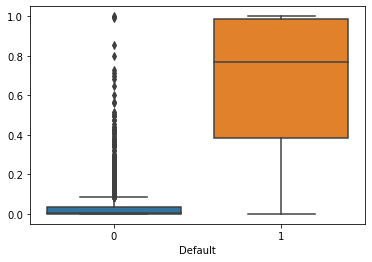

In [175]:
sns.boxplot(x=df['default'],y=y_predict_train)
plt.xlabel('Default');

From the above boxplot, let us take a cut-off of 0.09 to try and get the most reasonable descriptive power of the model. 

Let us now see the predicted classes

In [176]:
y_class_pred=[]
for i in range(0,len(y_predict_train)):
    if np.array(y_predict_train)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Checking the accuracy of the model using confusion matrix for training set

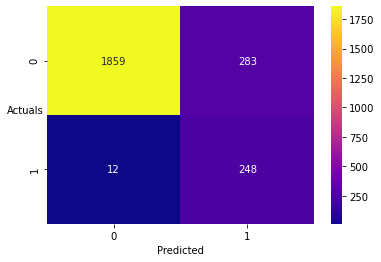

In [177]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [178]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1859 
False Positives: 283 
False Negatives: 12 
True Positives: 248


### Classification Report for Train Data

In [179]:
print(metrics.classification_report(y_train,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.994     0.868     0.926      2142
         1.0      0.467     0.954     0.627       260

    accuracy                          0.877      2402
   macro avg      0.730     0.911     0.777      2402
weighted avg      0.937     0.877     0.894      2402



As observed above, accuracy of the model i.e. %overall correct predictions is 87.7%
Sensitivity of the model is 95.4% i.e. 95.4% of those defaulted were correctly identified as defaulters by the model.

AUC: 0.968


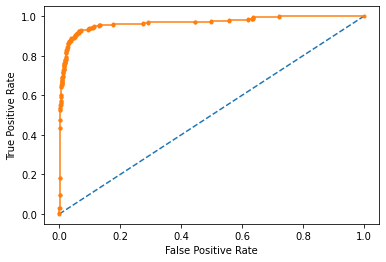

In [180]:
lr_auc_train = roc_auc_score(y_train, y_predict_train)
print('AUC: %.3f' % lr_auc_train)
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train,y_predict_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Prediction on Test set

In [181]:
y_predict_test = model_31.predict(X_test)
y_predict_test

251    0.91
3493   0.00
3063   0.00
2384   0.00
1679   0.01
604    0.00
3434   0.00
2244   0.00
2523   0.00
2162   0.00
3102   0.00
1638   0.18
2046   0.00
1241   0.13
133    0.17
2294   0.00
2139   0.00
2844   0.02
1360   0.04
2896   0.00
407    0.36
1270   0.01
2021   0.00
1380   0.00
2938   0.10
2623   0.44
2992   0.00
1157   0.00
1036   0.02
1961   0.02
1700   0.00
283    0.77
3122   0.00
3533   0.00
655    0.10
3327   0.00
1127   0.00
2051   0.08
40     1.00
1536   0.00
1154   0.01
373    0.13
2081   0.00
3453   0.00
2873   0.00
3120   0.00
3279   0.18
1644   0.00
2318   0.00
2820   0.00
1735   0.02
1221   0.02
3165   0.00
1983   0.00
2892   0.00
454    0.52
2838   0.00
86     0.97
1741   0.10
723    0.13
1026   0.02
911    0.01
1266   0.03
2776   0.00
3000   0.00
761    0.00
92     0.78
2815   0.24
2209   0.00
611    0.07
3309   0.00
3245   0.00
622    0.00
2161   0.00
2668   0.00
3038   0.00
2705   0.00
725    0.00
2749   0.48
2440   0.14
3380   0.01
2287   0.01
2843   0.00
3185

In [182]:
y_class_pred=[]
for i in range(0,len(y_predict_test)):
    if np.array(y_predict_test)[i]>0.09:
        a=1
    else:
        a=0
    y_class_pred.append(a)

#### Checking the accuracy of the model using confusion matrix for test set

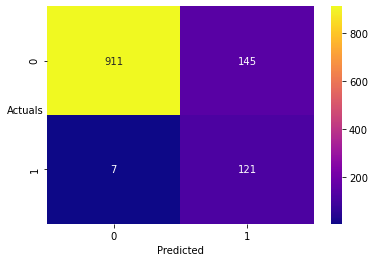

In [183]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [184]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 911 
False Positives: 145 
False Negatives: 7 
True Positives: 121


### Classification report for Test

In [185]:
print(metrics.classification_report(y_test,y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.992     0.863     0.923      1056
         1.0      0.455     0.945     0.614       128

    accuracy                          0.872      1184
   macro avg      0.724     0.904     0.769      1184
weighted avg      0.934     0.872     0.890      1184



As observed above, accuracy of the model i.e. %overall correct predictions is 87.2% Sensitivity of the model is 94.5% i.e. 94.5% of those defaulted were correctly identified as defaulters by the model and the result is similar to the train data as well. Hence, we can conclude that the dataset is good and the significant predictors considered/derived from our model building exercise are indeed significant. 

AUC: 0.963


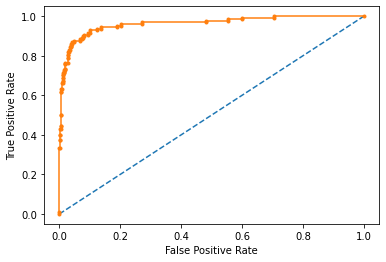

In [186]:
lr_auc_test = roc_auc_score(y_test, y_predict_test)
print('AUC: %.3f' % lr_auc_test)
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, y_predict_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Random Forest Model

### Grid Search for finding out the optimal values for the hyper parameters

In [200]:
param_grid = {
    'max_depth': [4, 7, 15],
    'min_samples_leaf': [10, 25, 50],
    'min_samples_split': [30, 75, 150],
    'n_estimators': [75, 150, 225]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [201]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 7, 15],
                         'min_samples_leaf': [10, 25, 50],
                         'min_samples_split': [30, 75, 150],
                         'n_estimators': [75, 150, 225]})

In [202]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 75,
 'n_estimators': 75}

In [203]:
best_grid = grid_search.best_estimator_

In [204]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

#### Checking the accuracy of the model using confusion matrix for training set

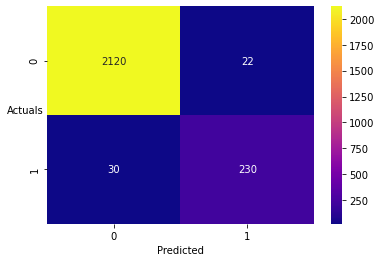

In [205]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [206]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,pred_train_rf).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 2120 
False Positives: 22 
False Negatives: 30 
True Positives: 230


### Classification Report for Train Data

In [207]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2142
         1.0       0.91      0.88      0.90       260

    accuracy                           0.98      2402
   macro avg       0.95      0.94      0.94      2402
weighted avg       0.98      0.98      0.98      2402



AUC: 0.937


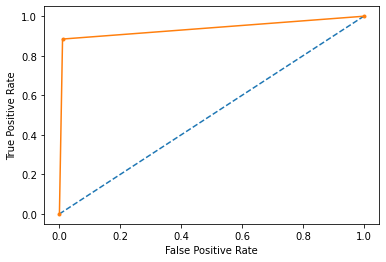

In [208]:
rf_auc_train = roc_auc_score(y_train, pred_train_rf)
print('AUC: %.3f' % rf_auc_train)
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train,pred_train_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Checking the accuracy of the model using confusion matrix for test set

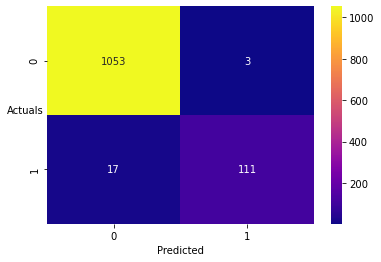

In [209]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [210]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred_test_rf).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1053 
False Positives: 3 
False Negatives: 17 
True Positives: 111


### Classification report for Test

In [211]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1056
         1.0       0.97      0.87      0.92       128

    accuracy                           0.98      1184
   macro avg       0.98      0.93      0.95      1184
weighted avg       0.98      0.98      0.98      1184



AUC: 0.932


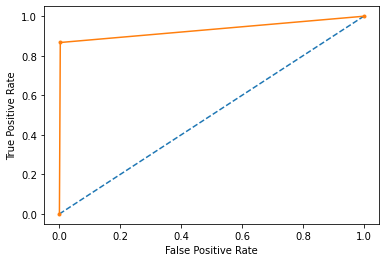

In [212]:
rf_auc_test = roc_auc_score(y_test, pred_test_rf)
print('AUC: %.3f' % rf_auc_test)
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test,pred_test_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [218]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                   Imp
Networth                          0.24
Book_Value_Unit_Curr              0.21
Book_Value_Adj_Unit_Curr          0.19
Capital_Employed                  0.06
Curr_Ratio_Latest                 0.04
PBDT                              0.03
CEPS_annualised_Unit_Curr         0.03
CP                                0.03
Net_Working_Capital               0.02
PAT                               0.02
PBIT                              0.01
PBIDT                             0.01
ROG_Capital_Employed_perc         0.01
PBT                               0.01
Adjusted_PAT                      0.01
ROG_Net_Worth_perc                0.01
PBDTM_perc_Latest                 0.01
Total_Debt                        0.01
PBITM_perc_Latest                 0.01
Total_Asset_Turnover_Ratio_Latest 0.01
APATM_perc_Latest                 0.01
Interest_Cover_Ratio_Latest       0.01
CPM_perc_Latest                   0.00
Total_Assets_to_Liab              0.00
Value_of_Output_to_Gross_

# Linear Discriminant Analysis

In [219]:
LDA = LinearDiscriminantAnalysis()

In [220]:
lda_model = LDA.fit(X_train, y_train)

In [221]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

#### Checking the accuracy of the model using confusion matrix for training set

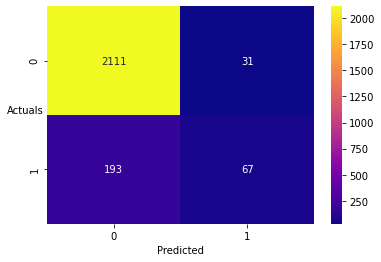

In [222]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_lda)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [223]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train,pred_train_lda).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 2111 
False Positives: 31 
False Negatives: 193 
True Positives: 67


### Classification Report for Train Data

In [224]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      2142
         1.0       0.68      0.26      0.37       260

    accuracy                           0.91      2402
   macro avg       0.80      0.62      0.66      2402
weighted avg       0.89      0.91      0.89      2402



AUC: 0.622


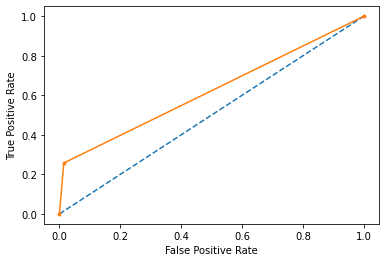

In [225]:
lda_auc_train = roc_auc_score(y_train, pred_train_lda)
print('AUC: %.3f' % lda_auc_train)
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train,pred_train_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Checking the accuracy of the model using confusion matrix for test set

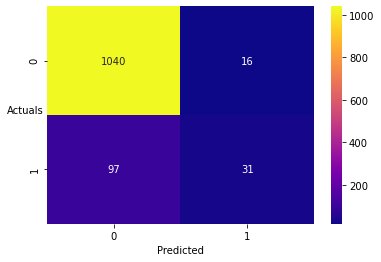

In [226]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [227]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,pred_test_lda).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 1040 
False Positives: 16 
False Negatives: 97 
True Positives: 31


### Classification report for Test

In [228]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1056
         1.0       0.66      0.24      0.35       128

    accuracy                           0.90      1184
   macro avg       0.79      0.61      0.65      1184
weighted avg       0.89      0.90      0.88      1184



AUC: 0.614


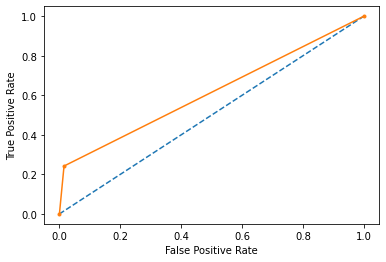

In [229]:
lda_auc_test = roc_auc_score(y_test, pred_test_lda)
print('AUC: %.3f' % lda_auc_test)
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, pred_test_lda)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Trying to find the most optimum threshold for LDA

#### Probability prediction for the training and test data on LDA model

In [230]:
# Training Data Probability Prediction
lda_pred_prob_train = lda_model.predict_proba(X_train)

# Test Data Probability Prediction
lda_pred_prob_test = lda_model.predict_proba(X_test)

### Explore cut-off values for maximum accuracy of LDA model

0.1 

Accuracy Score 0.8451
F1 Score 0.5474 

Confusion Matrix


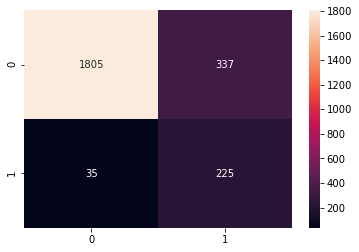

0.2 

Accuracy Score 0.8913
F1 Score 0.5477 

Confusion Matrix


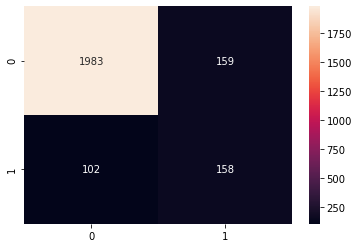

0.3 

Accuracy Score 0.9105
F1 Score 0.5435 

Confusion Matrix


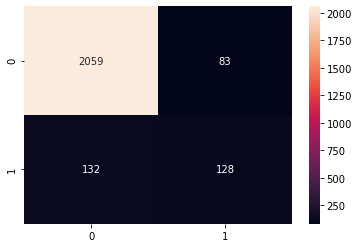

0.4 

Accuracy Score 0.9126
F1 Score 0.4697 

Confusion Matrix


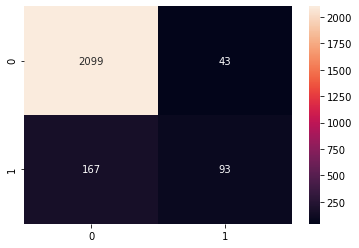

0.5 

Accuracy Score 0.9067
F1 Score 0.3743 

Confusion Matrix


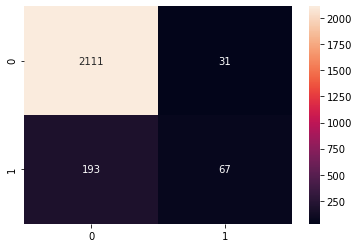

0.6 

Accuracy Score 0.9047
F1 Score 0.3123 

Confusion Matrix


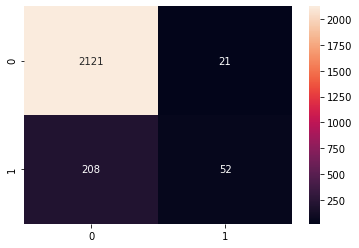

0.7 

Accuracy Score 0.9047
F1 Score 0.2821 

Confusion Matrix


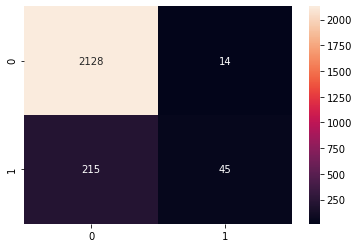

0.8 

Accuracy Score 0.9026
F1 Score 0.2252 

Confusion Matrix


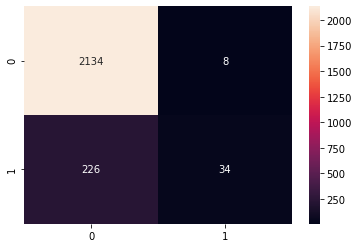

0.9 

Accuracy Score 0.898
F1 Score 0.1463 

Confusion Matrix


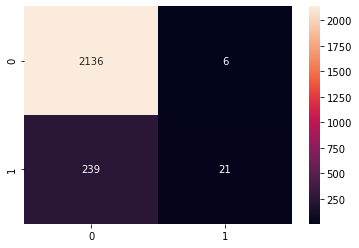

In [231]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(lda_pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

We see that 0.4 and 0.3 gives better accuracy than the rest of the custom cut-off values. But 0.2 cut-off gives us the best 'f1-score'. Here, we will take the cut-off as 0.2 to get the optimum 'f1' score.

Let us evaluate the predictions of the test data using these cut-off values.

In [232]:
lda_pred_cutoff=[]
for i in range(0,len(lda_pred_prob_test[:,1])):
    if np.array(lda_pred_prob_test[:,1])[i]>0.2:
        a=1
    else:
        a=0
    lda_pred_cutoff.append(a)

#### Checking the accuracy of the model using confusion matrix for test set

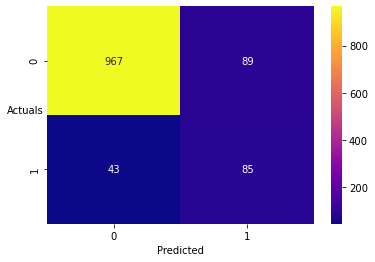

In [233]:
#print(metrics.confusion_matrix(y_test, y_predict))
sns.heatmap((metrics.confusion_matrix(y_test,lda_pred_cutoff)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [234]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,lda_pred_cutoff).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp)

True Negative: 967 
False Positives: 89 
False Negatives: 43 
True Positives: 85


### Classification report for Test

In [235]:
print(metrics.classification_report(y_test,lda_pred_cutoff,digits=3))

              precision    recall  f1-score   support

         0.0      0.957     0.916     0.936      1056
         1.0      0.489     0.664     0.563       128

    accuracy                          0.889      1184
   macro avg      0.723     0.790     0.750      1184
weighted avg      0.907     0.889     0.896      1184



As observed above, accuracy of the model i.e. percentage overall correct predictions is 88.9%. Sensitivity of the model is poor at 66.4% i.e. 66.4% of those defaulted were correctly identified as defaulters by the model.

AUC: 0.790


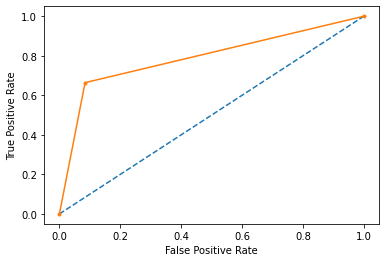

In [236]:
lda_pred_cutoff_auc_test = roc_auc_score(y_test, lda_pred_cutoff)
print('AUC: %.3f' % lda_pred_cutoff_auc_test)
lda_pred_cutoff_test_fpr, lda_pred_cutoff_test_tpr, lda_pred_cutoff_test_thresholds = roc_curve(y_test, lda_pred_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_pred_cutoff_test_fpr, lda_pred_cutoff_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Lets build the LDA model with scaling the predictor variables and use this model to predict on the test set.

In [237]:
from sklearn.preprocessing import scale

In [238]:
X_scaled_train=scale(X_train)

In [239]:
LDA_model2 = LDA.fit(X_scaled_train,y_train)
LDA_model2

LinearDiscriminantAnalysis()

In [240]:
lda_pred_class2 = LDA_model2.predict(scale(X_test))

In [241]:
print(classification_report(y_test, lda_pred_class2))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1056
         1.0       0.66      0.21      0.32       128

    accuracy                           0.90      1184
   macro avg       0.79      0.60      0.63      1184
weighted avg       0.88      0.90      0.88      1184



As observed above, accuracy of the model i.e. percentage overall correct predictions is 90%. Sensitivity of the model is poor at 21% i.e. only 21% of those defaulted were correctly identified as defaulters by the model.

## ROC Curve for the 4 models on the Test data

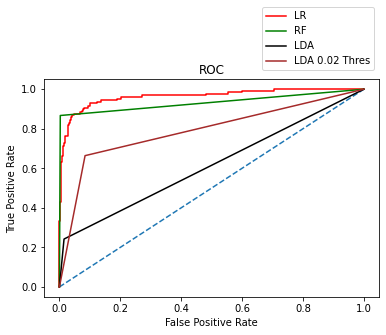

In [242]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='black',label="LDA")
plt.plot(lda_pred_cutoff_test_fpr, lda_pred_cutoff_test_tpr,color='brown',label="LDA 0.02 Thres")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Out of the 4 models, LR has slightly better performance than the Random Forest and Linear Discriminant Analysis model to predict defaulter as defaulter.

However, it can be argued that overall Random Forest is the better model as it has a way better precision than the other models and equally good recall as well for defaulters, ie; ability to predict defaulter as defaulter.

## THE END 